In [1]:
import glob
import os
import pandas as pd
import numpy
from scipy.stats.stats import pearsonr
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.options.display.max_colwidth = 200
#columns = ["ss_pred"] + list(range(1,124))
columns = ['sequence','ss','ss_nprofile','ss_profile','dstr','dstr_core','dstr_surf','hydropathy','F','aro','round of design','result']
native = {'A': 0.09892494045990434, 'C': 0.0007037625203442372, 'D': 0.027770177581332288, 'E': 0.029719275383167428, 'F': 0.07929574855980195, 'G': 0.1453262552782189, 'H': 0.011157715202304692, 'I': 0.05289172587768166, 'K': 0.02000481398009908, 'L': 0.11207876498844926, 'M': 0.01748405604149801, 'N': 0.02587373268683085, 'P': 0.026855803431653235, 'Q': 0.021940748555100798, 'R': 0.037856030027200865, 'S': 0.04138471504904712, 'T': 0.04080177214642398, 'V': 0.09253231337129984, 'W': 0.02589065683561668, 'Y': 0.09150699202402476}
native_core = {'A': 0.07307786630111489, 'C': 0.000560694380689476, 'D': 0.0529505100746824, 'E': 0.06357016644762904, 'F': 0.03465929694164796, 'G': 0.24388319111608575, 'H': 0.014590630220483895, 'I': 0.01795479650462075, 'K': 0.036906266571925035, 'L': 0.033595549658657645, 'M': 0.022868994543972065, 'N': 0.04843456224965258, 'P': 0.010193109432870735, 'Q': 0.04258971634104471, 'R': 0.07494859428154613, 'S': 0.07878122858095064, 'T': 0.06227166114356501, 'V': 0.027519089809615437, 'W': 0.0037320237189443434, 'Y': 0.056912051680301494}
native_surf = {'A': 0.11995082543027749, 'C': 0.000820144522764552, 'D': 0.0072866686445619815, 'E': 0.0021825051749243796, 'F': 0.11560627606644364, 'G': 0.06515289471799646, 'H': 0.00836513311576485, 'I': 0.08131195842327642, 'K': 0.006255946474060585, 'L': 0.17592270521516432, 'M': 0.013103556460385826, 'N': 0.007521117442649561, 'P': 0.040410447379459216, 'Q': 0.005143380359499524, 'R': 0.0076822477075170256, 'S': 0.010963678339659189, 'T': 0.02333660709109572, 'V': 0.14541878523126028, 'W': 0.0439160963166815, 'Y': 0.11964902588655747}
ss3_profile = {'lathander':86.992,'lliira':91.057,'mystra':88.618,'oghma':91.057,'rao':90.244,'selune':90.244,'sune':89.431,'TMB1_1':90.244,'TMB1_2':71.545,'TMB1_3':86.992,'TMB1_4':75.610,'TMB1_5':76.423,'TMB1_6':75.610,'TMB1_7':87.805,'TMB1_8':86.179,'TMB1_9':73.984,'TMB1_10':86.992,'TMB1_11':82.114,'TMB1_12':73.984,'TMB1_13':71.545,'TMB1_14':75.610,'TMB1_15':84.553,'TMB1_16':76.423,'TMB2_1':89.431,'TMB2_2':89.431,'TMB2_3':87.805,'TMB2_4':87.805,'TMB2_5':85.366,'TMB2_6':87.805,'TMB2_7':47.967,'TMB2_8':62.602,'TMB2_9':86.992,'TMB2_10':86.992,'TMB2_11':64.228,'TMB2_12':90.244,'TMB2_13':61.789,'TMB2_14':87.805,'TMB2_15':87.805,'TMB2_16':65.041,'TMB2_17':88.618,'TMB2_18':90.244,'TMB2_19':85.366,'TMB2_20':86.992,'tymora':86.179,'waukeen':89.431}
ss3_nprofile = {'lathander':84.553,'lliira':85.366,'mystra':82.927,'oghma':83.740,'rao':83.740,'selune':82.114,'sune':85.366,'TMB1_1':72.358,'TMB1_2':71.545,'TMB1_3':76.423,'TMB1_4':73.984,'TMB1_5':73.984,'TMB1_6':78.049,'TMB1_7':81.301,'TMB1_8':75.610,'TMB1_9':78.049,'TMB1_10':78.862,'TMB1_11':78.862,'TMB1_12':80.488,'TMB1_13':71.545,'TMB1_14':73.984,'TMB1_15':79.675,'TMB1_16':73.984,'TMB2_1':65.854,'TMB2_2':53.659,'TMB2_3':64.228,'TMB2_4':56.911,'TMB2_5':68.293,'TMB2_6':60.163,'TMB2_7':55.285,'TMB2_8':64.228,'TMB2_9':61.789,'TMB2_10':60.976,'TMB2_11':66.667,'TMB2_12':57.724,'TMB2_13':61.789,'TMB2_14':64.228,'TMB2_15':65.854,'TMB2_16':65.041,'TMB2_17':67.480,'TMB2_18':57.724,'TMB2_19':69.106,'TMB2_20':63.415,'tymora':84.553,'waukeen':82.927}
results = {'lathander':"No expression",'lliira':"No expression",'mystra':"No expression",'oghma':"No expression",'rao':"No expression",'selune':"No expression",'sune':"No expression",'TMB1_1':"No expression",'TMB1_2':"No expression",'TMB1_3':"No expression",'TMB1_4':"No expression",'TMB1_5':"No expression",'TMB1_6':"No expression",'TMB1_7':"No expression",'TMB1_8':"No expression",'TMB1_9':"No expression",'TMB1_10':"No expression",'TMB1_11':"No expression",'TMB1_12':"No expression",'TMB1_13':"No expression",'TMB1_14':"No expression",'TMB1_15':"No expression",'TMB1_16':"No expression",'TMB2_1':"Aggregation",'TMB2_2':"Misfolded",'TMB2_3':"Folded?",'TMB2_4':"Misfolded",'TMB2_5':"Aggregation",'TMB2_6':"No expression",'TMB2_7':"Misfolded",'TMB2_8':"Folded?",'TMB2_9':"No expression",'TMB2_10':"Aggregation",'TMB2_11':"Aggregation",'TMB2_12':"Misfolded",'TMB2_13':"Aggregation",'TMB2_14':"No expression",'TMB2_15':"Folded?",'TMB2_16':"Aggregation",'TMB2_17':"Folded?",'TMB2_18':"No expression",'TMB2_19':"Misfolded",'TMB2_20':"Misfolded",'tymora':"No expression",'waukeen':"No expression"}

df = pd.DataFrame(columns=columns)

for file in glob.glob("round3_surf_selection/*.fasta*"):
    design_name = "_".join(os.path.dirname(file).split('_')[:-1])
    sequence = ""
    ss = ""
    dround = ""
    if "TMB1" in design_name:
        dround = "1"
    elif "TMB2" in design_name:
        dround = "2"
    else:
        dround = "0"
    with open(file, 'r') as in_f:
        for line in in_f:
            if ">" in line:
                pass
            else:
                if line[0] == "M":
                    sequence = line[1:].strip()
                else:
                    sequence = line.strip()
#        for line in in_f:
#            if "DSSP" in line:
#                for line in in_f:
#                    vals = line.split()
#                    if int(vals[0]) == 1 and vals[1] == "M":
#                        pass
#                    else:
#                        sequence += vals[1]
#                        ss += vals[2]
    print(design_name, len(sequence))
    ss_profile = ss3_profile[design_name]
    ss_nprofile = ss3_nprofile[design_name]
    distr = aa_distribution(sequence)
    distr_surf = aa_distribution_surface(sequence)
    distr_core = aa_distribution_core(sequence)
    outcome = results[design_name]
    
    keys = set(native.keys()) | set(distr.keys())
    
    dstr_r = numpy.corrcoef([native.get(x, 0) for x in keys],[distr.get(x, 0) for x in keys])[0, 1]
    dstr_core_r = numpy.corrcoef([native_core.get(x, 0) for x in keys],[distr_core.get(x, 0) for x in keys])[0, 1]
    dstr_surf_r = numpy.corrcoef([native_surf.get(x, 0) for x in keys],[distr_surf.get(x, 0) for x in keys])[0, 1]
    
    hydro = GRAVY(sequence)
    
    F_freq = distr['F']
    aro_freq = distr['F'] + distr['W'] + distr['Y']
    
    df.loc[design_name] = [sequence,ss,ss_nprofile,ss_profile,dstr_r,dstr_core_r,dstr_surf_r,hydro,F_freq, aro_freq,dround,outcome]
print(df)


Empty DataFrame
Columns: [sequence, ss, ss_nprofile, ss_profile, dstr, dstr_core, dstr_surf, hydropathy, F, aro, round of design, result]
Index: []


In [13]:
pd.options.display.max_colwidth = 200
#columns = ["ss_pred"] + list(range(1,124))
columns = ['sequence','ss','ss_nprofile','dstr','round','hydropathy','result']
df = pd.DataFrame(columns=columns)

for file in glob.glob("*_nprofile/*.ss3"):
    design_name = "_".join(os.path.dirname(file).split('_')[:-1])
    sequence = ""
    ss = ""
    dround = ""
    if "TMB1" in design_name:
        dround = "1"
    elif "TMB2" in design_name:
        dround = "2"
    else:
        dround = "0"
    with open(file, 'r') as in_f:
        for line in in_f:
            if "DSSP" in line:
                for line in in_f:
                    vals = line.split()
                    if int(vals[0]) == 1 and vals[1] == "M":
                        pass
                    else:
                        sequence += vals[1]
                        ss += vals[2]
#    ss_nprofile = ss3_nprofile[design_name]
    ss_nprofile = ss_pred(ss)
    distr = aa_distribution(sequence)    
    keys = set(native.keys()) | set(distr.keys())
    
    dstr_r = numpy.corrcoef([native.get(x, 0) for x in keys],[distr.get(x, 0) for x in keys])[0, 1]
    hydro = GRAVY(sequence)
    outcome = results[design_name]
    
    df.loc[design_name] = [sequence,ss,ss_nprofile,dstr_r,dround,hydro,outcome]
print(df["ss"])

for file in glob.glob("*_nprofile/*.ss3_noprof.txt"):
    design_name = "_".join(os.path.dirname(file).split('_')[:-1])
    sequence = ""
    ss = ""
    dround = ""
    if "TMB1" in design_name:
        dround = "1"
    elif "TMB2" in design_name:
        dround = "2"
    else:
        dround = "0"
    with open(file, 'r') as in_f:
        for line in in_f:
            if "DSSP" in line:
                for line in in_f:
                    vals = line.split()
                    if int(vals[0]) == 1 and vals[1] == "M":
                        pass
                    else:
                        sequence += vals[1]
                        ss += vals[2]
                        
#    ss_nprofile = ss3_nprofile[design_name]
    ss_nprofile = ss_pred(ss)
    distr = aa_distribution(sequence)    
    keys = set(native.keys()) | set(distr.keys())
    hydro = GRAVY(sequence)
    outcome = results[design_name]
    dstr_r = numpy.corrcoef([native.get(x, 0) for x in keys],[distr.get(x, 0) for x in keys])[0, 1]
    
    df.loc[design_name] = [sequence,ss,ss_nprofile,dstr_r,dround,hydro,outcome]
    
print(df)

TypeError: ss_pred() takes exactly 3 arguments (1 given)

In [3]:
def aa_distribution(sequence,dround,design_name):
    aa_dict = {"A":0, "C":0, "D":0, "E":0, "F":0, "G":0, "H":0, "I":0, "K":0, "L":0, "M":0, "N":0, "P":0, "Q":0, "R":0, "S":0, "T":0, "V":0, "W":0, "Y":0}
    n_resi = 0.0
    if dround == "sol":
        if len(sequence) == 109:
            positions = [9,10,11,12,13,14,15,16,22,23,24,25,26,27,28,29,30,31,32,36,37,38,39,40,41,42,43,44,50,51,52,53,54,55,56,57,58,59,60,64,65,66,67,68,69,70,76,77,78,79,80,81,82,83,84,88,89,90,91,92,93,94,100,101,102,103,104,105,106,107,108]
        elif len(sequence) == 111:
            positions = [9,10,11,12,13,14,15,16,22,23,24,25,26,27,28,29,30,31,32,36,37,38,39,40,41,42,43,44,50,51,52,53,54,55,56,57,58,59,60,64,65,66,67,68,69,70,78,79,80,81,82,83,84,85,86,90,91,92,93,94,95,96,102,103,104,105,106,107,108,109,110]
    elif dround =="ref":
        if design_name == "OmpT3":
            positions = [6,7,8,9,10,11,12,13,14,15,21,22,23,24,25,26,27,28,29,30,31,35,36,37,38,39,40,41,42,43,49,50,51,52,53,54,55,56,57,58,59,60,61,65,66,67,68,69,70,71,72,73,74,75,81,82,83,84,85,86,87,88,89,90,91,92,93,97,98,99,100,101,102,103,104,105,111,112,113,114,115,116,117,118,119,120,121]
        elif design_name == "4fuv":
            positions = [7,8,9,10,11,12,13,19,20,21,22,23,24,25,26,27,31,32,33,34,35,36,37,43,44,45,46,47,48,49,50,51,63,64,65,66,67,68,69,70,71,77,78,79,80,81,82,83,84,85,86,87,88,89,93,94,95,96,97,98,99,100,101,102,103,109,110,111,112,113,114,115,116,117,118,119,120,121]
        elif design_name == "4rlc":
            positions = [5,6,7,8,9,10,11,12,18,19,20,21,22,23,24,25,26,30,31,32,33,34,35,36,42,43,44,45,46,47,48,49,50,59,60,61,62,63,64,65,71,72,73,74,75,76,77,78,79,80,81,85,86,87,88,89,90,91,92,93,99,100,101,102,103,104,105,106,107,108,109]
        elif design_name == "1p4t":
            positions = [5,6,7,8,9,10,11,12,13,14,20,21,22,23,24,25,26,27,28,29,30,33,34,35,36,37,38,39,40,41,47,48,49,50,51,52,53,54,55,56,57,65,66,67,68,69,70,71,72,73,79,80,81,82,83,84,85,86,87,88,89,90,91,95,96,97,98,99,100,101,102,103,104,105,111,112,113,114,115,116,117,118,119,120,121,122,123]
        elif design_name == "1thq":
            positions = [3,4,5,6,7,8,9,10,16,17,18,19,20,21,22,23,24,25,26,30,31,32,33,34,35,36,37,38,39,40,46,47,48,49,50,51,52,53,54,55,56,57,58,68,69,70,71,72,73,74,75,76,77,78,84,85,86,87,88,89,90,91,92,93,94,95,96,99,100,101,102,103,104,105,111,112,113,114,115,116,117,118,119]
        elif design_name == "2erv":
            positions = [2,3,4,5,6,7,8,9,15,16,17,18,19,20,21,22,23,24,25,37,38,39,40,41,42,43,44,45,46,47,53,54,55,56,67,58,59,60,61,62,63,64,65,72,73,74,75,76,77,78,79,80,81,82,88,89,90,91,92,93,94,95,96,97,98,99,100,104,105,106,107,108,109,110,116,117,118,119,120,121,122]
    elif dround == "TMB10":
        positions = [5,6,7,8,9,10,11,12,13,14,20,21,22,23,24,25,26,27,28,29,30,31,32,36,37,38,39,40,41,42,43,44,45,46,52,53,54,55,56,57,58,59,60,61,62,63,64,68,69,70,71,72,73,74,75,76,82,83,84,85,86,87,88,89,90,91,92,96,97,98,99,100,101,102,103,104,110,111,112,113,114,115,116,117,118,119,120,124,125,126,127,128,129,130,131,132,138,139,140,141,142,143,144,145,146,147,148]
    elif dround == "TMB12":
        positions = [6,7,8,9,10,11,12,13,14,15,21,22,23,24,25,26,27,28,29,30,31,35,36,37,38,39,40,41,42,43,49,50,51,52,53,54,55,56,57,58,59,63,64,65,66,67,68,69,70,71,77,78,79,80,81,82,83,84,85,86,87,88,89,93,94,95,96,97,98,99,100,101,102,103,109,110,111,112,113,114,115,116,117,118,119,120,121,125,126,127,128,129,130,131,132,133,139,140,141,142,143,144,145,146,147,148,149,153,154,155,156,157,158,159,160,161,167,168,169,170,171,172,173,174,175,176,177]
    elif dround == "TMB14v4":
        positions = [5,6,7,8,9,10,11,12,13,14,20,21,22,23,24,25,26,27,28,29,30,34,35,36,37,38,39,40,41,42,48,49,50,51,52,53,54,55,56,57,58,62,63,64,65,66,67,68,69,70,76,77,78,79,80,81,82,83,84,85,86,90,91,92,93,94,95,96,97,98,104,105,106,107,108,109,110,111,112,113,114,115,116,120,121,122,123,124,125,126,127,128,129,130,136,137,138,139,140,141,142,143,144,145,146,147,148,152,153,154,155,156,157,158,159,160,166,167,168,169,170,171,172,173,174,175,176,180,181,182,183,184,185,186,187,188,194,195,196,197,198,199,200,201,202,203,204]
    elif dround == "TMB14":
        positions = [6,7,8,9,10,11,12,13,14,15,21,22,23,24,25,26,27,28,29,30,31,35,36,37,38,39,40,41,42,43,49,50,51,52,53,54,55,56,57,58,59,63,64,65,66,67,68,69,70,71,77,78,79,80,81,82,83,84,85,86,87,88,89,93,94,95,96,97,98,99,100,101,102,103,109,110,111,112,113,114,115,116,117,118,119,120,121,125,126,127,128,129,130,131,132,133,139,140,141,142,143,144,145,146,147,148,149,153,154,155,156,157,158,159,160,161,167,168,169,170,171,172,173,174,175,176,177,181,182,183,184,185,186,187,188,189,195,196,197,198,199,200,201,202,203,204,205]
    elif dround == "TMB14_16":
        positions = [6,7,8,9,10,11,12,13,14,15,21,22,23,24,25,26,27,28,29,30,31,35,36,37,38,39,40,41,42,43,49,50,51,52,53,54,55,56,57,58,59,63,64,65,66,67,68,69,70,71,77,78,79,80,81,82,83,84,85,86,87,88,89,93,94,95,96,97,98,99,100,101,102,103,109,110,111,112,113,114,115,116,117,118,119,120,121,125,126,127,128,129,130,131,132,133,139,140,141,142,143,144,145,146,147,148,149,153,154,155,156,157,158,159,160,161,167,168,169,170,171,172,173,174,175,176,177,181,182,183,184,185,186,187,188,189,195,196,197,198,199,200,201,202,203,204,205]
    elif dround == "TMB12_12":
        positions = [6,7,8,9,10,11,12,13,14,15,21,22,23,24,25,26,27,28,29,30,31,35,36,37,38,39,40,41,42,43,49,50,51,52,53,54,55,56,57,58,59,63,64,65,66,67,68,69,70,71,77,78,79,80,81,82,83,84,85,86,87,91,92,93,94,95,96,97,98,99,105,106,107,108,109,110,111,112,113,114,115,119,120,121,122,123,124,125,126,127,133,134,135,136,137,138,139,140,141,142,143,147,148,149,150,151,152,153,154,155,161,162,163,164,165,166,167,168,169,170,171]
    elif dround == "TMB12_14":
        positions = [6,7,8,9,10,11,12,13,14,15,21,22,23,24,25,26,27,28,29,30,31,35,36,37,38,39,40,41,42,43,49,50,51,52,53,54,55,56,57,58,59,63,64,65,66,67,68,69,70,71,77,78,79,80,81,82,83,84,85,86,87,88,89,93,94,95,96,97,98,99,100,101,102,103,109,110,111,112,113,114,115,116,117,118,119,120,121,125,126,127,128,129,130,131,132,133,139,140,141,142,143,144,145,146,147,148,149,153,154,155,156,157,158,159,160,161,167,168,169,170,171,172,173,174,175,176,177]
    elif dround == "TMB12_16":
        positions = [6,7,8,9,10,11,12,13,14,15,21,22,23,24,25,26,27,28,29,30,31,35,36,37,38,39,40,41,42,43,49,50,51,52,53,54,55,56,57,58,59,60,61,65,66,67,68,69,70,71,72,73,74,75,81,82,83,84,85,86,87,88,89,90,91,92,93,97,98,99,100,101,102,103,104,105,111,112,113,114,115,116,117,118,119,120,121,125,126,127,128,129,130,131,132,133,139,140,141,142,143,144,145,146,147,148,149,150,151,155,156,157,158,159,160,161,162,163,164,165,171,172,173,174,175,176,177,178,179,180,181,182,183]
    elif dround == "TMB12_18":
        positions = [6,7,8,9,10,11,12,13,14,15,21,22,23,24,25,26,27,28,29,30,31,35,36,37,38,39,40,41,42,43,49,50,51,52,53,54,55,56,57,58,59,60,61,65,66,67,68,69,70,71,72,73,79,80,81,82,83,84,85,86,87,88,89,93,94,95,96,97,98,99,100,101,107,108,109,110,111,112,113,114,115,116,117,118,119,123,124,125,126,127,128,129,130,131,137,138,139,140,141,142,143,144,145,146,147,151,152,153,154,155,156,157,158,159,165,166,167,168,169,170,171,172,173,174,175,176,177]

    else:
        positions = [6,7,8,9,10,11,12,13,14,15,21,22,23,24,25,26,27,28,29,30,31,35,36,37,38,39,40,41,42,43,49,50,51,52,53,54,55,56,57,58,59,60,61,65,66,67,68,69,70,71,72,73,74,75,81,82,83,84,85,86,87,88,89,90,91,92,93,97,98,99,100,101,102,103,104,105,111,112,113,114,115,116,117,118,119,120,121]

    for pos in positions:
        aa_dict[sequence[pos-1]] = aa_dict[sequence[pos-1]] + 1
        n_resi +=1.0
    for key in aa_dict:    
        aa_dict[key] = aa_dict[key]/n_resi  
    return(aa_dict)

In [4]:
def aa_distribution_core(sequence,dround,design_name):
    aa_dict = {"A":0, "C":0, "D":0, "E":0, "F":0, "G":0, "H":0, "I":0, "K":0, "L":0, "M":0, "N":0, "P":0, "Q":0, "R":0, "S":0, "T":0, "V":0, "W":0, "Y":0}
    n_resi = 0.0
    if dround == "sol":
        if len(sequence) == 109:
            positions = [9,11,13,15,23,25,27,29,31,37,39,41,43,51,53,55,57,59,65,67,69,77,79,81,83,89,91,93,101,103,105,107]
        elif len(sequence) == 111:
            positions = [9,11,13,15,23,25,27,29,31,37,39,41,43,51,53,55,57,59,65,67,69,79,81,83,85,91,93,95,103,105,107,109] 
    elif dround =="ref":
        if design_name == "OmpT3":
            positions = [6,8,10,12,14,22,24,26,28,30,36,38,40,42,50,52,54,56,58,60,66,68,70,72,74,82,84,86,88,90,92,98,100,102,104,112,114,116,118,120]
        elif design_name == "4fuv":
            positions = [8,10,12,20,22,24,26,32,34,36,44,46,48,50,64,66,68,70,78,80,82,84,86,88,94,96,98,100,102,110,112,114,116,118,120,]
        elif design_name == "4rlc":
            positions = [5,7,9,11,19,21,23,25,31,33,35,43,45,47,49,60,62,64,72,74,76,78,80,86,88,90,92,100,102,104,106,108]
        elif design_name == "1p4t":
            positions = [7,9,11,13,21,23,25,27,29,34,36,38,40,48,50,52,54,56,66,68,70,72,80,82,84,86,88,90,96,98,100,102,104,112,114,116,118,120,122]
        elif design_name == "1thq":
            positions = [3,5,7,9,17,19,21,23,25,31,33,35,37,39,47,49,51,53,55,57,69,71,73,75,77,85,87,89,91,93,95,100,102,104,112,114,116,118]
        elif design_name == "2erv":
            positions = [2,4,6,8,16,18,20,22,24,38,40,42,44,46,54,56,58,60,62,64,73,75,77,79,81,89,91,93,95,97,99,105,107,109,117,119,121]   
    elif dround == "TMB10":
        positions = [5,7,9,11,13,21,23,25,27,29,31,37,39,41,43,45,53,55,57,59,61,63,69,71,73,75,83,85,87,89,91,97,99,101,103,111,113,115,117,119,120,124,125,126,127,129,131,139,141,143,145,147]
    elif dround == "TMB12":
        positions = [6,8,10,12,14,22,24,26,28,30,36,38,40,42,50,52,54,56,58,64,66,68,70,78,80,82,84,86,88,94,96,98,100,102,110,112,114,116,118,120,126,128,130,132,140,142,144,146,148,154,156,158,160,168,170,172,174,176]
    elif dround == "TMB14v4":
        positions = [5,7,9,11,13,21,23,25,27,29,35,37,39,41,49,51,53,55,57,63,65,67,69,77,79,81,83,85,91,93,95,97,105,107,109,111,113,115,121,123,125,127,129,137,139,141,143,145,147,153,155,157,159,167,169,171,173,175,181,183,185,187,195,197,199,201,203]
    elif dround == "TMB14":
        positions = [6,8,10,12,14,22,24,26,28,30,36,38,40,42,50,52,54,56,58,64,66,68,70,78,80,82,84,86,88,94,96,98,100,102,110,112,114,116,118,120,126,128,130,132,140,142,144,146,148,154,156,158,160,168,170,172,174,176,182,184,186,188,196,198,200,202,204]
    elif dround == "TMB14_16":
        positions = [6,8,10,12,14,22,24,26,28,30,36,38,40,42,50,52,54,56,58,64,66,68,70,78,80,82,84,86,88,94,96,98,100,102,110,112,114,116,118,120,126,128,130,132,140,142,144,146,148,154,156,158,160,168,170,172,174,176,182,184,186,188,196,198,200,202,204]
    elif dround == "TMB12_12":
        positions = [6,8,10,12,14,22,24,26,28,30,36,38,40,42,50,52,54,56,58,64,66,68,70,78,80,82,84,86,92,94,96,98,106,108,110,112,114,120,122,124,126,134,136,138,140,142,148,150,152,154,162,164,166,168,170]
    elif dround == "TMB12_14":
        positions = [6,8,10,12,14,22,24,26,28,30,36,38,40,42,50,52,54,56,58,64,66,68,70,78,80,82,84,86,88,94,96,98,100,102,110,112,114,116,118,120,126,128,130,132,140,142,144,146,148,154,156,158,160,168,170,172,174,176]
    elif dround == "TMB12_16":
        positions = [6,8,10,12,14,22,24,26,28,30,36,38,40,42,50,52,54,56,58,60,66,68,70,72,74,82,84,86,88,90,92,98,100,102,104,112,114,116,118,120,126,128,130,132,140,142,144,146,148,150,156,158,160,162,164,172,174,176,178,180,182]
    elif dround == "TMB12_18":
        positions = [6,8,10,12,14,22,24,26,28,30,36,38,40,42,50,52,54,56,58,60,66,68,70,72,80,82,84,86,88,94,96,98,100,108,110,112,114,116,118,124,126,128,130,138,140,142,144,146,152,154,156,158,166,168,170,172,174,176]
    else:
        positions = [6,8,10,12,14,22,24,26,28,30,36,38,40,42,50,52,54,56,58,60,66,68,70,72,74,82,84,86,88,90,92,98,100,102,104,112,114,116,118,120]
    
    for pos in positions:
        aa_dict[sequence[pos-1]] = aa_dict[sequence[pos-1]] + 1
        n_resi +=1.0
    for key in aa_dict:    
        aa_dict[key] = aa_dict[key]/n_resi
        
    return(aa_dict)

In [5]:
def aa_distribution_surface(sequence,dround,design_name):
    aa_dict = {"A":0, "C":0, "D":0, "E":0, "F":0, "G":0, "H":0, "I":0, "K":0, "L":0, "M":0, "N":0, "P":0, "Q":0, "R":0, "S":0, "T":0, "V":0, "W":0, "Y":0}
    n_resi = 0.0
    if dround == "sol":
        if len(sequence) == 109:
            positions = [10,12,14,16,22,24,26,28,30,32,36,38,40,42,44,50,52,54,56,58,60,64,66,68,70,76,78,80,82,84,88,90,92,94,100,102,104,106,108]
        elif len(sequence) == 111:
            positions = [10,12,14,16,22,24,26,28,30,32,36,38,40,42,44,50,52,54,56,58,60,64,66,68,70,78,80,82,84,86,90,92,94,96,102,104,106,108,110]
    elif dround =="ref":
        if design_name == "OmpT3":
            positions = [7,9,11,13,15,21,23,25,27,29,31,35,37,39,41,43,49,51,53,55,57,59,61,65,67,69,71,73,75,81,83,85,87,89,91,93,97,99,101,103,105,111,113,115,117,119,121]
        elif design_name == "4fuv":
            positions = [7,9,11,13,19,21,23,25,27,31,33,35,37,43,45,47,49,51,63,65,67,69,71,77,79,81,83,85,87,89,93,95,97,99,101,103,109,111,113,115,117,119,121]
        elif design_name == "4rlc":
            positions = [6,8,10,12,18,20,22,24,26,30,32,34,36,42,44,46,48,50,59,61,63,65,71,73,75,77,79,81,85,87,89,91,93,99,101,103,105,107,109]
        elif design_name == "1p4t":
            positions = [6,8,10,12,14,20,22,24,26,28,30,33,35,37,39,41,47,49,51,53,55,57,65,67,69,71,73,79,81,83,85,87,89,91,95,97,99,101,103,105,111,113,115,117,119,121,123]
        elif design_name == "1thq":
            positions = [4,6,8,10,16,18,20,22,24,26,30,32,34,36,38,40,46,48,50,52,54,56,58,68,70,72,74,76,78,84,86,88,90,92,94,96,99,101,103,105,111,113,115,117,119]
        elif design_name == "2erv":
            positions = [3,5,7,9,15,17,19,21,23,25,37,39,41,43,45,47,53,55,67,59,61,63,65,72,74,76,78,80,82,88,90,92,94,96,98,100,104,106,108,110,116,118,120,122]   
    elif dround == "TMB10":
        positions = [6,8,10,12,14,20,22,24,26,28,30,32,36,38,40,42,44,46,52,54,56,58,60,62,64,68,70,72,74,76,82,84,86,88,90,92,96,98,100,102,104,110,112,114,116,118,120,124,126,128,130,132,138,140,142,144,146,148]
    elif dround == "TMB12":
        positions = [7,9,11,13,15,21,23,25,27,29,31,35,37,39,41,43,49,51,53,55,57,59,63,65,67,69,71,77,79,81,83,85,87,89,93,95,97,99,101,103,109,111,113,115,117,119,121,125,127,129,131,133,139,141,143,145,147,149,153,155,157,159,161,167,169,171,173,175,177]
    elif dround == "TMB14v4":
        positions = [6,8,10,12,14,20,22,24,26,28,30,34,36,38,40,42,48,50,52,54,56,58,62,64,66,68,70,76,78,80,82,84,86,90,92,94,96,98,104,106,108,110,112,114,116,120,122,124,126,128,130,136,138,140,142,144,146,148,152,154,156,158,160,166,168,170,172,174,176,180,182,184,186,188,194,196,198,200,202,204]
    elif dround == "TMB14":
        positions = [7,9,11,13,15,21,23,25,27,29,31,36,37,39,41,43,49,51,53,55,57,59,63,65,67,69,71,77,79,81,83,85,87,89,93,95,97,99,101,103,109,111,113,115,117,119,121,125,127,129,131,133,139,141,143,145,147,149,153,155,157,159,161,167,169,171,173,175,177,181,183,185,187,189,195,197,199,201,203,205] 
    elif dround == "TMB14_16":
        positions = [7,9,11,13,15,21,23,25,27,29,31,35,37,39,41,43,49,51,53,55,57,59,63,65,67,69,71,77,79,81,83,85,87,89,93,95,97,99,101,103,109,111,113,115,117,119,121,125,127,129,131,133,139,141,143,145,147,149,153,155,157,159,161,167,169,171,173,175,177,181,183,185,187,189,195,197,199,201,203,205]
    elif dround == "TMB12_12":
        positions = [7,9,11,13,15,21,23,25,27,29,31,35,37,39,41,43,49,51,53,55,57,59,63,65,67,69,71,77,79,81,83,85,87,91,93,95,97,99,105,107,109,111,113,115,119,121,123,125,127,133,135,137,139,141,143,147,149,151,153,155,161,163,165,167,169,171]
    elif dround == "TMB12_14":
        positions = [7,9,11,13,15,21,23,25,27,29,31,35,37,39,41,43,49,51,53,55,57,59,63,65,67,69,71,77,79,81,83,85,87,89,93,95,97,99,101,103,109,111,113,115,117,119,121,125,127,129,131,133,139,141,143,145,147,149,153,155,157,159,161,167,169,171,173,175,177]
    elif dround == "TMB12_16":
        positions = [7,9,11,13,15,21,23,25,27,29,31,35,37,39,41,43,49,51,53,55,57,59,61,65,67,69,71,73,75,81,83,85,87,89,91,93,97,99,101,103,105,111,113,115,117,119,121,125,127,129,131,133,139,141,143,145,147,149,151,155,157,159,161,163,165,171,173,175,177,179,181,183]
    elif dround == "TMB12_18":
        positions = [7,9,11,13,15,21,23,25,27,29,31,35,37,39,41,43,49,51,53,55,57,59,61,65,67,69,71,73,79,81,83,85,87,89,93,95,97,99,101,107,109,111,113,115,117,119,123,125,127,129,131,137,139,141,143,145,147,151,153,155,157,159,165,167,169,171,173,175,177]

    else:
        positions = [7,9,11,13,15,21,23,25,27,29,31,35,37,39,41,43,49,51,53,55,57,59,61,65,67,69,71,73,75,81,83,85,87,89,91,93,97,99,101,103,105,111,113,115,117,119,121]
    for pos in positions:
        aa_dict[sequence[pos-1]] = aa_dict[sequence[pos-1]] + 1
        n_resi +=1.0
    for key in aa_dict:    
        aa_dict[key] = aa_dict[key]/n_resi
        
    return(aa_dict)

In [6]:
hydro_scale = {"A":1.800, "C":2.500, "D":-3.500, "E":-3.500, "F":2.800, "G":-0.400, "H":-3.200, "I":4.500, "K":-3.900, "L":3.800, "M":1.900, "N":-3.500, "P":-1.600, "Q":-3.500, "R":-4.500, "S":-0.800, "T":-0.700, "V":4.200, "W":-0.900, "Y":-1.300}

def GRAVY(sequence):
    tot_score = 0
    for aa in sequence:
        tot_score += hydro_scale[aa]
    hydro_score = tot_score/len(sequence)
    
    return hydro_score

In [7]:
hydro_scale = {"A":1.800, "C":2.500, "D":-3.500, "E":-3.500, "F":2.800, "G":-0.400, "H":-3.200, "I":4.500, "K":-3.900, "L":3.800, "M":1.900, "N":-3.500, "P":-1.600, "Q":-3.500, "R":-4.500, "S":-0.800, "T":-0.700, "V":4.200, "W":-0.900, "Y":-1.300}

def GRAVY_core(sequence,dround,design_name):
    tot_score = 0
    n_resi = 0.0
    if dround == "sol":
        if len(sequence) == 109:
            positions = [9,11,13,15,23,25,27,29,31,37,39,41,43,51,53,55,57,59,65,67,69,77,79,81,83,89,91,93,101,103,105,107]
        elif len(sequence) == 111:
            positions = [9,11,13,15,23,25,27,29,31,37,39,41,43,51,53,55,57,59,65,67,69,79,81,83,85,91,93,95,103,105,107,109]
    elif dround =="ref":
        if design_name == "OmpT3":
            positions = [6,8,10,12,14,22,24,26,28,30,36,38,40,42,50,52,54,56,58,60,66,68,70,72,74,82,84,86,88,90,92,98,100,102,104,112,114,116,118,120]
        elif design_name == "4fuv":
            positions = [8,10,12,20,22,24,26,32,34,36,44,46,48,50,64,66,68,70,78,80,82,84,86,88,94,96,98,100,102,110,112,114,116,118,120,]
        elif design_name == "4rlc":
            positions = [5,7,9,11,19,21,23,25,31,33,35,43,45,47,49,60,62,64,72,74,76,78,80,86,88,90,92,100,102,104,106,108]
        elif design_name == "1p4t":
            positions = [7,9,11,13,21,23,25,27,29,34,36,38,40,48,50,52,54,56,66,68,70,72,80,82,84,86,88,90,96,98,100,102,104,112,114,116,118,120,122]
        elif design_name == "1thq":
            positions = [3,5,7,9,17,19,21,23,25,31,33,35,37,39,47,49,51,53,55,57,69,71,73,75,77,85,87,89,91,93,95,100,102,104,112,114,116,118]
        elif design_name == "2erv":
            positions = [2,4,6,8,16,18,20,22,24,38,40,42,44,46,54,56,58,60,62,64,73,75,77,79,81,89,91,93,95,97,99,105,107,109,117,119,121]       
    elif dround == "TMB10":
        positions = [5,7,9,11,13,21,23,25,27,29,31,37,39,41,43,45,53,55,57,59,61,63,69,71,73,75,83,85,87,89,91,97,99,101,103,111,113,115,117,119,120,124,125,126,127,129,131,139,141,143,145,147]
    elif dround == "TMB12":
        positions = [6,8,10,12,14,22,24,26,28,30,36,38,40,42,50,52,54,56,58,64,66,68,70,78,80,82,84,86,88,94,96,98,100,102,110,112,114,116,118,120,126,128,130,132,140,142,144,146,148,154,156,158,160,168,170,172,174,176]
    elif dround == "TMB14v4":
        positions = [5,7,9,11,13,21,23,25,27,29,35,37,39,41,49,51,53,55,57,63,65,67,69,77,79,81,83,85,91,93,95,97,105,107,109,111,113,115,121,123,125,127,129,137,139,141,143,145,147,153,155,157,159,167,169,171,173,175,181,183,185,187,195,197,199,201,203]
    elif dround == "TMB14":
        positions = [6,8,10,12,14,22,24,26,28,30,36,38,40,42,50,52,54,56,58,64,66,68,70,78,80,82,84,86,88,94,96,98,100,102,110,112,114,116,118,120,126,128,130,132,140,142,144,146,148,154,156,158,160,168,170,172,174,176,182,184,186,188,196,198,200,202,204]
    elif dround == "TMB14_16":
        positions = [6,8,10,12,14,22,24,26,28,30,36,38,40,42,50,52,54,56,58,64,66,68,70,78,80,82,84,86,88,94,96,98,100,102,110,112,114,116,118,120,126,128,130,132,140,142,144,146,148,154,156,158,160,168,170,172,174,176,182,184,186,188,196,198,200,202,204]
    elif dround == "TMB12_12":
        positions = [6,8,10,12,14,22,24,26,28,30,36,38,40,42,50,52,54,56,58,64,66,68,70,78,80,82,84,86,92,94,96,98,106,108,110,112,114,120,122,124,126,134,136,138,140,142,148,150,152,154,162,164,166,168,170]
    elif dround == "TMB12_14":
        positions = [6,8,10,12,14,22,24,26,28,30,36,38,40,42,50,52,54,56,58,64,66,68,70,78,80,82,84,86,88,94,96,98,100,102,110,112,114,116,118,120,126,128,130,132,140,142,144,146,148,154,156,158,160,168,170,172,174,176]
    elif dround == "TMB12_16":
        positions = [6,8,10,12,14,22,24,26,28,30,36,38,40,42,50,52,54,56,58,60,66,68,70,72,74,82,84,86,88,90,92,98,100,102,104,112,114,116,118,120,126,128,130,132,140,142,144,146,148,150,156,158,160,162,164,172,174,176,178,180,182]
    elif dround == "TMB12_18":
        positions = [6,8,10,12,14,22,24,26,28,30,36,38,40,42,50,52,54,56,58,60,66,68,70,72,80,82,84,86,88,94,96,98,100,108,110,112,114,116,118,124,126,128,130,138,140,142,144,146,152,154,156,158,166,168,170,172,174,176]

    else:    
        positions = [6,8,10,12,14,22,24,26,28,30,36,38,40,42,50,52,54,56,58,60,66,68,70,72,74,82,84,86,88,90,92,98,100,102,104,112,114,116,118,120]

    for pos in positions:
        tot_score += hydro_scale[sequence[pos-1]]
        n_resi +=1.0
    hydro_score = tot_score/n_resi
        
    return(hydro_score)

In [8]:
hydro_scale = {"A":1.800, "C":2.500, "D":-3.500, "E":-3.500, "F":2.800, "G":-0.400, "H":-3.200, "I":4.500, "K":-3.900, "L":3.800, "M":1.900, "N":-3.500, "P":-1.600, "Q":-3.500, "R":-4.500, "S":-0.800, "T":-0.700, "V":4.200, "W":-0.900, "Y":-1.300}

def GRAVY_surf(sequence,dround,design_name):
    tot_score = 0
    n_resi = 0.0
    if dround == "sol":
        if len(sequence) == 109:
            positions = [10,12,14,16,22,24,26,28,30,32,36,38,40,42,44,50,52,54,56,58,60,64,66,68,70,76,78,80,82,84,88,90,92,94,100,102,104,106,108]
        elif len(sequence) == 111:
            positions = [10,12,14,16,22,24,26,28,30,32,36,38,40,42,44,50,52,54,56,58,60,64,66,68,70,78,80,82,84,86,90,92,94,96,102,104,106,108,110]
    elif dround =="ref":
        if design_name == "OmpT3":
            positions = [7,9,11,13,15,21,23,25,27,29,31,35,37,39,41,43,49,51,53,55,57,59,61,65,67,69,71,73,75,81,83,85,87,89,91,93,97,99,101,103,105,111,113,115,117,119,121]
        elif design_name == "4fuv":
            positions = [7,9,11,13,19,21,23,25,27,31,33,35,37,43,45,47,49,51,63,65,67,69,71,77,79,81,83,85,87,89,93,95,97,99,101,103,109,111,113,115,117,119,121]
        elif design_name == "4rlc":
            positions = [6,8,10,12,18,20,22,24,26,30,32,34,36,42,44,46,48,50,59,61,63,65,71,73,75,77,79,81,85,87,89,91,93,99,101,103,105,107,109]
        elif design_name == "1p4t":
            positions = [6,8,10,12,14,20,22,24,26,28,30,33,35,37,39,41,47,49,51,53,55,57,65,67,69,71,73,79,81,83,85,87,89,91,95,97,99,101,103,105,111,113,115,117,119,121,123]
        elif design_name == "1thq":
            positions = [4,6,8,10,16,18,20,22,24,26,30,32,34,36,38,40,46,48,50,52,54,56,58,68,70,72,74,76,78,84,86,88,90,92,94,96,99,101,103,105,111,113,115,117,119]
        elif design_name == "2erv":
            positions = [3,5,7,9,15,17,19,21,23,25,37,39,41,43,45,47,53,55,67,59,61,63,65,72,74,76,78,80,82,88,90,92,94,96,98,100,104,106,108,110,116,118,120,122]   
    elif dround == "TMB10":
        positions = [6,8,10,12,14,20,22,24,26,28,30,32,36,38,40,42,44,46,52,54,56,58,60,62,64,68,70,72,74,76,82,84,86,88,90,92,96,98,100,102,104,110,112,114,116,118,120,124,126,128,130,132,138,140,142,144,146,148]
    elif dround == "TMB12":
        positions = [7,9,11,13,15,21,23,25,27,29,31,35,37,39,41,43,49,51,53,55,57,59,63,65,67,69,71,77,79,81,83,85,87,89,93,95,97,99,101,103,109,111,113,115,117,119,121,125,127,129,131,133,139,141,143,145,147,149,153,155,157,159,161,167,169,171,173,175,177]
    elif dround == "TMB14v4":
        positions = [6,8,10,12,14,20,22,24,26,28,30,34,36,38,40,42,48,50,52,54,56,58,62,64,66,68,70,76,78,80,82,84,86,90,92,94,96,98,104,106,108,110,112,114,116,120,122,124,126,128,130,136,138,140,142,144,146,148,152,154,156,158,160,166,168,170,172,174,176,180,182,184,186,188,194,196,198,200,202,204]
    elif dround == "TMB14":
        positions = [7,9,11,13,15,21,23,25,27,29,31,36,37,39,41,43,49,51,53,55,57,59,63,65,67,69,71,77,79,81,83,85,87,89,93,95,97,99,101,103,109,111,113,115,117,119,121,125,127,129,131,133,139,141,143,145,147,149,153,155,157,159,161,167,169,171,173,175,177,181,183,185,187,189,195,197,199,201,203,205] 
    elif dround == "TMB14_16":
        positions = [7,9,11,13,15,21,23,25,27,29,31,35,37,39,41,43,49,51,53,55,57,59,63,65,67,69,71,77,79,81,83,85,87,89,93,95,97,99,101,103,109,111,113,115,117,119,121,125,127,129,131,133,139,141,143,145,147,149,153,155,157,159,161,167,169,171,173,175,177,181,183,185,187,189,195,197,199,201,203,205]
    elif dround == "TMB12_12":
        positions = [7,9,11,13,15,21,23,25,27,29,31,35,37,39,41,43,49,51,53,55,57,59,63,65,67,69,71,77,79,81,83,85,87,91,93,95,97,99,105,107,109,111,113,115,119,121,123,125,127,133,135,137,139,141,143,147,149,151,153,155,161,163,165,167,169,171]
    elif dround == "TMB12_14":
        positions = [7,9,11,13,15,21,23,25,27,29,31,35,37,39,41,43,49,51,53,55,57,59,63,65,67,69,71,77,79,81,83,85,87,89,93,95,97,99,101,103,109,111,113,115,117,119,121,125,127,129,131,133,139,141,143,145,147,149,153,155,157,159,161,167,169,171,173,175,177]
    elif dround == "TMB12_16":
        positions = [7,9,11,13,15,21,23,25,27,29,31,35,37,39,41,43,49,51,53,55,57,59,61,65,67,69,71,73,75,81,83,85,87,89,91,93,97,99,101,103,105,111,113,115,117,119,121,125,127,129,131,133,139,141,143,145,147,149,151,155,157,159,161,163,165,171,173,175,177,179,181,183]
    elif dround == "TMB12_18":
        positions = [7,9,11,13,15,21,23,25,27,29,31,35,37,39,41,43,49,51,53,55,57,59,61,65,67,69,71,73,79,81,83,85,87,89,93,95,97,99,101,107,109,111,113,115,117,119,123,125,127,129,131,137,139,141,143,145,147,151,153,155,157,159,165,167,169,171,173,175,177]

    else:    
        positions = [7,9,11,13,15,21,23,25,27,29,31,35,37,39,41,43,49,51,53,55,57,59,61,65,67,69,71,73,75,81,83,85,87,89,91,93,97,99,101,103,105,111,113,115,117,119,121]

    for pos in positions:
        tot_score += hydro_scale[sequence[pos-1]]
        n_resi +=1.0
    hydro_score = tot_score/n_resi
        
    return(hydro_score)

In [9]:
hydro_scale = {"A":1.800, "C":2.500, "D":-3.500, "E":-3.500, "F":2.800, "G":-0.400, "H":-3.200, "I":4.500, "K":-3.900, "L":3.800, "M":1.900, "N":-3.500, "P":-1.600, "Q":-3.500, "R":-4.500, "S":-0.800, "T":-0.700, "V":4.200, "W":-0.900, "Y":-1.300}

def GRAVY_core_native(sequence,design,ref_ss):
    tot_score = 0
    n_resi = 0.0
    n = 0
    positions = []
    for i in range(0,len(ref_ss)):
        if ref_ss[i] == "E":
            n += 1
            if n%2 == 0:
                positions.append(i+1)
            else:
                pass
        elif ref_ss[i] == "C":
            n = 0
    print(positions)
    for pos in positions:
        tot_score += hydro_scale[sequence[pos-1]]
        n_resi +=1.0
    hydro_score = tot_score/n_resi
        
    return(hydro_score)

In [10]:
hydro_scale = {"A":1.800, "C":2.500, "D":-3.500, "E":-3.500, "F":2.800, "G":-0.400, "H":-3.200, "I":4.500, "K":-3.900, "L":3.800, "M":1.900, "N":-3.500, "P":-1.600, "Q":-3.500, "R":-4.500, "S":-0.800, "T":-0.700, "V":4.200, "W":-0.900, "Y":-1.300}

def GRAVY_surf_native(sequence,design,ref_ss):
    tot_score = 0
    n_resi = 0.0
    n = 0
    positions = []
    for i in range(0,len(ref_ss)):
        if ref_ss[i] == "E":
            n += 1
            if n%2 != 0:
                positions.append(i+1)
            else:
                pass
        elif ref_ss[i] == "C":
            n = 0
    print(positions)
    for pos in positions:
        tot_score += hydro_scale[sequence[pos-1]]
        n_resi +=1.0
    hydro_score = tot_score/n_resi
        
    return(hydro_score)

In [11]:
#reference_ss = "CCCCCEEEEEEEEEEECCCEEEEEEEEEEEEECCEEEEEEEEEECCCEEEEEEEEEEEEEEECCEEEEEEEEEEEECCCEEEEEEEEEEEEEEECCEEEEEEEEEECCCEEEEEEEEEEEECC"

def ss_pred(ss,dround,design_name):
    match = 0.0
    if dround == "sol":
        if len(ss) == 109:
            reference_ss = "CCHHHHCCEEEEEEEEECCCEEEEEEEEEEEEECCEEEEEEEEEECCCEEEEEEEEEEEEECCEEEEEEEECCCEEEEEEEEEEECCEEEEEEEECCCEEEEEEEEEEC"
        elif len(ss) == 111:
            reference_ss= "CCHHHHCCEEEEEEEEECCCEEEEEEEEEEEEECCEEEEEEEEEECCCEEEEEEEEEEEEECCEEEEEEEECCCCCEEEEEEEEEEECCEEEEEEEECCCEEEEEEEEEEC"
    elif dround =="ref":
        if design_name == "OmpT3":
            reference_ss = "CCCCCCEEEEEEEEEEECCCEEEEEEEEEEEEECCEEEEEEEEEECCCEEEEEEEEEEEEEEECCEEEEEEEEEEEECCCEEEEEEEEEEEEEEECCEEEEEEEEEECCCEEEEEEEEEEEEC"
        elif design_name == "4fuv":
            reference_ss = "CCCCCCEEEEEEEECCCEEEEEEEEEEECCEEEEEEEECCCEEEEEEEEEECCCCCCCCCCCEEEEEEEEEECCCEEEEEEEEEEEEEEECCEEEEEEEEEEEECCCEEEEEEEEEEEEEC"
        elif design_name == "4rlc":
            reference_ss = "CCCCEEEEEEEEECCCEEEEEEEEEEECCEEEEEEEECCCEEEEEEEEEECCCCCCCCEEEEEEEECCCEEEEEEEEEEEEECCEEEEEEEEEECCCEEEEEEEEEEEC"
        elif design_name == "1p4t":
            reference_ss = "CCCCEEEEEEEEEEECCCEEEEEEEEEEEECCEEEEEEEEEECCCEEEEEEEEEEEEECCCCCCEEEEEEEEEECCCEEEEEEEEEEEEEEECCEEEEEEEEEEEECCCEEEEEEEEEEEEEC"
        elif design_name == "1thq":
            reference_ss = "CCEEEEEEEEECCCEEEEEEEEEEEECCCEEEEEEEEEEEECCCEEEEEEEEEEEEEECCCCCCCCCEEEEEEEEEEEECCCEEEEEEEEEEEEEECCEEEEEEEECCCEEEEEEEEEC"
        elif design_name == "2erv":
            reference_ss = "EEEEEEEEEECCCEEEEEEEEEEEEEEEEEEECCEEEEEEEEEEEEEECCCEEEEEEEEEEEEEECCCCCCEEEEEEEEEEEECCCEEEEEEEEEEEEEECCCEEEEEEEECCCEEEEEEEEEC"
    elif dround == "TMB10":
        reference_ss = "CCCCEEEEEEEEEEECCCEEEEEEEEEEEEEEECCEEEEEEEEEEEECCCEEEEEEEEEEEEEEECCEEEEEEEEEECCCEEEEEEEEEEEEECCEEEEEEEEEECCCEEEEEEEEEEEEECCEEEEEEEEEECCCEEEEEEEEEEEEC"
    elif dround == "TMB12":
        reference_ss = "CCCCCEEEEEEEEEEECCCEEEEEEEEEEEEECCEEEEEEEEEECCCEEEEEEEEEEEEECCEEEEEEEEEECCCEEEEEEEEEEEEEEECCEEEEEEEEEEEECCCEEEEEEEEEEEEEEECCEEEEEEEEEECCCEEEEEEEEEEEEECCEEEEEEEEEECCCEEEEEEEEEEEEEC"
    elif dround == "TMB14v4":
        reference_ss = "CCCCEEEEEEEEEEECCCEEEEEEEEEEEEECCEEEEEEEEEECCCEEEEEEEEEEEEECCEEEEEEEEEECCCEEEEEEEEEEEEECCEEEEEEEEEECCCEEEEEEEEEEEEEEECCEEEEEEEEEEEECCCEEEEEEEEEEEEEEECCEEEEEEEEEECCCEEEEEEEEEEEEECCEEEEEEEEEECCCEEEEEEEEEEEEC"
    elif dround == "TMB14":
        reference_ss = "CCCCCEEEEEEEEEEECCCEEEEEEEEEEEEECCEEEEEEEEEECCCEEEEEEEEEEEEECCEEEEEEEEEECCCEEEEEEEEEEEEEEECCEEEEEEEEEEEECCCEEEEEEEEEEEEEEECCEEEEEEEEEECCCEEEEEEEEEEEEECCEEEEEEEEEECCCEEEEEEEEEEEEECCEEEEEEEEEECCCEEEEEEEEEEEEEC"
    elif dround == "TMB14_16":
        reference_ss = "CCCCCEEEEEEEEEEECCCEEEEEEEEEEEEECCEEEEEEEEEECCCEEEEEEEEEEEEECCEEEEEEEEEECCCEEEEEEEEEEEEEEECCEEEEEEEEEEEECCCEEEEEEEEEEEEEEECCEEEEEEEEEECCCEEEEEEEEEEEEECCEEEEEEEEEECCCEEEEEEEEEEEEECCEEEEEEEEEECCCEEEEEEEEEEEEEC"
    elif dround == "TMB12_12":
        reference_ss = "CCCCCEEEEEEEEEEECCCEEEEEEEEEEEEECCEEEEEEEEEECCCEEEEEEEEEEEEECCEEEEEEEEEECCCEEEEEEEEEEEEECCEEEEEEEEEECCCEEEEEEEEEEEEECCEEEEEEEEEECCCEEEEEEEEEEEEECCEEEEEEEEEECCCEEEEEEEEEEEEEC"
    elif dround == "TMB12_14":
        reference_ss = "CCCCCEEEEEEEEEEECCCEEEEEEEEEEEEECCEEEEEEEEEECCCEEEEEEEEEEEEECCEEEEEEEEEECCCEEEEEEEEEEEEEEECCEEEEEEEEEEEECCCEEEEEEEEEEEEEEECCEEEEEEEEEECCCEEEEEEEEEEEEECCEEEEEEEEEECCCEEEEEEEEEEEEEC"
    elif dround == "TMB12_16":
        reference_ss = "CCCCCEEEEEEEEEEECCCEEEEEEEEEEEEECCEEEEEEEEEECCCEEEEEEEEEEEEEEECCEEEEEEEEEEEECCCEEEEEEEEEEEEEEECCEEEEEEEEEECCCEEEEEEEEEEEEECCEEEEEEEEEECCCEEEEEEEEEEEEEEECCEEEEEEEEEEEECCCEEEEEEEEEEEEEEEC"
    elif dround == "TMB12_18":
        reference_ss = "CCCCCEEEEEEEEEEECCCEEEEEEEEEEEEECCEEEEEEEEEECCCEEEEEEEEEEEEEEECCEEEEEEEEEECCCEEEEEEEEEEEEECCEEEEEEEEEECCCEEEEEEEEEEEEEEECCEEEEEEEEEECCCEEEEEEEEEEEEECCEEEEEEEEEECCCEEEEEEEEEEEEEEEC"

    else: 
        reference_ss = "CCCCCEEEEEEEEEEECCCEEEEEEEEEEEEECCEEEEEEEEEECCCEEEEEEEEEEEEEEECCEEEEEEEEEEEECCCEEEEEEEEEEEEEEECCEEEEEEEEEECCCEEEEEEEEEEEECC"
    for i in range(0,len(ss)):
        if reference_ss[i] == ss[i]:
            match += 1.0
    identity = match/len(ss)
    return identity
        

In [12]:
def ss_pred_native(ss,name,ref_ss):
    match = 0.0
    for i in range(0,len(ss)):
        if ref_ss[i] == ss[i]:
            match += 1.0
    identity = match/len(ss)
    return identity
        

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df.ss_nprofile,y=df.dstr,hue=df['round of design'],palette=["r", "b","g"],s=50)
#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Correct secondary structure prediction (%)', size=18)
plt.ylabel('Correlation to native aa distribution', size=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('rounds_of_design.png', dpi=300)
#for line in range(0,df.shape[0]):
#     pl.text(df.ss_nprofile[line]+0.2, df.dstr[line], df.index[line], horizontalalignment='left', size='medium', color='black', weight='semibold')


NameError: name 'df' is not defined

<Figure size 576x432 with 0 Axes>

In [13]:
df_2 = df.loc[df['round'] == "2"]
df_2["alpha_helical"] = df_2["ss"].str.count('H')
print(df_2)

KeyError: 'round'

In [20]:
df_2["OmpA"] = ["GAPKDNTWYTGAKLGWNTDNTLGAGAFGGYQVNPYVGFEMGYDWNNSSLQGVQLTAKLGYPITDDLDIYTRLGGMVNTDNTVSPVFAGGVEYAITPEIATRLEYQWNNSSLGMLSLGVSYRFG", "LLLLLLLEEELLLLLLLLLLLLLTTLEEEEEELTEEEEEEEEETTSLLEEEEEEEEEEELLLLTLEEEEEEETLEELTTLLELEEEETEEEEEELTTHEEEEEEEEETTTLEEEEEEEEEEEL", 0, 0, 0, 0, 0, -0.259, 0, 0, 3, "Native", 0]


ValueError: Length of values does not match length of index

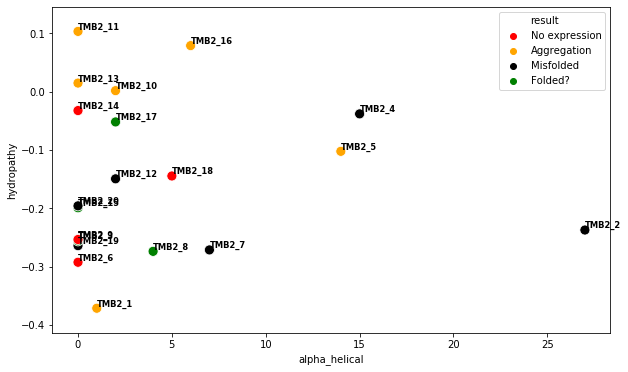

In [16]:
plt.figure(figsize=(10,6))
pl= sns.scatterplot(x=df_2.alpha_helical,y=df_2.hydropathy,hue=df.result,palette=['red','orange','black','green'],s=100)
#plt.scatter(x=1, y=-0.259, color="magenta", marker='X',s=100)

for line in range(0,df_2.shape[0]):
     pl.text(df_2.alpha_helical[line], df_2.hydropathy[line], df_2.index[line], verticalalignment='bottom', size='small', color='black', weight='semibold')


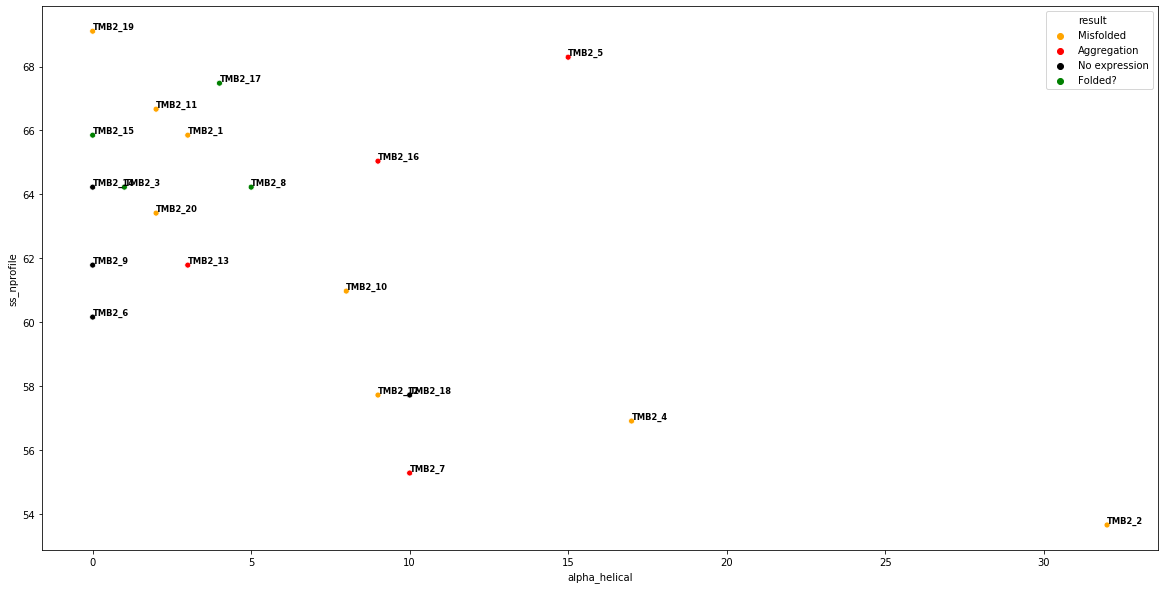

In [20]:
plt.figure(figsize=(20,10))
pl= sns.scatterplot(x=df_2.alpha_helical,y=df_2.ss_nprofile,hue=df.result,palette=['orange','red','black','green'])

for line in range(0,df_2.shape[0]):
     pl.text(df_2.alpha_helical[line], df_2.ss_nprofile[line], df_2.index[line], verticalalignment='bottom', size='small', color='black', weight='semibold')


Analysis All

In [12]:
pd.options.display.max_colwidth = 200
columns = ['sequence','ss', 'identity', 'dstr','dstr_core','dstr_surf','hydropathy','hydropathy_core','hydropathy_surface','ratio_hydropathy','F','aro','round of design','result','beta_sheet','coil','helix']
native = {'A': 0.09892494045990434, 'C': 0.0007037625203442372, 'D': 0.027770177581332288, 'E': 0.029719275383167428, 'F': 0.07929574855980195, 'G': 0.1453262552782189, 'H': 0.011157715202304692, 'I': 0.05289172587768166, 'K': 0.02000481398009908, 'L': 0.11207876498844926, 'M': 0.01748405604149801, 'N': 0.02587373268683085, 'P': 0.026855803431653235, 'Q': 0.021940748555100798, 'R': 0.037856030027200865, 'S': 0.04138471504904712, 'T': 0.04080177214642398, 'V': 0.09253231337129984, 'W': 0.02589065683561668, 'Y': 0.09150699202402476}
native_core = {'A': 0.07307786630111489, 'C': 0.000560694380689476, 'D': 0.0529505100746824, 'E': 0.06357016644762904, 'F': 0.03465929694164796, 'G': 0.24388319111608575, 'H': 0.014590630220483895, 'I': 0.01795479650462075, 'K': 0.036906266571925035, 'L': 0.033595549658657645, 'M': 0.022868994543972065, 'N': 0.04843456224965258, 'P': 0.010193109432870735, 'Q': 0.04258971634104471, 'R': 0.07494859428154613, 'S': 0.07878122858095064, 'T': 0.06227166114356501, 'V': 0.027519089809615437, 'W': 0.0037320237189443434, 'Y': 0.056912051680301494}
native_surf = {'A': 0.11995082543027749, 'C': 0.000820144522764552, 'D': 0.0072866686445619815, 'E': 0.0021825051749243796, 'F': 0.11560627606644364, 'G': 0.06515289471799646, 'H': 0.00836513311576485, 'I': 0.08131195842327642, 'K': 0.006255946474060585, 'L': 0.17592270521516432, 'M': 0.013103556460385826, 'N': 0.007521117442649561, 'P': 0.040410447379459216, 'Q': 0.005143380359499524, 'R': 0.0076822477075170256, 'S': 0.010963678339659189, 'T': 0.02333660709109572, 'V': 0.14541878523126028, 'W': 0.0439160963166815, 'Y': 0.11964902588655747}
no_expression = ['TMB2_14','TMB2_6','TMB2_9','TMB2_18','TMB2_51','TMB2_52','TMB2_53','TMB2_54','TMB2_56','TMB2_59','TMB2_61','TMB2_65','TMB2_66','TMB2_77','TMB2_78','TMB2_82','TMB2_84','TMB2_89','TMB2_90']
#promising = ['TMB2_3','TMB2_17','TMB2_24','TMB2_27','TMB2_31','TMB2_35','TMB2_43','TMB2_47','TMB2_49','TMB2_58','TMB2_60','TMB2_63','TMB2_69','TMB2_70','TMB2_71','TMB2_73','TMB2_74','TMB2_78','TMB2_81']
promising = ['TMB2_3','TMB2_17','TMB2_24','TMB2_27','TMB2_31','TMB2_35','TMB2_37','TMB2_43','TMB2_45','TMB2_47',"TMB2_58",'TMB2_60','TMB2_69','TMB2_70','TMB2_71','TMB2_73','TMB2_75','TMB2_81','TMB2_83']

df = pd.DataFrame(columns=columns)

for file in glob.glob("ss3_nprofile/*.ss3_simp*"):
    design_name = (file.split('/')[1]).split('.')[0]
    sequence = ""
    ss = ""
    dround = ""
    outcome = ""
    if "TMB1" in design_name:
        dround = "1"
    elif "TMB2" in design_name:
        dround = "2"
    elif design_name in ["OmpT3","4fuv","4rlc","1thq","2erv","1p4t"]:
        dround = "ref"
    elif "TMB0" in design_name:
        dround = "0"
    else:
        dround = "sol"
    with open(file, 'r') as in_f:
        lines = in_f.readlines()
        for i in range(0, len(lines)):
            line_seq = lines[1]
            line_ss = lines[2]
            if line_seq[0] == "M":
                sequence = line_seq[1:].strip()
                ss = line_ss[1:].strip()
            else:
                sequence = line_seq.strip()
                ss = line_ss.strip()
    print(file, len(ss))
    identity = ss_pred(ss,dround,design_name)
    distr = aa_distribution(sequence,dround,design_name)
    distr_surf = aa_distribution_surface(sequence,dround,design_name)
    distr_core = aa_distribution_core(sequence,dround,design_name)
#    outcome = results[design_name]
    
    keys = set(native.keys()) | set(distr.keys())
    
    dstr_r = numpy.corrcoef([native.get(x, 0) for x in keys],[distr.get(x, 0) for x in keys])[0, 1]
    dstr_core_r = numpy.corrcoef([native_core.get(x, 0) for x in keys],[distr_core.get(x, 0) for x in keys])[0, 1]
    dstr_surf_r = numpy.corrcoef([native_surf.get(x, 0) for x in keys],[distr_surf.get(x, 0) for x in keys])[0, 1]
    
    hydro = GRAVY(sequence)
    hydro_core = GRAVY_core(sequence,dround,design_name)
    hydro_surf = GRAVY_surf(sequence,dround,design_name)
    hydro_diff = hydro_surf-hydro_core
    
    if dround == "0" or dround == "1":
        outcome = 'No expression'
    elif design_name in no_expression:
        outcome = 'No expression'
    elif design_name in ["OmpT3","4fuv","4rlc","1thq","2erv","1p4t"]:
        outcome = "native"
    elif design_name in promising:
        outcome = "Possibly folded"
    elif dround == "sol":
        outcome = "Surface redesign"
    else: 
        outcome = 'Expression'
    
    F_freq = distr['F']
    aro_freq = distr['F'] + distr['W'] + distr['Y']
    beta_sheet = float(ss.count('E'))/len(ss)*100.0
    coil = float(ss.count('C'))/len(ss)*100.0
    helix = float(ss.count('H'))/len(ss)*100.0
    df.loc[design_name] = [sequence,ss,identity,dstr_r,dstr_core_r,dstr_surf_r,hydro,hydro_core,hydro_surf,hydro_diff,F_freq,aro_freq,dround,outcome,beta_sheet,coil,helix]
#df["beta_sheet"] = df["ss"].str.count('E')/123*100
print(df)

('ss3_nprofile/TMB2_33.ss3_simp', 123)
('ss3_nprofile/TMB2_32.ss3_simp', 123)
('ss3_nprofile/1p4t.ss3_simp', 123)
('ss3_nprofile/TMB2_44.ss3_simp', 123)
('ss3_nprofile/TMB2_45.ss3_simp', 123)
('ss3_nprofile/TMB0_3.ss3_simp', 123)
('ss3_nprofile/TMB0_2.ss3_simp', 123)
('ss3_nprofile/TMB2_70.ss3_simp', 123)
('ss3_nprofile/TMB2_71.ss3_simp', 123)
('ss3_nprofile/TMB2_39.ss3_simp', 123)
('ss3_nprofile/TMB2_38.ss3_simp', 123)
('ss3_nprofile/TMB2_24.ss3_simp', 123)
('ss3_nprofile/czh_b.ss3_simp', 111)
('ss3_nprofile/TMB2_25.ss3_simp', 123)
('ss3_nprofile/TMB2_53.ss3_simp', 123)
('ss3_nprofile/TMB2_52.ss3_simp', 123)
('ss3_nprofile/TMB2_88.ss3_simp', 123)
('ss3_nprofile/TMB2_89.ss3_simp', 123)
('ss3_nprofile/czi_a.ss3_simp', 111)
('ss3_nprofile/TMB2_67.ss3_simp', 123)
('ss3_nprofile/TMB2_66.ss3_simp', 123)
('ss3_nprofile/TMB2_10.ss3_simp', 123)
('ss3_nprofile/TMB2_11.ss3_simp', 123)
('ss3_nprofile/TMB2_5.ss3_simp', 123)
('ss3_nprofile/TMB2_4.ss3_simp', 123)
('ss3_nprofile/TMB2_82.ss3_simp', 12

In [13]:
dagg = pd.read_pickle("aggregation_data_2.pkl")


In [14]:
dall = pd.concat([df, dagg], axis=1, join="inner")
print(dall)

                                                                                                                            sequence  \
TMB2_33  GDKPGSIKIYVVVGYNTDNTVDVEGGLFYALSPYLALVAGYGWNNSSLNLAKVGGGFKYTVSPEIDPQVEAGLEYNTDNTVKPWAGAGFFYKLSPELAALVRYGWNNSSLQKADAGLAYKVKD   
TMB2_32  PTYPGSVEVYLVAGWNTDNTIRFEGGVEYALSPYVALQAGYGWNNSSLNDVTAGGGFSYQVSPEVEPYVRAGVRYNTDNTLKPEVGGGFKYKLSPDGAGVVDYGWNNSSLQVLTAGVTYRVSD   
1p4t     EGASGFYVQADAAHNTDNTFSPRISAGYRINDLRFAVDYTRNNSSLYSIGASAIYDFDTQSPVKPYLGARLSLNTDNTIGLGVLTGVSYAVTPNVDLDAGYRYNYNNSSLRSGELSAGVRVKF   
TMB2_44  TPKPGSVAIYLVLGYNTDNTVRVDGGFMYAVSPYLTVRAGYGWNNSSLNFFSFGGGVAYEVSPNIDPYVAAGALYNTDNTLKPFAGAGVTYKLTPEIAVVIEYGWNNSSLQMIAVGLQYKVRG   
TMB2_45  GQQPGTVRVFLVAGYNTDNTIVVMGGLQYAVSPYVALEAGYGWNNSSLNFLVIGGGLEYDVSPDIEPYVSLGFMYNTDNTIKPVIGAGAEYRLSPNLAVRIEYGWNNSSLQFVVAGLAYDVQK   
TMB0_3   DSKRGEFELYIQVGYSSDGKYKLEIGVRYSLTPYLHLEIGLGYRSDGRYEIEVGVGLRYPVTPDWKIYIKIGIGFSSDGRKSPKISVGIQYRVTPDWKIEIEIGYSSDGKYEIKLGISYKFGD   
TMB0_2   DTKRGEFRLYISLGYTSDGKYKVEVGVRYSLTPYLQIEL

In [15]:
print(df['beta_sheet'].values)

[30.08130081 43.90243902 43.90243902 49.59349593 49.59349593 62.60162602
 65.04065041 38.21138211 49.59349593 25.20325203 38.21138211 45.52845528
 42.34234234 42.27642276 53.65853659 32.5203252  47.96747967 43.90243902
 51.35135135 33.33333333 45.52845528 39.02439024 47.96747967 36.58536585
 27.64227642 42.27642276 35.77235772 40.6504065  61.46788991 33.33333333
 44.71544715 60.97560976 30.89430894 41.46341463 42.27642276 52.10084034
 31.70731707 45.87155963 40.6504065  41.46341463 42.27642276 41.46341463
 58.53658537 39.02439024 52.84552846 19.51219512 45.52845528 42.27642276
 23.57723577 45.52845528 43.08943089 41.32231405 47.15447154 50.40650407
 52.03252033 57.72357724 43.90243902 63.30275229 34.95934959 42.27642276
 47.15447154 63.41463415 63.41463415 39.63963964 43.08943089 34.14634146
 53.65853659 58.53658537 34.23423423 42.27642276 38.21138211 43.08943089
 35.77235772 43.08943089 45.52845528 39.83739837 30.89430894 62.3853211
 53.65853659 56.09756098 39.51612903 44.71544715 51.

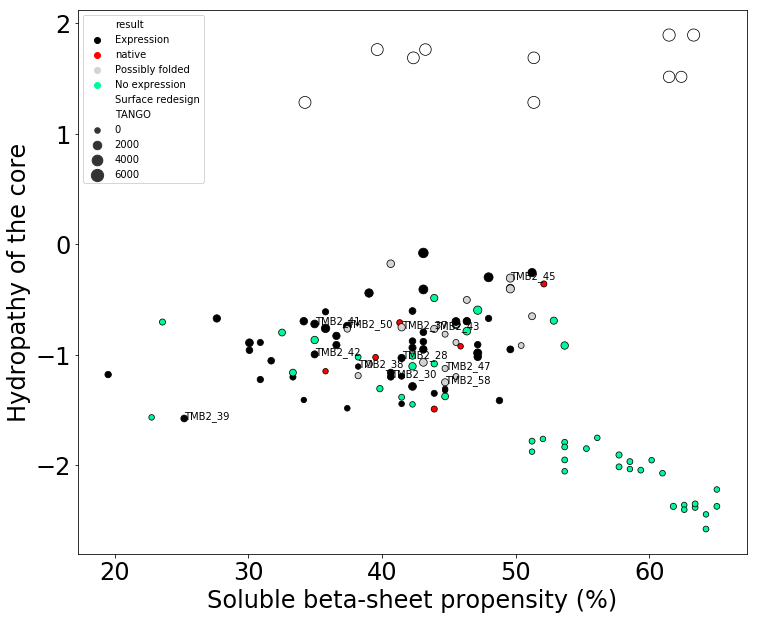

In [16]:
plt.figure(figsize=(12,10))
pl = sns.scatterplot(x=dall.beta_sheet,y=dall.hydropathy_core,hue=dall['result'],palette=["black", "red","lightgrey","mediumspringgreen","white"],edgecolor='black',s=50,size=dall["TANGO"],sizes=(30, 150))
#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Soluble beta-sheet propensity (%)', size=24)
plt.ylabel('Hydropathy of the core', size=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
for line in range(0,dall.shape[0]):
#    if dall.index[line] in ["TMB2_17","TMB2_48","TMB2_70","TMB2_82","TMB2_86"]:
    if dall.index[line] in ["TMB2_28","TMB2_30","TMB2_37","TMB2_38","TMB2_39","TMB2_41","TMB2_42","TMB2_43","TMB2_45","TMB2_47","TMB2_50","TMB2_58"]:
#    if dall.index[line] in ["TMB2_3","TMB2_17","TMB2_31","TMB2_35","TMB2_58","TMB2_69","TMB2_70","TMB2_73","OmpT3"]:
        pl.text(dall.beta_sheet[line], dall.hydropathy_core[line], dall.index[line], verticalalignment='baseline', size=10, color='black')

#plt.savefig('rounds_of_design.png', dpi=300)

(array([-3., -2., -1.,  0.,  1.,  2.,  3.]),
 <a list of 7 Text yticklabel objects>)

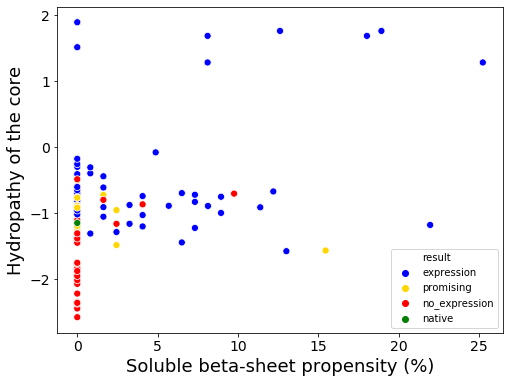

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df.helix,y=df.hydropathy_core,hue=df['result'],palette=["blue", "gold","red","green"],s=50)
#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Soluble beta-sheet propensity (%)', size=18)
plt.ylabel('Hydropathy of the core', size=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.savefig('rounds_of_design.png', dpi=300)

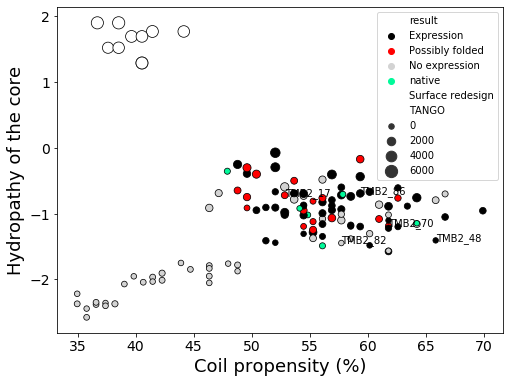

In [18]:
plt.figure(figsize=(8,6))
pl = sns.scatterplot(x=df.coil,y=df.hydropathy_core,hue=df['result'],palette=["black", "red","lightgrey","mediumspringgreen","white"],edgecolor='black',s=50,size=dall["TANGO"],sizes=(30, 150))
#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Coil propensity (%)', size=18)
plt.ylabel('Hydropathy of the core', size=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.savefig('rounds_of_design.png', dpi=300)
for line in range(0,dall.shape[0]):
    if dall.index[line] in ["TMB2_17","TMB2_48","TMB2_70","TMB2_82","TMB2_86"]:
#    if dall.index[line] in ["TMB2_3","TMB2_17","TMB2_31","TMB2_35","TMB2_58","TMB2_69","TMB2_70","TMB2_73","OmpT3"]:
        pl.text(dall.coil[line], dall.hydropathy_core[line], dall.index[line], verticalalignment='baseline', size=10, color='black')


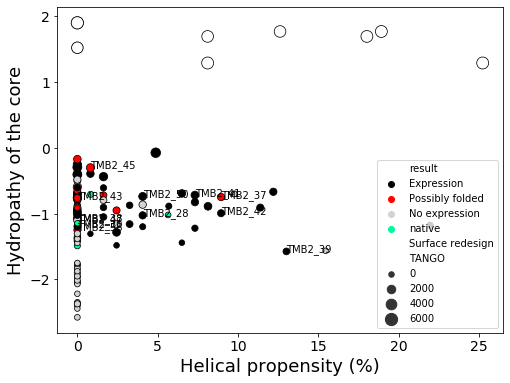

In [17]:
plt.figure(figsize=(8,6))
pl=sns.scatterplot(x=dall.helix,y=dall.hydropathy_core,hue=dall['result'],palette=["black", "red","lightgrey","mediumspringgreen","white"],edgecolor='black',s=50,size=dall["TANGO"],sizes=(30, 150))
#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Helical propensity (%)', size=18)
plt.ylabel('Hydropathy of the core', size=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for line in range(0,dall.shape[0]):
#    if dall.index[line] in ["TMB2_17","TMB2_48","TMB2_70","TMB2_82","TMB2_86"]:
    if dall.index[line] in ["TMB2_28","TMB2_30","TMB2_37","TMB2_38","TMB2_39","TMB2_41","TMB2_42","TMB2_43","TMB2_45","TMB2_47","TMB2_50","TMB2_58"]:
#    if dall.index[line] in ["TMB2_3","TMB2_17","TMB2_31","TMB2_35","TMB2_58","TMB2_69","TMB2_70","TMB2_73","OmpT3"]:
        pl.text(dall.helix[line], dall.hydropathy_core[line], dall.index[line], verticalalignment='baseline', size=10, color='black')

#plt.savefig('rounds_of_design.png', dpi=300)

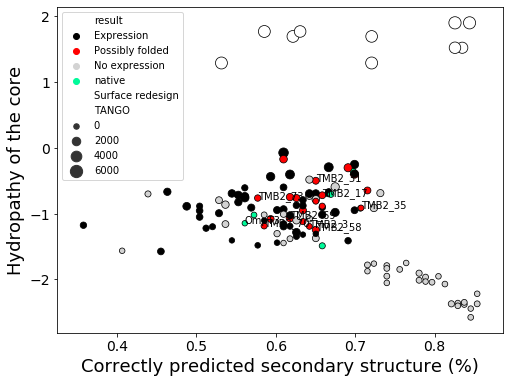

In [15]:
plt.figure(figsize=(8,6))
pl = sns.scatterplot(x=dall.identity,y=dall.hydropathy_core,hue=dall['result'],palette=["black", "red","lightgrey","mediumspringgreen","white"],edgecolor='black',s=50,size=dall["TANGO"],sizes=(30, 150))
#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Correctly predicted secondary structure (%)', size=18)
plt.ylabel('Hydropathy of the core', size=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for line in range(0,dall.shape[0]):
    if dall.index[line] in ["TMB2_3","TMB2_17","TMB2_31","TMB2_35","TMB2_58","TMB2_69","TMB2_70","TMB2_73","OmpT3"]:
        pl.text(dall.identity[line], dall.hydropathy_core[line], dall.index[line], verticalalignment='baseline', size=10, color='black')


(array([0., 1., 2., 3., 4., 5., 6.]), <a list of 7 Text yticklabel objects>)

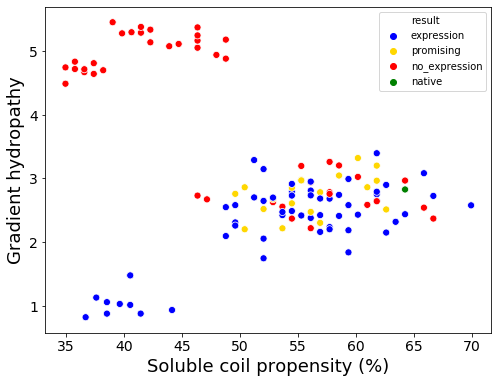

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df.coil,y=df.ratio_hydropathy,hue=df['result'],palette=["blue", "gold","red","green"],s=50)
#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Soluble coil propensity (%)', size=18)
plt.ylabel('Gradient hydropathy', size=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.savefig('rounds_of_design.png', dpi=300)

(array([0., 1., 2., 3., 4., 5., 6.]), <a list of 7 Text yticklabel objects>)

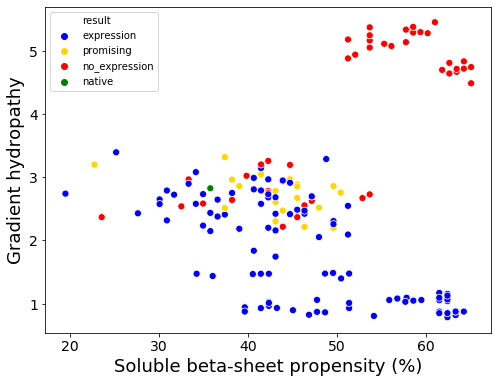

In [48]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df.beta_sheet,y=df.ratio_hydropathy,hue=df['result'],palette=["blue", "gold","red","green"],s=50)
#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Soluble beta-sheet propensity (%)', size=18)
plt.ylabel('Gradient hydropathy', size=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.savefig('rounds_of_design.png', dpi=300)

(array([-0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25]),
 <a list of 9 Text yticklabel objects>)

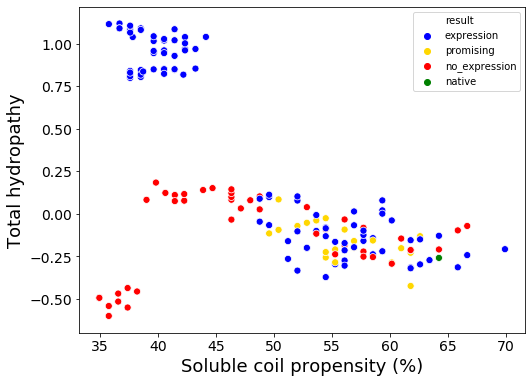

In [50]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df.coil,y=df.hydropathy,hue=df['result'],palette=["blue", "gold","red","green"],s=50)
#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Soluble coil propensity (%)', size=18)
plt.ylabel('Total hydropathy', size=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.savefig('rounds_of_design.png', dpi=300)

(array([-0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25]),
 <a list of 9 Text yticklabel objects>)

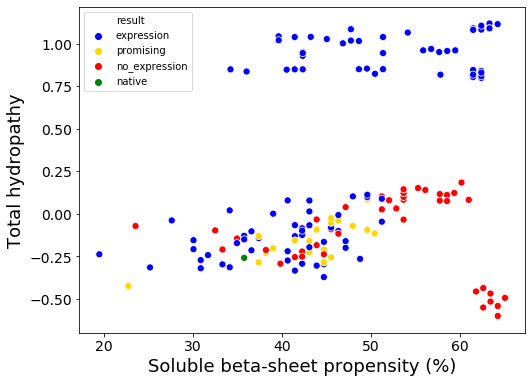

In [51]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df.beta_sheet,y=df.hydropathy,hue=df['result'],palette=["blue", "gold","red","green"],s=50)
#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Soluble beta-sheet propensity (%)', size=18)
plt.ylabel('Total hydropathy', size=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.savefig('rounds_of_design.png', dpi=300)

In [17]:
#df_2 = df.loc[(df['round of design'] == "2") | (df['round of design'] == "ref")]
df2 = dall.loc[~(dall['round of design'] == "sol")]
#df_2["alpha_helical"] = df_2["ss"].str.count('H')
print(df2)

                                                                                                                            sequence  \
TMB2_33  GDKPGSIKIYVVVGYNTDNTVDVEGGLFYALSPYLALVAGYGWNNSSLNLAKVGGGFKYTVSPEIDPQVEAGLEYNTDNTVKPWAGAGFFYKLSPELAALVRYGWNNSSLQKADAGLAYKVKD   
TMB2_32  PTYPGSVEVYLVAGWNTDNTIRFEGGVEYALSPYVALQAGYGWNNSSLNDVTAGGGFSYQVSPEVEPYVRAGVRYNTDNTLKPEVGGGFKYKLSPDGAGVVDYGWNNSSLQVLTAGVTYRVSD   
1p4t     EGASGFYVQADAAHNTDNTFSPRISAGYRINDLRFAVDYTRNNSSLYSIGASAIYDFDTQSPVKPYLGARLSLNTDNTIGLGVLTGVSYAVTPNVDLDAGYRYNYNNSSLRSGELSAGVRVKF   
TMB2_44  TPKPGSVAIYLVLGYNTDNTVRVDGGFMYAVSPYLTVRAGYGWNNSSLNFFSFGGGVAYEVSPNIDPYVAAGALYNTDNTLKPFAGAGVTYKLTPEIAVVIEYGWNNSSLQMIAVGLQYKVRG   
TMB2_45  GQQPGTVRVFLVAGYNTDNTIVVMGGLQYAVSPYVALEAGYGWNNSSLNFLVIGGGLEYDVSPDIEPYVSLGFMYNTDNTIKPVIGAGAEYRLSPNLAVRIEYGWNNSSLQFVVAGLAYDVQK   
TMB0_3   DSKRGEFELYIQVGYSSDGKYKLEIGVRYSLTPYLHLEIGLGYRSDGRYEIEVGVGLRYPVTPDWKIYIKIGIGFSSDGRKSPKISVGIQYRVTPDWKIEIEIGYSSDGKYEIKLGISYKFGD   
TMB0_2   DTKRGEFRLYISLGYTSDGKYKVEVGVRYSLTPYLQIEL

In [18]:
df2 = df2.rename(columns={"TANGO": "Aggregation propensity"})


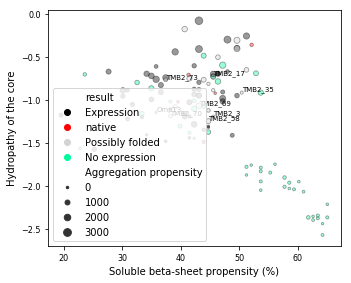

In [19]:
plt.figure(figsize=(5.25,4.34))
pl = sns.scatterplot(x=df2.beta_sheet,y=df2.hydropathy_core,hue=df2['result'],palette=["black","red","lightgray","mediumspringgreen"],edgecolor='black',alpha=0.4,s=10,size=df2["Aggregation propensity"],sizes=(6, 60))

#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Soluble beta-sheet propensity (%)', size=10)
plt.ylabel('Hydropathy of the core', size=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
for line in range(0,df2.shape[0]):
    if df2.index[line] in ["TMB2_3","TMB2_17","TMB2_35","TMB2_58","TMB2_69","TMB2_70","TMB2_73","OmpT3"]:
#    if df2.index[line] in ["TMB2_17","TMB2_48","TMB2_70","TMB2_82","TMB2_86"]:
#    if df2.index[line] in ["TMB2_28","TMB2_30","TMB2_37","TMB2_38","TMB2_39","TMB2_41","TMB2_42","TMB2_43","TMB2_45","TMB2_47","TMB2_50","TMB2_58"]:
        pl.text(df2.beta_sheet[line], df2.hydropathy_core[line], df2.index[line], verticalalignment='bottom', size=7, color='black')

#plt.savefig('rounds_of_design_B.svg',bbox_inches='tight', dpi=300, format="svg")

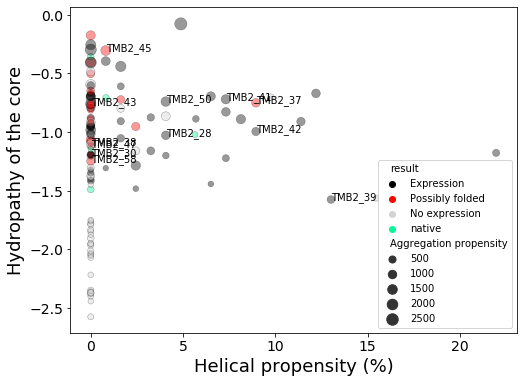

In [25]:
plt.figure(figsize=(8,6))
pl =sns.scatterplot(x=df2.helix,y=df2.hydropathy_core,hue=df2['result'],palette=["black", "red","lightgrey","mediumspringgreen"],edgecolor='black',s=50,alpha=0.4,size=df2["Aggregation propensity"],sizes=(30, 150))
#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Helical propensity (%)', size=18)
plt.ylabel('Hydropathy of the core', size=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for line in range(0,df2.shape[0]):
#    if df2.index[line] in ["TMB2_17","TMB2_70","TMB2_48","OmpT3"]:
    if df2.index[line] in ["TMB2_28","TMB2_30","TMB2_37","TMB2_38","TMB2_39","TMB2_41","TMB2_42","TMB2_43","TMB2_45","TMB2_47","TMB2_50","TMB2_58"]:
#    if df2.index[line] in ["TMB2_3","TMB2_17","TMB2_31","TMB2_35","TMB2_58","TMB2_69","TMB2_70","TMB2_73","OmpT3"]:
        pl.text(df2.helix[line], df2.hydropathy_core[line], df2.index[line], size=10, color='black')
        

In [37]:
df2 = df2.loc[~(df2['result'] == "No expression")]
df2 = df2.rename(columns={"helix": "Helix propensity (%)"})

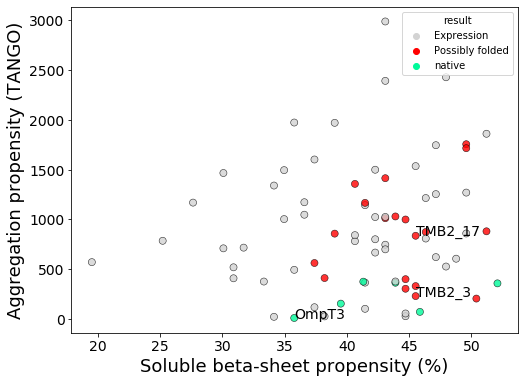

In [48]:
plt.figure(figsize=(8,6))
pl =sns.scatterplot(x=df2.beta_sheet,y=df2["Aggregation propensity"],hue=df2['result'],palette=["lightgrey", "red","mediumspringgreen"],edgecolor='black',s=50,alpha=0.8)
#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Soluble beta-sheet propensity (%)', size=18)
plt.ylabel('Aggregation propensity (TANGO)', size=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for line in range(0,df2.shape[0]):
    if df2.index[line] in ["TMB2_17","TMB2_3","OmpT3"]:
#    if df2.index[line] in ["TMB2_28","TMB2_30","TMB2_37","TMB2_38","TMB2_39","TMB2_41","TMB2_42","TMB2_43","TMB2_45","TMB2_47","TMB2_50","TMB2_58"]:
#    if df2.index[line] in ["TMB2_3","TMB2_17","TMB2_31","TMB2_35","TMB2_58","TMB2_69","TMB2_70","TMB2_73","OmpT3"]:
        pl.text(df2.beta_sheet[line], df2["Aggregation propensity"][line], df2.index[line], size=14, color='black')
#plt.savefig('aggregation_designs_native2.pdf',bbox_inches='tight', dpi=300, format="pdf")

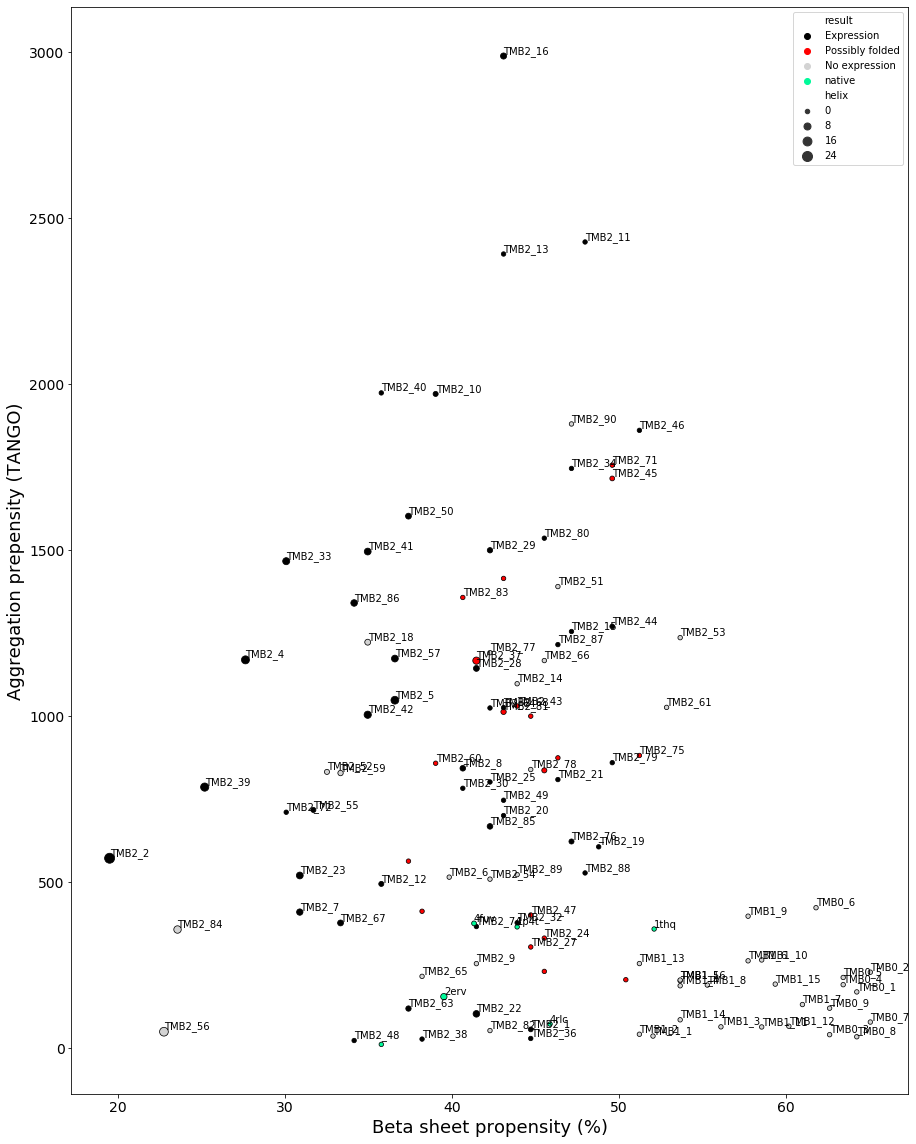

In [17]:
plt.figure(figsize=(15,20))
pl = sns.scatterplot(x=df2.beta_sheet,y=df2['Aggregation propensity'],hue=df2['result'],palette=["black", "red","lightgrey","mediumspringgreen"],edgecolor='black',s=50,size=df2["helix"], sizes=(20,100))
#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Beta sheet propensity (%)', size=18)
plt.ylabel('Aggregation prepensity (TANGO)', size=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for line in range(0,df2.shape[0]):
#    if df2.index[line] in ["TMB2_17","TMB2_70","TMB2_48","OmpT3"]:
    if df2.index[line] not in ["TMB2_3","TMB2_17","TMB2_31","TMB2_35","TMB2_58","TMB2_69","TMB2_70","TMB2_73","OmpT3"]:
        pl.text(df2.beta_sheet[line], df2['Aggregation propensity'][line], df2.index[line], size=10, color='black', verticalalignment='bottom')
        

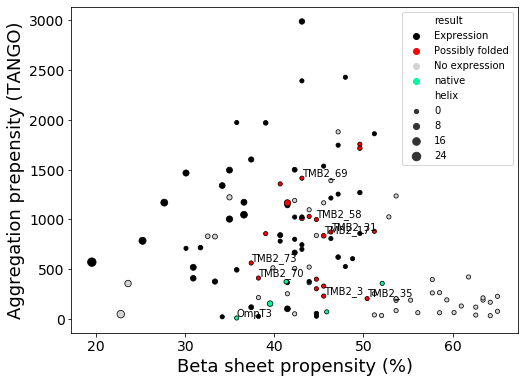

In [29]:
plt.figure(figsize=(8,6))
pl = sns.scatterplot(x=df2.beta_sheet,y=df2['Aggregation propensity'],hue=df2['result'],palette=["black", "red","lightgrey","mediumspringgreen"],size=df2["helix"],edgecolor='black',s=50)
#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Beta sheet propensity (%)', size=18)
plt.ylabel('Aggregation prepensity (TANGO)', size=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for line in range(0,df2.shape[0]):
#    if df2.index[line] in ["TMB2_17","TMB2_70","TMB2_48","OmpT3"]:
    if df2.index[line] in ["TMB2_3","TMB2_17","TMB2_31","TMB2_35","TMB2_58","TMB2_69","TMB2_70","TMB2_73","OmpT3"]:
        pl.text(df2.beta_sheet[line], df2['Aggregation propensity'][line], df2.index[line], size=10, color='black', verticalalignment='bottom')
        

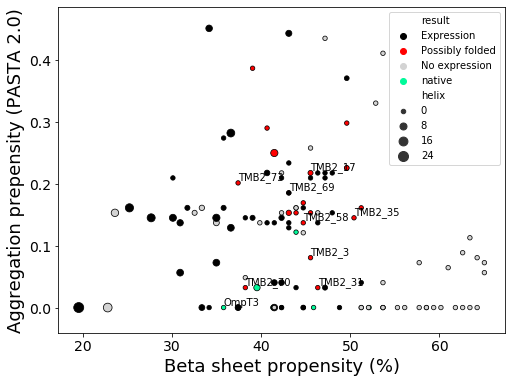

In [30]:
plt.figure(figsize=(8,6))
pl = sns.scatterplot(x=df2.beta_sheet,y=df2['PASTA 2.0'],hue=df2['result'],palette=["black", "red","lightgrey","mediumspringgreen"],edgecolor='black',s=50,size=df2["helix"], sizes=(20,100))
#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Beta sheet propensity (%)', size=18)
plt.ylabel('Aggregation prepensity (PASTA 2.0)', size=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for line in range(0,df2.shape[0]):
#    if df2.index[line] in ["TMB2_17","TMB2_48","TMB2_70","TMB2_82","TMB2_86"]:
#    if df2.index[line] in ["TMB2_28","TMB2_30","TMB2_37","TMB2_38","TMB2_39","TMB2_41","TMB2_42","TMB2_43","TMB2_45","TMB2_47","TMB2_50","TMB2_58"]:
    if df2.index[line] in ["TMB2_3","TMB2_17","TMB2_31","TMB2_35","TMB2_58","TMB2_69","TMB2_70","TMB2_73","OmpT3"]:
        pl.text(df2.beta_sheet[line], df2['PASTA 2.0'][line], df2.index[line], size=10, color='black', verticalalignment='bottom')
        

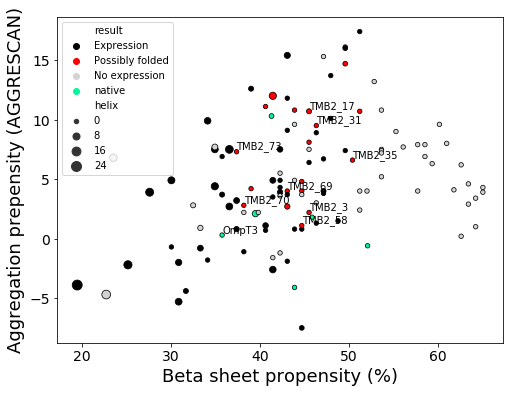

In [31]:
plt.figure(figsize=(8,6))
pl = sns.scatterplot(x=df2.beta_sheet,y=df2['AGGRESCAN'],hue=df2['result'],palette=["black", "red","lightgrey","mediumspringgreen"],edgecolor='black',s=50,size=df2["helix"], sizes=(20,100))
#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Beta sheet propensity (%)', size=18)
plt.ylabel('Aggregation prepensity (AGGRESCAN)', size=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for line in range(0,df2.shape[0]):
#    if df2.index[line] in ["TMB2_17","TMB2_48","TMB2_70","TMB2_82","TMB2_86"]:
    if df2.index[line] in ["TMB2_3","TMB2_17","TMB2_31","TMB2_35","TMB2_58","TMB2_69","TMB2_70","TMB2_73","OmpT3"]:
        pl.text(df2.beta_sheet[line], df2['AGGRESCAN'][line], df2.index[line], size=10, color='black', verticalalignment='bottom')
        

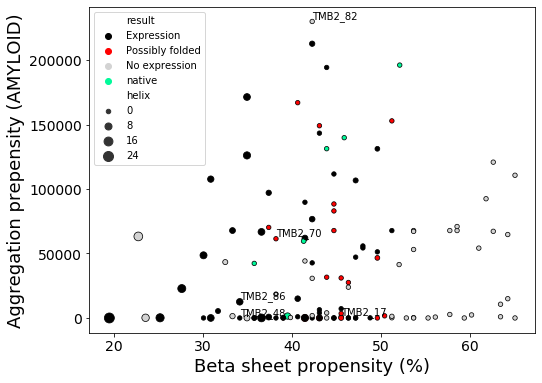

In [26]:
plt.figure(figsize=(8,6))
pl = sns.scatterplot(x=df2.beta_sheet,y=df2['AMYLOID'],hue=df2['result'],palette=["black", "red","lightgrey","mediumspringgreen"],edgecolor='black',s=50,size=df2["helix"], sizes=(20,100))
#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Beta sheet propensity (%)', size=18)
plt.ylabel('Aggregation prepensity (AMYLOID)', size=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for line in range(0,df2.shape[0]):
#    if df2.index[line] in ["TMB2_17","TMB2_70","TMB2_48","OmpT3"]:
    if df2.index[line] in ["TMB2_17","TMB2_48","TMB2_70","TMB2_82","TMB2_86"]:
        pl.text(df2.beta_sheet[line], df2['AMYLOID'][line], df2.index[line], size=10, color='black', verticalalignment='bottom')
        

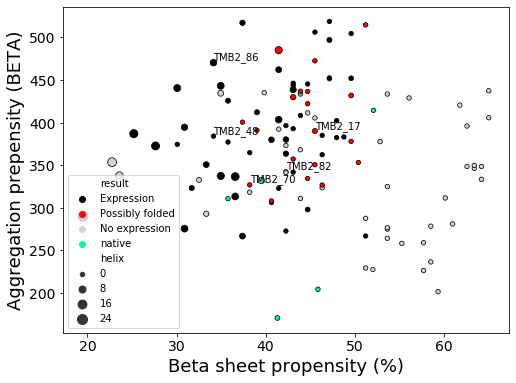

In [27]:
plt.figure(figsize=(8,6))
pl = sns.scatterplot(x=df2.beta_sheet,y=df2['BETA'],hue=df2['result'],palette=["black", "red","lightgrey","mediumspringgreen"],edgecolor='black',s=50,size=df2["helix"], sizes=(20,100))
#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Beta sheet propensity (%)', size=18)
plt.ylabel('Aggregation prepensity (BETA)', size=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for line in range(0,df2.shape[0]):
#    if df2.index[line] in ["TMB2_17","TMB2_70","TMB2_48","OmpT3"]:
    if df2.index[line] in ["TMB2_17","TMB2_48","TMB2_70","TMB2_82","TMB2_86"]:
        pl.text(df2.beta_sheet[line], df2['BETA'][line], df2.index[line], size=10, color='black', verticalalignment='bottom')
        

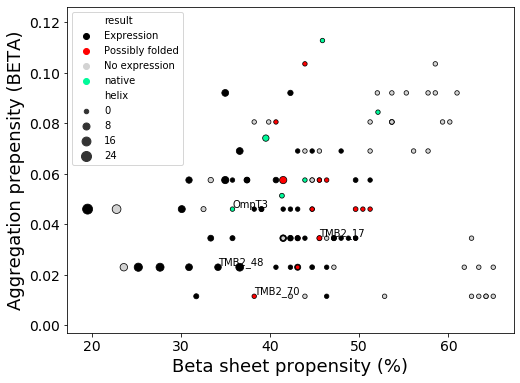

In [68]:
plt.figure(figsize=(8,6))
pl = sns.scatterplot(x=df2.beta_sheet,y=df2['F'],hue=df2['result'],palette=["black", "red","lightgrey","mediumspringgreen"],edgecolor='black',s=50,size=df2["helix"], sizes=(20,100))
#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Beta sheet propensity (%)', size=18)
plt.ylabel('Aggregation prepensity (BETA)', size=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for line in range(0,df2.shape[0]):
    if df2.index[line] in ["TMB2_17","TMB2_70","TMB2_48","OmpT3"]:
#    if df2.index[line] in ["TMB2_3","TMB2_17","TMB2_31","TMB2_35","TMB2_58","TMB2_69","TMB2_70","TMB2_73","OmpT3"]:
        pl.text(df2.beta_sheet[line], df2['F'][line], df2.index[line], size=10, color='black', verticalalignment='bottom')
        

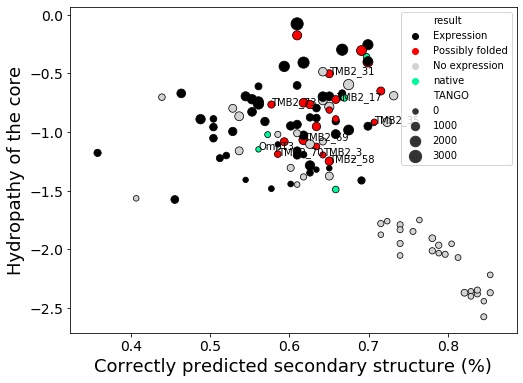

In [19]:
plt.figure(figsize=(8,6))
pl = sns.scatterplot(x=df2.identity,y=df2.hydropathy_core,hue=df2['result'],palette=["black", "red","lightgrey","mediumspringgreen"],edgecolor='black',s=50,size=df2["TANGO"],sizes=(30, 150))
#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Correctly predicted secondary structure (%)', size=18)
plt.ylabel('Hydropathy of the core', size=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for line in range(0,df2.shape[0]):
    if df2.index[line] in ["TMB2_3","TMB2_17","TMB2_31","TMB2_35","TMB2_58","TMB2_69","TMB2_70","TMB2_73","OmpT3"]:
        pl.text(df2.identity[line], df2.hydropathy_core[line], df2.index[line], verticalalignment='baseline', size=10, color='black')


In [22]:
df_center = df2[(df2["beta_sheet"]>38)&(df2["beta_sheet"]<51)]
print(df_center)

                                                                                                                            sequence  \
TMB2_29  GDKPGSVQLYVVIGWNTDNTIQLEGGLEYALSPYLSVFAGYGWNNSSLNFFTFGGGVKYTLTPDLEPYVRAGFKYNTDNTIKPQFGGGADYKLSPDLKGKIDYGWNNSSLNFIAFGAAYQLQP   
TMB2_71  QPVPGSVFITVAIGYNTDNTLKIMGGLEYVVSPYGSVVAGYGWNNSSLNEIKVGGGLHYKLSPDIFPYVVAGVVYNTDNTLKPTAGGGVLYKLSPELFARVEYGWNNSSLQEVLVGAAYRVRP   
TMB2_36  SDPPGTIAVEVKGGYNTDNTVTIEGGVRYAVTPYVFLRIGYGWNNSSLNFLSIGGGADYRVSPELEPYVEAGFKYNTDNTIKPFAGAGFDYRLSPDGAASVDYGWNNSSLNFVKAGAMYRLTK   
TMB2_88  QDQPGTVALEVSVGYNTDNTFKFVGGAEYALSPYLLVDAGYGWNNSSLNTGEFGGGVMYVVSPEIEPYVVAGAKFNTDNTIKPLIGAGFKYRLSPNLALKLDYGWNNSSLQFVRIGLVYKVKE   
TMB2_87  QGQPGTVAVVVAVGYNTDNTLELEGGVRYVLSPYLVLEAGYGWNNSSLNVGSAGGGVMYVLSPDIEPYVVAGLQFNTDNTVKPAAGAGADYRLSPELAATADYGWNNSSLQKVRVGARYKLKD   
...                                                                                                                              ...   
TMB2_9   GPGPGSVAIEVAVGYNTDNTLDIEGGLLYAVSPYFELVA

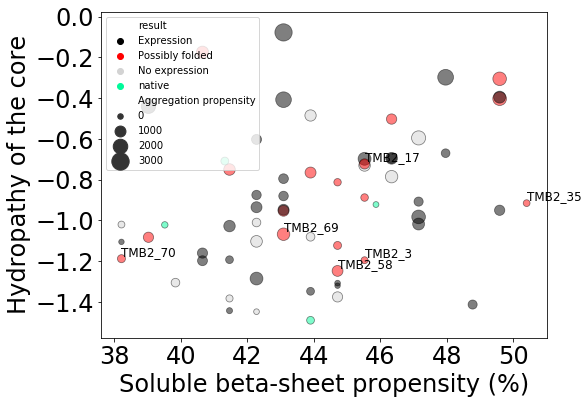

In [24]:
plt.figure(figsize=(8,6))
pl = sns.scatterplot(x=df_center.beta_sheet,y=df_center.hydropathy_core,hue=df_center['result'],palette=["black","red","lightgray","mediumspringgreen"],edgecolor='black',alpha=0.5,s=50,size=df_center["Aggregation propensity"],sizes=(30, 300))

#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Soluble beta-sheet propensity (%)', size=24)
plt.ylabel('Hydropathy of the core', size=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
for line in range(0,df_center.shape[0]):
    if df_center.index[line] in ["TMB2_3","TMB2_17","TMB2_35","TMB2_58","TMB2_69","TMB2_70","TMB2_73","OmpT3"]:
        pl.text(df_center.beta_sheet[line], df_center.hydropathy_core[line], df_center.index[line], verticalalignment='bottom', size=12, color='black')

#plt.savefig('rounds_of_design.png', dpi=300)

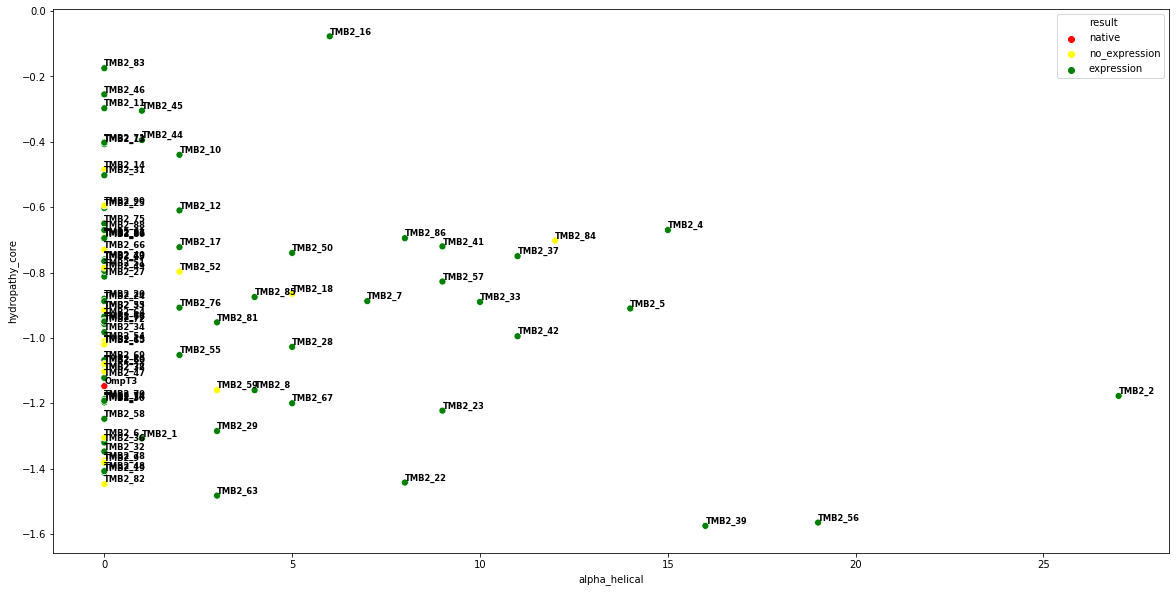

In [23]:
plt.figure(figsize=(20,10))
pl= sns.scatterplot(x=df_2.alpha_helical,y=df_2.hydropathy_core,hue=df.result,palette=['red','yellow','green'],s=50)

for line in range(0,df_2.shape[0]):
     pl.text(df_2.alpha_helical[line], df_2.hydropathy_core[line], df_2.index[line], verticalalignment='bottom', size='small', color='black', weight='semibold')


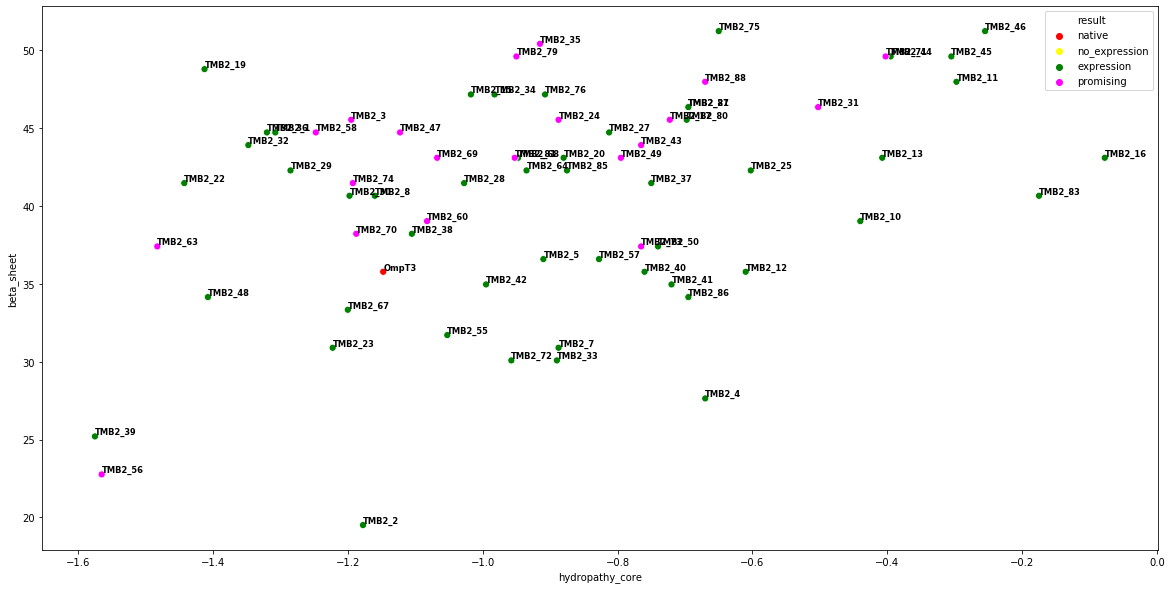

In [20]:
plt.figure(figsize=(20,10))
pl= sns.scatterplot(x=df_2.hydropathy_core,y=df_2.beta_sheet,hue=df.result,palette=['red','yellow','green','magenta'],s=50)

for line in range(0,df_2.shape[0]):
     pl.text(df_2.hydropathy_core[line], df_2.beta_sheet[line], df_2.index[line], verticalalignment='bottom', size='small', color='black', weight='semibold')


In [ ]:
df["coil"] = df["ss"].str.count('E')/123*100

In [32]:
print(df2[df2.helix>7])

                                                                                                                            sequence  \
TMB2_39  GPQPGSIWITVAVGYNTDNTLDLLGGLTYALTPYLEVSAGYGWNNSSLNRAKAGGGVTYDLSPEIEPYVTAGFDYNTDNTIKPSAGAGFKYKLTPDLALRVEYGWNNSSLQKIDIGADYKVQP   
TMB2_5   GTQPGSVHVYLVAGWNTDNTISAWGGVVYALSPYLVLEIGYGWNNSSLNRIRIGGGAAYQVSPELDPYVFAGGDWNTDNTLKPTGGVGFWYRLSPDLALDVQYGWNNSSLQELVAGLTYRLTP   
TMB2_41  GPKPGSVYLVVAGGYNTDNTFQLWGGLSYVLSPYLDFSAGYGWNNSSLNFFVAGGGFLYTVSPEVEPYVAAGAKYNTDNTLSPFAGAGAFYRLSPQLEARIEYGWNNSSLNEIEAGFRYQVQP   
TMB2_2   PDEPGTIKLDIAVGWNTDNTLDFVGGLEYAVSPYVSVFAGYGWNNSSLNAAKFGGGAKYKLTPDLEPYVAAGAKYNTDNTIKPFAGAGADYKLSPQLEARAEYGWNNSSLQMAEAGVAYSLVG   
TMB2_56  KGKPGTVEIMVMAGWNTDNTIKFAGGLDYDLSPYVFLRAGYGWNNSSLNEFEAGGGVKYELTPDLSPYAWAGVKYNTDNTVKPTAGAGAEYKLSPDLAALIEYGWNNSSLNDVRAGFKYKLKE   
TMB2_4   GDQPGTVAVYLVAGWNTDNTIQAEGGLQYALSPYLALDVGYGWNNSSLNKVKIGGGVSYTLSPDIDPFAFAGIRWNTDNTIKPTAGAGAKYRLSPELAALIAYGWNNSSLQSIVAGAAYKVTP   
TMB2_37  GPKPGSVYLVVEVGYNTDNTFELVGGLMYALSPYLTLSA

In [20]:
promising = ['TMB2_3','TMB2_17','TMB2_24','TMB2_27','TMB2_31','TMB2_35','TMB2_37','TMB2_43','TMB2_45','TMB2_47',"TMB2_58",'TMB2_60','TMB2_69','TMB2_70','TMB2_71','TMB2_73','TMB2_75','TMB2_81','TMB2_83']


In [21]:
pd.options.display.max_colwidth = 200
columns = ['sequence','ss', 'identity','hydropathy','hydropathy_core','hydropathy_surface','ratio_hydropathy','F','aro','beta_sheet','coil','helix',"Aggregation propensity",'result']
native = {'A': 0.09892494045990434, 'C': 0.0007037625203442372, 'D': 0.027770177581332288, 'E': 0.029719275383167428, 'F': 0.07929574855980195, 'G': 0.1453262552782189, 'H': 0.011157715202304692, 'I': 0.05289172587768166, 'K': 0.02000481398009908, 'L': 0.11207876498844926, 'M': 0.01748405604149801, 'N': 0.02587373268683085, 'P': 0.026855803431653235, 'Q': 0.021940748555100798, 'R': 0.037856030027200865, 'S': 0.04138471504904712, 'T': 0.04080177214642398, 'V': 0.09253231337129984, 'W': 0.02589065683561668, 'Y': 0.09150699202402476}
native_core = {'A': 0.07307786630111489, 'C': 0.000560694380689476, 'D': 0.0529505100746824, 'E': 0.06357016644762904, 'F': 0.03465929694164796, 'G': 0.24388319111608575, 'H': 0.014590630220483895, 'I': 0.01795479650462075, 'K': 0.036906266571925035, 'L': 0.033595549658657645, 'M': 0.022868994543972065, 'N': 0.04843456224965258, 'P': 0.010193109432870735, 'Q': 0.04258971634104471, 'R': 0.07494859428154613, 'S': 0.07878122858095064, 'T': 0.06227166114356501, 'V': 0.027519089809615437, 'W': 0.0037320237189443434, 'Y': 0.056912051680301494}
native_surf = {'A': 0.11995082543027749, 'C': 0.000820144522764552, 'D': 0.0072866686445619815, 'E': 0.0021825051749243796, 'F': 0.11560627606644364, 'G': 0.06515289471799646, 'H': 0.00836513311576485, 'I': 0.08131195842327642, 'K': 0.006255946474060585, 'L': 0.17592270521516432, 'M': 0.013103556460385826, 'N': 0.007521117442649561, 'P': 0.040410447379459216, 'Q': 0.005143380359499524, 'R': 0.0076822477075170256, 'S': 0.010963678339659189, 'T': 0.02333660709109572, 'V': 0.14541878523126028, 'W': 0.0439160963166815, 'Y': 0.11964902588655747}
aggregation = {'1i78':339.747,'1k24':11.7284,"2vdf":11.7783,'2x4m':302.621,"2x55":302.968}

df_nat = pd.DataFrame(columns=columns)

for file in glob.glob("10-12/*_trim.ss3_simp"):
    name = (file.split('/')[-1]).split('_trim')[0]
    sequence = ""
    ss = ""
    with open(file, 'r') as in_f:
        lines = in_f.readlines()
        for i in range(0, len(lines)):
            line_seq = lines[1].strip()
            line_ss = lines[2].strip()
            line_ref = lines[3].strip()
            line_mem = lines[4].strip()
    sequence = line_seq.strip()
    ss = line_ss.strip()
    ref_ss = line_ref.strip()
    mem = line_mem.strip()
    print(file, len(ss))
    identity = ss_pred_native(ss,name,ref_ss)
    
    hydro = GRAVY(sequence)
    hydro_core = GRAVY_core_native(sequence,name,mem)
    hydro_surf = GRAVY_surf_native(sequence,name,mem)
    hydro_diff = hydro_surf-hydro_core
    
    F_freq = sequence.count('F')/len(ss)*100
    aro_freq = sequence.count('F')/len(ss)*100 + sequence.count('Y')/len(ss)*100 + sequence.count('W')/len(ss)*100
    beta_sheet = float(ss.count('E'))/len(ss)*100
    coil = float(ss.count('C'))/len(ss)*100
    helix = float(ss.count('H'))/len(ss)*100
    df_nat.loc[name] = [sequence,ss,identity,hydro,hydro_core,hydro_surf,hydro_diff,F_freq,aro_freq,beta_sheet,coil,helix,aggregation[name],'native_10']
#df["beta_sheet"] = df["ss"].str.count('E')/123*100
print(df_nat)

('10-12/1k24_trim.ss3_simp', 143)
[2, 4, 6, 14, 16, 18, 20, 22, 28, 30, 32, 34, 42, 44, 46, 48, 50, 60, 62, 64, 66, 74, 76, 78, 80, 82, 84, 90, 92, 94, 96, 98, 106, 108, 110, 112, 114, 116, 122, 124, 126, 128, 136, 138, 140, 142]
[1, 3, 5, 7, 13, 15, 17, 19, 21, 23, 27, 29, 31, 33, 35, 41, 43, 45, 47, 49, 51, 59, 61, 63, 65, 67, 73, 75, 77, 79, 81, 83, 85, 89, 91, 93, 95, 97, 99, 105, 107, 109, 111, 113, 115, 117, 121, 123, 125, 127, 129, 135, 137, 139, 141, 143]
('10-12/1i78_trim.ss3_simp', 138)
[2, 4, 6, 8, 16, 18, 20, 22, 24, 26, 30, 32, 34, 36, 44, 46, 48, 50, 52, 62, 64, 66, 74, 76, 78, 80, 82, 87, 89, 91, 93, 101, 103, 105, 107, 109, 115, 117, 119, 121, 129, 131, 133, 135, 137]
[1, 3, 5, 7, 9, 15, 17, 19, 21, 23, 25, 29, 31, 33, 35, 37, 43, 45, 47, 49, 51, 53, 61, 63, 65, 67, 73, 75, 77, 79, 81, 83, 86, 88, 90, 92, 94, 100, 102, 104, 106, 108, 110, 114, 116, 118, 120, 122, 128, 130, 132, 134, 136, 138]
('10-12/2vdf_trim.ss3_simp', 141)
[2, 4, 6, 14, 16, 18, 20, 22, 28, 30, 32, 34

In [22]:
pd.options.display.max_colwidth = 200
#columns = ['sequence','ss', 'identity','hydropathy','hydropathy_core','hydropathy_surface','ratio_hydropathy','F','aro','beta_sheet','coil','helix']
#native = {'A': 0.09892494045990434, 'C': 0.0007037625203442372, 'D': 0.027770177581332288, 'E': 0.029719275383167428, 'F': 0.07929574855980195, 'G': 0.1453262552782189, 'H': 0.011157715202304692, 'I': 0.05289172587768166, 'K': 0.02000481398009908, 'L': 0.11207876498844926, 'M': 0.01748405604149801, 'N': 0.02587373268683085, 'P': 0.026855803431653235, 'Q': 0.021940748555100798, 'R': 0.037856030027200865, 'S': 0.04138471504904712, 'T': 0.04080177214642398, 'V': 0.09253231337129984, 'W': 0.02589065683561668, 'Y': 0.09150699202402476}
#native_core = {'A': 0.07307786630111489, 'C': 0.000560694380689476, 'D': 0.0529505100746824, 'E': 0.06357016644762904, 'F': 0.03465929694164796, 'G': 0.24388319111608575, 'H': 0.014590630220483895, 'I': 0.01795479650462075, 'K': 0.036906266571925035, 'L': 0.033595549658657645, 'M': 0.022868994543972065, 'N': 0.04843456224965258, 'P': 0.010193109432870735, 'Q': 0.04258971634104471, 'R': 0.07494859428154613, 'S': 0.07878122858095064, 'T': 0.06227166114356501, 'V': 0.027519089809615437, 'W': 0.0037320237189443434, 'Y': 0.056912051680301494}
#native_surf = {'A': 0.11995082543027749, 'C': 0.000820144522764552, 'D': 0.0072866686445619815, 'E': 0.0021825051749243796, 'F': 0.11560627606644364, 'G': 0.06515289471799646, 'H': 0.00836513311576485, 'I': 0.08131195842327642, 'K': 0.006255946474060585, 'L': 0.17592270521516432, 'M': 0.013103556460385826, 'N': 0.007521117442649561, 'P': 0.040410447379459216, 'Q': 0.005143380359499524, 'R': 0.0076822477075170256, 'S': 0.010963678339659189, 'T': 0.02333660709109572, 'V': 0.14541878523126028, 'W': 0.0439160963166815, 'Y': 0.11964902588655747}
aggregation = {'1uyn':1076.14,'2qom':149.265,"2wjr":134.488,'3aeh':157.946,"3fid":348.295,'3kvn':251.925,'3qq2':35.6055,'3slj':141.941,'4e1s':213.556,'4e1t':572.279,'4fqe':750.985,'4mee':482.387,'4rl8':718.042,'5o65':817.788,'5o67':820.086}

#df_nat = pd.DataFrame(columns=columns)

for file in glob.glob("12-14/*_trim.ss3_simp"):
    name = (file.split('/')[-1]).split('_trim')[0]
    sequence = ""
    ss = ""
    with open(file, 'r') as in_f:
        lines = in_f.readlines()
        for i in range(0, len(lines)):
            line_seq = lines[1].strip()
            line_ss = lines[2].strip()
            line_ref = lines[3].strip()
            line_mem = lines[4].strip()
    sequence = line_seq.strip()
    ss = line_ss.strip()
    ref_ss = line_ref.strip()
    mem = line_mem.strip()
    print(file, len(ss))
    identity = ss_pred_native(ss,name,ref_ss)
    
    hydro = GRAVY(sequence)
    hydro_core = GRAVY_core_native(sequence,name,mem)
    hydro_surf = GRAVY_surf_native(sequence,name,mem)
    hydro_diff = hydro_surf-hydro_core
    
    F_freq = sequence.count('F')/len(ss)*100
    aro_freq = sequence.count('F')/len(ss)*100 + sequence.count('Y')/len(ss)*100 + sequence.count('W')/len(ss)*100
    beta_sheet = float(ss.count('E'))/len(ss)*100
    coil = float(ss.count('C'))/len(ss)*100
    helix = float(ss.count('H'))/len(ss)*100
    df_nat.loc[name] = [sequence,ss,identity,hydro,hydro_core,hydro_surf,hydro_diff,F_freq,aro_freq,beta_sheet,coil,helix,aggregation[name],'native_12']
#df["beta_sheet"] = df["ss"].str.count('E')/123*100
print(df_nat)

('12-14/2wjr_trim.ss3_simp', 170)
[3, 5, 7, 15, 17, 19, 21, 23, 29, 31, 33, 35, 43, 45, 47, 49, 51, 53, 59, 61, 63, 65, 67, 75, 77, 79, 81, 83, 85, 91, 93, 95, 97, 105, 107, 109, 111, 113, 119, 121, 123, 125, 133, 135, 137, 139, 141, 147, 149, 151, 153, 161, 163, 165, 167]
[2, 4, 6, 8, 14, 16, 18, 20, 22, 24, 28, 30, 32, 34, 36, 42, 44, 46, 48, 50, 52, 54, 58, 60, 62, 64, 66, 68, 74, 76, 78, 80, 82, 84, 86, 90, 92, 94, 96, 98, 104, 106, 108, 110, 112, 114, 118, 120, 122, 124, 126, 132, 134, 136, 138, 140, 142, 146, 148, 150, 152, 154, 160, 162, 164, 166, 168]
('12-14/4fqe_trim.ss3_simp', 156)
[2, 4, 6, 14, 16, 18, 20, 26, 28, 30, 38, 40, 42, 44, 46, 52, 54, 56, 58, 66, 68, 70, 72, 74, 80, 82, 84, 86, 94, 96, 98, 100, 102, 108, 110, 112, 114, 122, 124, 126, 128, 130, 136, 138, 140, 148, 150, 152, 154]
[1, 3, 5, 7, 13, 15, 17, 19, 21, 25, 27, 29, 31, 37, 39, 41, 43, 45, 47, 51, 53, 55, 57, 59, 65, 67, 69, 71, 73, 75, 79, 81, 83, 85, 87, 93, 95, 97, 99, 101, 103, 107, 109, 111, 113, 115, 

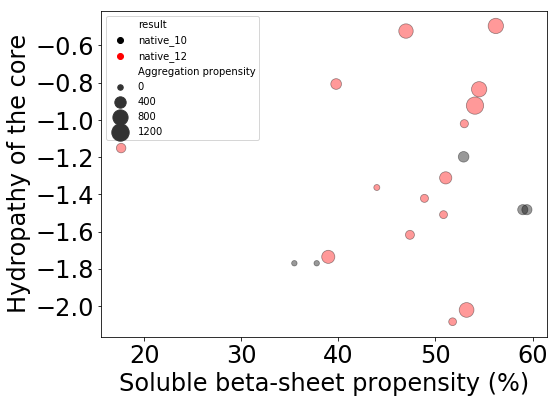

In [52]:
plt.figure(figsize=(8,6))
pl = sns.scatterplot(x=df_nat.beta_sheet,y=df_nat.hydropathy_core,hue=df_nat['result'],palette=["black","red"],edgecolor='black',alpha=0.4,s=50,size=df_nat["Aggregation propensity"],sizes=(30, 300))

#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Soluble beta-sheet propensity (%)', size=24)
plt.ylabel('Hydropathy of the core', size=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

plt.savefig('rounds_of_design.png', dpi=150)

In [23]:
pd.options.display.max_colwidth = 200
columns = ['sequence','ss', 'identity','hydropathy','hydropathy_core','hydropathy_surface','ratio_hydropathy','F','aro','beta_sheet','coil','helix',"Aggregation propensity",'result']
native = {'A': 0.09892494045990434, 'C': 0.0007037625203442372, 'D': 0.027770177581332288, 'E': 0.029719275383167428, 'F': 0.07929574855980195, 'G': 0.1453262552782189, 'H': 0.011157715202304692, 'I': 0.05289172587768166, 'K': 0.02000481398009908, 'L': 0.11207876498844926, 'M': 0.01748405604149801, 'N': 0.02587373268683085, 'P': 0.026855803431653235, 'Q': 0.021940748555100798, 'R': 0.037856030027200865, 'S': 0.04138471504904712, 'T': 0.04080177214642398, 'V': 0.09253231337129984, 'W': 0.02589065683561668, 'Y': 0.09150699202402476}
native_core = {'A': 0.07307786630111489, 'C': 0.000560694380689476, 'D': 0.0529505100746824, 'E': 0.06357016644762904, 'F': 0.03465929694164796, 'G': 0.24388319111608575, 'H': 0.014590630220483895, 'I': 0.01795479650462075, 'K': 0.036906266571925035, 'L': 0.033595549658657645, 'M': 0.022868994543972065, 'N': 0.04843456224965258, 'P': 0.010193109432870735, 'Q': 0.04258971634104471, 'R': 0.07494859428154613, 'S': 0.07878122858095064, 'T': 0.06227166114356501, 'V': 0.027519089809615437, 'W': 0.0037320237189443434, 'Y': 0.056912051680301494}
native_surf = {'A': 0.11995082543027749, 'C': 0.000820144522764552, 'D': 0.0072866686445619815, 'E': 0.0021825051749243796, 'F': 0.11560627606644364, 'G': 0.06515289471799646, 'H': 0.00836513311576485, 'I': 0.08131195842327642, 'K': 0.006255946474060585, 'L': 0.17592270521516432, 'M': 0.013103556460385826, 'N': 0.007521117442649561, 'P': 0.040410447379459216, 'Q': 0.005143380359499524, 'R': 0.0076822477075170256, 'S': 0.010963678339659189, 'T': 0.02333660709109572, 'V': 0.14541878523126028, 'W': 0.0439160963166815, 'Y': 0.11964902588655747}
aggregation = {'TMB10_163':295.722,'TMB12sol09_0':2131.34,"TMB12sol09_1":1285.71,'TMB12sol09_2':1182.36,"TMB12sol09_3":325.998,'TMB12sol09_4':576.9,'TMB12sol09_5':1389.06,'TMB12sol09_6':2337.06,'TMB12sol09_7':3117.11,'TMB12sol09_8':326.894,'TMB12sol09_9':1333.67,'TMB14v4_1':274.125,'TMB14v4_14':1218.48}

df_des = pd.DataFrame(columns=columns)

for file in glob.glob("designs_to_analyze/*.ss3_simp"):
    name = (file.split('/')[-1]).split('.')[0]
    sequence = ""
    ss = ""
    
    if "TMB10" in name:
        dround = "TMB10"
    elif "TMB12" in name:
        dround = "TMB12"
    elif "TMB14v4" in name:
        dround = "TMB14v4"
        
    with open(file, 'r') as in_f:
        lines = in_f.readlines()
        for i in range(0, len(lines)):
            line_seq = lines[1].strip()
            line_ss = lines[2].strip()
#            line_ref = lines[3].strip()
#            line_mem = lines[4].strip()
    sequence = line_seq.strip()
    ss = line_ss.strip()
#    ref_ss = line_ref.strip()
#    mem = line_mem.strip()
    print(file, len(ss))
    
    
    identity = ss_pred(ss,dround,name)
    distr = aa_distribution(sequence,dround,name)
    distr_surf = aa_distribution_surface(sequence,dround,name)
    distr_core = aa_distribution_core(sequence,dround,name)
#    outcome = results[design_name]
    
    keys = set(native.keys()) | set(distr.keys())
    
    dstr_r = numpy.corrcoef([native.get(x, 0) for x in keys],[distr.get(x, 0) for x in keys])[0, 1]
    dstr_core_r = numpy.corrcoef([native_core.get(x, 0) for x in keys],[distr_core.get(x, 0) for x in keys])[0, 1]
    dstr_surf_r = numpy.corrcoef([native_surf.get(x, 0) for x in keys],[distr_surf.get(x, 0) for x in keys])[0, 1]
    
    hydro = GRAVY(sequence)
    hydro_core = GRAVY_core(sequence,dround,name)
    hydro_surf = GRAVY_surf(sequence,dround,name)
    hydro_diff = hydro_surf-hydro_core
    
    if "TMB10" in name:
        result = 'tested_TMB10'
    elif "TMB12" in name:
        result = 'tested_TMB12'
    elif "TMB14v4" in name:
        result = 'tested_TMB14v4'
    
    F_freq = sequence.count('F')/len(ss)*100
    aro_freq = sequence.count('F')/len(ss)*100 + sequence.count('Y')/len(ss)*100 + sequence.count('W')/len(ss)*100
    beta_sheet = float(ss.count('E'))/len(ss)*100
    coil = float(ss.count('C'))/len(ss)*100
    helix = float(ss.count('H'))/len(ss)*100
    df_des.loc[name] = [sequence,ss,identity,hydro,hydro_core,hydro_surf,hydro_diff,F_freq,aro_freq,beta_sheet,coil,helix,aggregation[name],result]
#df["beta_sheet"] = df["ss"].str.count('E')/123*100
print(df_des)

('designs_to_analyze/TMB12sol09_1.ss3_simp', 179)
('designs_to_analyze/TMB12sol09_0.ss3_simp', 179)
('designs_to_analyze/TMB12sol09_6.ss3_simp', 179)
('designs_to_analyze/TMB12sol09_7.ss3_simp', 179)
('designs_to_analyze/TMB12sol09_8.ss3_simp', 179)
('designs_to_analyze/TMB12sol09_9.ss3_simp', 179)
('designs_to_analyze/TMB12sol09_2.ss3_simp', 179)
('designs_to_analyze/TMB12sol09_3.ss3_simp', 179)
('designs_to_analyze/TMB12sol09_5.ss3_simp', 179)
('designs_to_analyze/TMB12sol09_4.ss3_simp', 179)
('designs_to_analyze/TMB10_163.ss3_simp', 149)
('designs_to_analyze/TMB14v4_14.ss3_simp', 205)
('designs_to_analyze/TMB14v4_1.ss3_simp', 205)
                                                                                                                                                                                                             sequence  \
TMB12sol09_1                      QSYPGSLWGGGKAKYNTDNTFEAGGYAVYELTPNLWLKGEYMWNNSSLQKGSGGFKYKLSPYLETEVSVDYNTDNTVVVKVRVEVRYPLTPELELQPGAQYDWNNSS

In [24]:
df_all = pd.concat([df2, df_nat,df_des])
df_all

/Users/anastassiavorobieva/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


AAT per residue (AATr):  AGGRESCAN        AMYLOID  \
TMB2_33                         0.214        4.9   48599.300000   
TMB2_32                         0.146        0.8  194267.000000   
1p4t                            0.135       -4.1  131275.000000   
TMB2_44                         0.262       16.0  131201.000000   
TMB2_45                         0.258       14.7   46598.100000   
TMB0_3                          0.218        6.2   67197.600000   
TMB0_2                          0.213        3.9  110669.000000   
TMB2_70                         0.167        2.8   61439.000000   
TMB2_71                         0.253       16.1       0.575326   
TMB2_39                         0.143       -2.2     146.338000   
TMB2_38                         0.139       -1.1       0.092053   
TMB2_24                         0.205        8.1    3476.550000   
TMB2_25                         0.172        4.3   42743.500000   
TMB2_53                         0.237       10.8   53104.300000   
TMB2_52                         0.176        2.8   43341.700000   
TMB2_88                         0.219       10.1   55839.900000   
TMB2_89                         0.170        4.9    3970.210000   
TMB2_67                         0.153       -0.8   67800.600000   
TMB2_66                         0.201        7.5    1074.050000   
TMB2_10                         0.243       12.6     200.262000   
TMB2_11                         0.250       13.7   54323.400000   
TMB2_5                          0.212        7.5      46.879900   
TMB2_4                          0.186        3.9   22812.900000   
TMB2_82                         0.148       -1.2  229941.000000   
OmpT3                           0.142        0.3   42327.200000   
TMB2_83                         0.222       11.1  166961.000000   
TMB2_59                         0.182        0.9    1427.730000   
TMB2_58                         0.150        1.1   88390.600000   
TMB1_7                          0.217        8.0   54163.600000   
TMB2_23                         0.137       -5.3      15.260000   
...                               ...        ...            ...   
2x55                              NaN        NaN            NaN   
2x4m                              NaN        NaN            NaN   
2wjr                              NaN        NaN            NaN   
4fqe                              NaN        NaN            NaN   
4rl8                              NaN        NaN            NaN   
2qom                              NaN        NaN            NaN   
5o67                              NaN        NaN            NaN   
4mee                              NaN        NaN            NaN   
3aeh                              NaN        NaN            NaN   
4e1s                              NaN        NaN            NaN   
4e1t                              NaN        NaN            NaN   
1uyn                              NaN        NaN            NaN   
3slj                              NaN        NaN            NaN   
3kvn                              NaN        NaN            NaN   
3fid                              NaN        NaN            NaN   
3qq2                              NaN        NaN            NaN   
5o65                              NaN        NaN            NaN   
TMB12sol09_1                      NaN        NaN            NaN   
TMB12sol09_0                      NaN        NaN            NaN   
TMB12sol09_6                      NaN        NaN            NaN   
TMB12sol09_7                      NaN        NaN            NaN   
TMB12sol09_8                      NaN        NaN            NaN   
TMB12sol09_9                      NaN        NaN            NaN   
TMB12sol09_2                      NaN        NaN            NaN   
TMB12sol09_3                      NaN        NaN            NaN   
TMB12sol09_5                      NaN        NaN            NaN   
TMB12sol09_4                      NaN        NaN            NaN   
TMB10_163                         NaN        NaN            N

In [25]:
plt.figure(figsize=(8,6))
pl = sns.scatterplot(x=df_all.beta_sheet,y=df_all.hydropathy_core,hue=df_all['result'],palette=["lightgrey",'blue','yellow','springgreen','red',"maroon"],edgecolor='black',alpha=1,s=50,size=df_all["Aggregation propensity"],sizes=(30, 300))

#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Soluble beta-sheet propensity (%)', size=24)
plt.ylabel('Hydropathy of the core', size=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

plt.savefig('native_ss.png', dpi=150)

ValueError: The palette list has the wrong number of colors.

<Figure size 576x432 with 0 Axes>

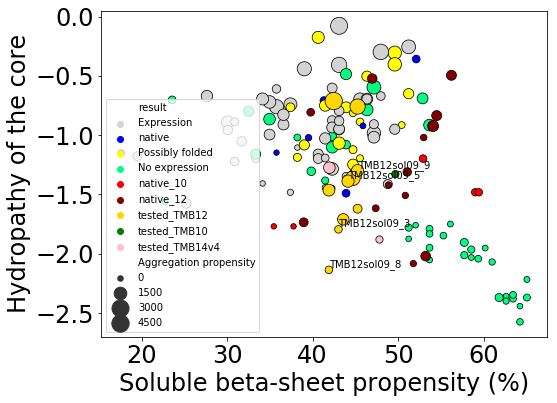

In [26]:
plt.figure(figsize=(8,6))
pl = sns.scatterplot(x=df_all.beta_sheet,y=df_all.hydropathy_core,hue=df_all['result'],palette=["lightgrey",'blue','yellow','springgreen','red',"maroon",'gold','green','pink'],edgecolor='black',alpha=1,s=50,size=df_all["Aggregation propensity"],sizes=(30, 300))

#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Soluble beta-sheet propensity (%)', size=24)
plt.ylabel('Hydropathy of the core', size=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

for line in range(0,df_all.shape[0]):
    if df_all.index[line] in ["TMB12sol09_3","TMB12sol09_5","TMB12sol09_8","TMB12sol09_9"]:
        pl.text(df_all.beta_sheet[line], df_all['hydropathy_core'][line], df_all.index[line], size=10, color='black', verticalalignment='bottom')
      

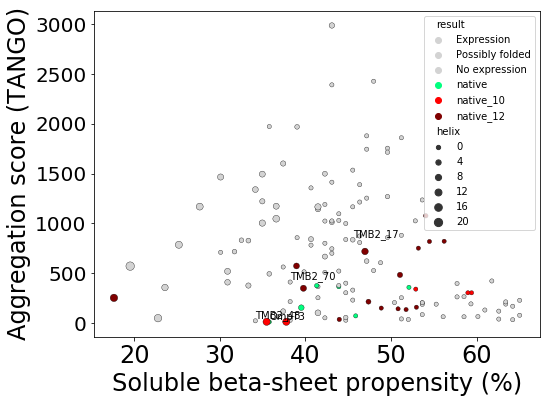

In [31]:
plt.figure(figsize=(8,6))
pl = sns.scatterplot(x=df_all.beta_sheet,y=df_all['Aggregation propensity'],hue=df_all['result'],palette=["lightgrey", "lightgrey","lightgrey","springgreen","red","maroon"],size=df_all["helix"],edgecolor='black',s=50)
#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Soluble beta-sheet propensity (%)', size=24)
plt.ylabel('Aggregation score (TANGO)', size=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=20)
for line in range(0,df_all.shape[0]):
    if df_all.index[line] in ["TMB2_17","TMB2_70","TMB2_48","OmpT3"]:
#    if df2.index[line] in ["TMB2_3","TMB2_17","TMB2_31","TMB2_35","TMB2_58","TMB2_69","TMB2_70","TMB2_73","OmpT3"]:
        pl.text(df_all.beta_sheet[line], df_all['Aggregation propensity'][line], df_all.index[line], size=10, color='black', verticalalignment='bottom')
        



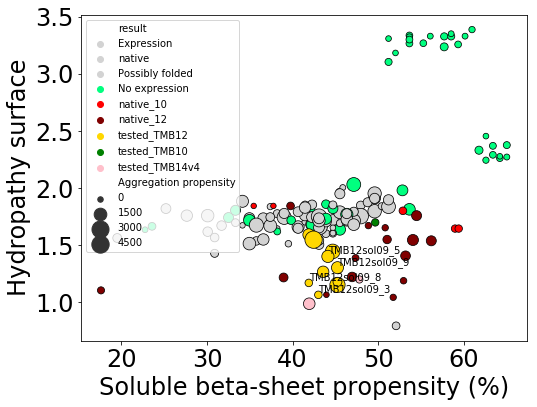

In [101]:
plt.figure(figsize=(8,6))
pl = sns.scatterplot(x=df_all.beta_sheet,y=df_all.hydropathy_surface,hue=df_all['result'],palette=["lightgrey",'lightgrey','lightgrey','springgreen','red',"maroon",'gold','green','pink'],edgecolor='black',alpha=1,s=50,size=df_all["Aggregation propensity"],sizes=(30, 300))

#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Soluble beta-sheet propensity (%)', size=24)
plt.ylabel('Hydropathy surface', size=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

for line in range(0,df_all.shape[0]):
    if df_all.index[line] in ["TMB12sol09_3","TMB12sol09_5","TMB12sol09_8","TMB12sol09_9"]:
        pl.text(df_all.beta_sheet[line], df_all['hydropathy_surface'][line], df_all.index[line], size=10, color='black', verticalalignment='bottom')
    


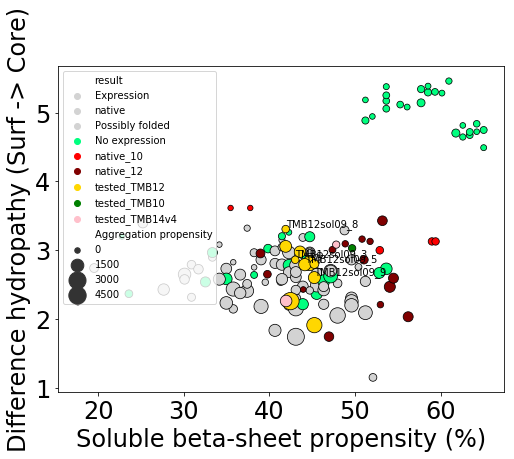

In [102]:
plt.figure(figsize=(8,6))
pl = sns.scatterplot(x=df_all.beta_sheet,y=df_all.ratio_hydropathy,hue=df_all['result'],palette=["lightgrey",'lightgrey','lightgrey','springgreen','red',"maroon",'gold','green','pink'],edgecolor='black',alpha=1,s=50,size=df_all["Aggregation propensity"],sizes=(30, 300))

#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Soluble beta-sheet propensity (%)', size=24)
plt.ylabel('Difference hydropathy (Surf -> Core)', size=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

for line in range(0,df_all.shape[0]):
    if df_all.index[line] in ["TMB12sol09_3","TMB12sol09_5","TMB12sol09_8","TMB12sol09_9"]:
        pl.text(df_all.beta_sheet[line], df_all['ratio_hydropathy'][line], df_all.index[line], size=10, color='black', verticalalignment='bottom')
    

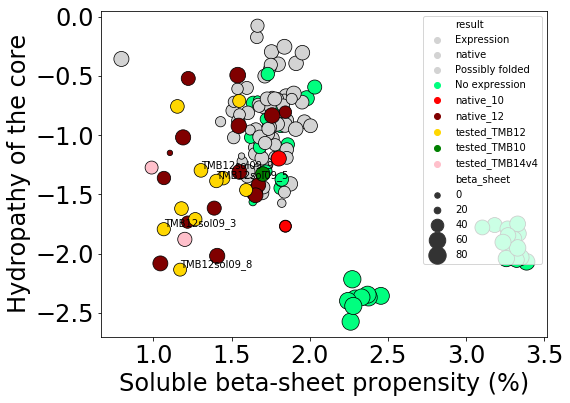

In [103]:
plt.figure(figsize=(8,6))
pl = sns.scatterplot(x=df_all.hydropathy_surface,y=df_all.hydropathy_core,hue=df_all['result'],palette=["lightgrey",'lightgrey','lightgrey','springgreen','red',"maroon",'gold','green','pink'],edgecolor='black',alpha=1,s=50,size=df_all["beta_sheet"],sizes=(30, 300))

#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Soluble beta-sheet propensity (%)', size=24)
plt.ylabel('Hydropathy of the core', size=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

for line in range(0,df_all.shape[0]):
    if df_all.index[line] in ["TMB12sol09_3","TMB12sol09_5","TMB12sol09_8","TMB12sol09_9"]:
        pl.text(df_all.hydropathy_surface[line], df_all['hydropathy_core'][line], df_all.index[line], size=10, color='black', verticalalignment='bottom')
    

In [100]:
df_all.to_pickle("sequence_properties2.pkl")

In [105]:
df_good_rounds = df_all.loc[~df_all.index.str.contains("TMB0")]
df_good_rounds = df_good_rounds.loc[~df_good_rounds.index.str.contains("TMB1_")]

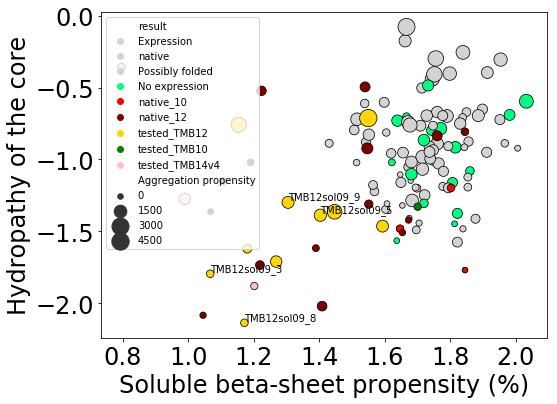

In [108]:
plt.figure(figsize=(8,6))
pl = sns.scatterplot(x=df_good_rounds.hydropathy_surface,y=df_good_rounds.hydropathy_core,hue=df_good_rounds['result'],palette=["lightgrey",'lightgrey','lightgrey','springgreen','red',"maroon",'gold','green','pink'],edgecolor='black',alpha=1,s=50,size=df_good_rounds["Aggregation propensity"],sizes=(30, 300))

#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Soluble beta-sheet propensity (%)', size=24)
plt.ylabel('Hydropathy of the core', size=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

for line in range(0,df_good_rounds.shape[0]):
    if df_good_rounds.index[line] in ["TMB12sol09_3","TMB12sol09_5","TMB12sol09_8","TMB12sol09_9"]:
        pl.text(df_good_rounds.hydropathy_surface[line], df_good_rounds['hydropathy_core'][line], df_good_rounds.index[line], size=10, color='black', verticalalignment='bottom')

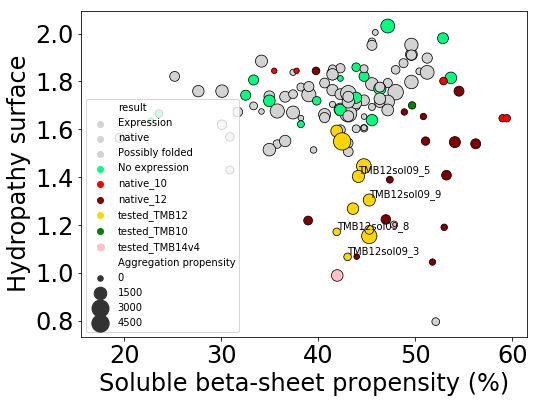

In [109]:
plt.figure(figsize=(8,6))
pl = sns.scatterplot(x=df_good_rounds.beta_sheet,y=df_good_rounds.hydropathy_surface,hue=df_good_rounds['result'],palette=["lightgrey",'lightgrey','lightgrey','springgreen','red',"maroon",'gold','green','pink'],edgecolor='black',alpha=1,s=50,size=df_good_rounds["Aggregation propensity"],sizes=(30, 300))

#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Soluble beta-sheet propensity (%)', size=24)
plt.ylabel('Hydropathy surface', size=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

for line in range(0,df_good_rounds.shape[0]):
    if df_good_rounds.index[line] in ["TMB12sol09_3","TMB12sol09_5","TMB12sol09_8","TMB12sol09_9"]:
        pl.text(df_good_rounds.beta_sheet[line],df_good_rounds['hydropathy_surface'][line], df_good_rounds.index[line], size=10, color='black', verticalalignment='bottom')
    


In [129]:
pd.options.display.max_colwidth = 200
columns = ['sequence','ss', 'identity','hydropathy','hydropathy_core','hydropathy_surface','ratio_hydropathy','F','aro','beta_sheet','coil','helix',"Aggregation propensity",'result']
native = {'A': 0.09892494045990434, 'C': 0.0007037625203442372, 'D': 0.027770177581332288, 'E': 0.029719275383167428, 'F': 0.07929574855980195, 'G': 0.1453262552782189, 'H': 0.011157715202304692, 'I': 0.05289172587768166, 'K': 0.02000481398009908, 'L': 0.11207876498844926, 'M': 0.01748405604149801, 'N': 0.02587373268683085, 'P': 0.026855803431653235, 'Q': 0.021940748555100798, 'R': 0.037856030027200865, 'S': 0.04138471504904712, 'T': 0.04080177214642398, 'V': 0.09253231337129984, 'W': 0.02589065683561668, 'Y': 0.09150699202402476}
native_core = {'A': 0.07307786630111489, 'C': 0.000560694380689476, 'D': 0.0529505100746824, 'E': 0.06357016644762904, 'F': 0.03465929694164796, 'G': 0.24388319111608575, 'H': 0.014590630220483895, 'I': 0.01795479650462075, 'K': 0.036906266571925035, 'L': 0.033595549658657645, 'M': 0.022868994543972065, 'N': 0.04843456224965258, 'P': 0.010193109432870735, 'Q': 0.04258971634104471, 'R': 0.07494859428154613, 'S': 0.07878122858095064, 'T': 0.06227166114356501, 'V': 0.027519089809615437, 'W': 0.0037320237189443434, 'Y': 0.056912051680301494}
native_surf = {'A': 0.11995082543027749, 'C': 0.000820144522764552, 'D': 0.0072866686445619815, 'E': 0.0021825051749243796, 'F': 0.11560627606644364, 'G': 0.06515289471799646, 'H': 0.00836513311576485, 'I': 0.08131195842327642, 'K': 0.006255946474060585, 'L': 0.17592270521516432, 'M': 0.013103556460385826, 'N': 0.007521117442649561, 'P': 0.040410447379459216, 'Q': 0.005143380359499524, 'R': 0.0076822477075170256, 'S': 0.010963678339659189, 'T': 0.02333660709109572, 'V': 0.14541878523126028, 'W': 0.0439160963166815, 'Y': 0.11964902588655747}
#aggregation = {'84_input_0005_0002_12_0010_0008_0009_0008_0009':3153.62,'28_input_0098_0005_9_0007_0008_0005_0001_0010':1330.49,"49_input_0010_0005_5_0006_0010_0010_0008_0003":3148.84,'57_input_0005_0004_7_0007_0001_0009_0003_0004':3018.41,"27_input_0069_0002_8_0009_0006_0009_0001_0004":3296.32,'84_input_0005_0004_16_0007_0002_0005_0007_0010':2356.25,'41_input_0049_0005_6_0009_0004_0003_0007_0010':1990.33,'98_input_0009_0001_14_0002_0007_0004_0009_0008':2242.38,'64_input_0078_0005_14_0004_0010_0004_0001_0002':1252.26,'84_input_0005_0002_12_0010_0008_0001_0004_0001':1095.57,'84_input_0005_0002_12_0010_0008_0005_0004_0008':2691.11,'101_input_0076_0003_14_0003_0004_0002_0007_0001':2033.49,'39_input_0084_0003_9_0008_0006_0010_0003_0006':1834.96}

df_des2 = pd.DataFrame(columns=columns)

for file in glob.glob("TMB14/*.ss3_simp"):
    name = (file.split('/')[-1]).split('.')[0]
    sequence = ""
    ss = ""
    dround = "TMB14"
    aggregation=400
    result = 'TMB14'
        
    with open(file, 'r') as in_f:
        lines = in_f.readlines()
        for i in range(0, len(lines)):
            line_seq = lines[1].strip()
            line_ss = lines[2].strip()
#            line_ref = lines[3].strip()
#            line_mem = lines[4].strip()
    sequence = line_seq.strip()
    ss = line_ss.strip()
#    ref_ss = line_ref.strip()
#    mem = line_mem.strip()
    print(file, len(ss))
    
    identity = ss_pred(ss,dround,name)
    distr = aa_distribution(sequence,dround,name)
    distr_surf = aa_distribution_surface(sequence,dround,name)
    distr_core = aa_distribution_core(sequence,dround,name)
#    outcome = results[design_name]
    
    keys = set(native.keys()) | set(distr.keys())
    
    dstr_r = numpy.corrcoef([native.get(x, 0) for x in keys],[distr.get(x, 0) for x in keys])[0, 1]
    dstr_core_r = numpy.corrcoef([native_core.get(x, 0) for x in keys],[distr_core.get(x, 0) for x in keys])[0, 1]
    dstr_surf_r = numpy.corrcoef([native_surf.get(x, 0) for x in keys],[distr_surf.get(x, 0) for x in keys])[0, 1]
    
    hydro = GRAVY(sequence)
    hydro_core = GRAVY_core(sequence,dround,name)
    hydro_surf = GRAVY_surf(sequence,dround,name)
    hydro_diff = hydro_surf-hydro_core
    
    F_freq = sequence.count('F')/len(ss)*100
    aro_freq = sequence.count('F')/len(ss)*100 + sequence.count('Y')/len(ss)*100 + sequence.count('W')/len(ss)*100
    beta_sheet = float(ss.count('E'))/len(ss)*100
    coil = float(ss.count('C'))/len(ss)*100
    helix = float(ss.count('H'))/len(ss)*100
    df_des2.loc[name] = [sequence,ss,identity,hydro,hydro_core,hydro_surf,hydro_diff,F_freq,aro_freq,beta_sheet,coil,helix,aggregation,result]
#df["beta_sheet"] = df["ss"].str.count('E')/123*100
print(df_des2)

('TMB14/100_input_0036_0002_23_0009_0009_0010_0007_0002.ss3_simp', 207)
('TMB14/84_input_0005_0002_12_0010_0008_0009_0008_0009.ss3_simp', 207)
('TMB14/5_input_0026_0002_5_0008_0010_0009_0008_0006.ss3_simp', 207)
('TMB14/33_input_0051_0003_9_0004_0010_0006_0009_0001.ss3_simp', 207)
('TMB14/30_input_0093_0005_6_0009_0010_0007_0003_0010.ss3_simp', 207)
('TMB14/64_input_0025_0002_14_0005_0008_0004_0007_0008.ss3_simp', 207)
('TMB14/78_input_0091_0003_4_0005_0004_0001_0010_0003.ss3_simp', 207)
('TMB14/36_input_0043_0002_9_0010_0006_0006_0009_0008.ss3_simp', 207)
('TMB14/105_input_0087_0005_11_0009_0008_0002_0007_0003.ss3_simp', 207)
('TMB14/102_input_0027_0003_5_0001_0009_0004_0010_0002.ss3_simp', 207)
('TMB14/28_input_0098_0005_9_0007_0008_0006_0007_0009.ss3_simp', 207)
('TMB14/95_input_0066_0002_4_0010_0005_0007_0001_0007.ss3_simp', 207)
('TMB14/65_input_0031_0002_8_0004_0004_0006_0006_0005.ss3_simp', 207)
('TMB14/28_input_0098_0005_9_0007_0008_0005_0001_0010.ss3_simp', 207)
('TMB14/100_in

In [83]:
pd.options.display.max_colwidth = 200
columns = ['sequence','ss', 'identity','hydropathy','hydropathy_core','hydropathy_surface','ratio_hydropathy','F','aro','beta_sheet','coil','helix',"Aggregation propensity",'result']
native = {'A': 0.09892494045990434, 'C': 0.0007037625203442372, 'D': 0.027770177581332288, 'E': 0.029719275383167428, 'F': 0.07929574855980195, 'G': 0.1453262552782189, 'H': 0.011157715202304692, 'I': 0.05289172587768166, 'K': 0.02000481398009908, 'L': 0.11207876498844926, 'M': 0.01748405604149801, 'N': 0.02587373268683085, 'P': 0.026855803431653235, 'Q': 0.021940748555100798, 'R': 0.037856030027200865, 'S': 0.04138471504904712, 'T': 0.04080177214642398, 'V': 0.09253231337129984, 'W': 0.02589065683561668, 'Y': 0.09150699202402476}
native_core = {'A': 0.07307786630111489, 'C': 0.000560694380689476, 'D': 0.0529505100746824, 'E': 0.06357016644762904, 'F': 0.03465929694164796, 'G': 0.24388319111608575, 'H': 0.014590630220483895, 'I': 0.01795479650462075, 'K': 0.036906266571925035, 'L': 0.033595549658657645, 'M': 0.022868994543972065, 'N': 0.04843456224965258, 'P': 0.010193109432870735, 'Q': 0.04258971634104471, 'R': 0.07494859428154613, 'S': 0.07878122858095064, 'T': 0.06227166114356501, 'V': 0.027519089809615437, 'W': 0.0037320237189443434, 'Y': 0.056912051680301494}
native_surf = {'A': 0.11995082543027749, 'C': 0.000820144522764552, 'D': 0.0072866686445619815, 'E': 0.0021825051749243796, 'F': 0.11560627606644364, 'G': 0.06515289471799646, 'H': 0.00836513311576485, 'I': 0.08131195842327642, 'K': 0.006255946474060585, 'L': 0.17592270521516432, 'M': 0.013103556460385826, 'N': 0.007521117442649561, 'P': 0.040410447379459216, 'Q': 0.005143380359499524, 'R': 0.0076822477075170256, 'S': 0.010963678339659189, 'T': 0.02333660709109572, 'V': 0.14541878523126028, 'W': 0.0439160963166815, 'Y': 0.11964902588655747}
aggregation_list = {'100_input_0091_0001_2_0005_0010_0005_0005_0009_0003':962.536,'12_input_0022_0004_2_0005_0004_0008_0002_0010_0001':668.918,"12_input_0022_0004_2_0008_0010_0001_0004_0002_0008":781.374,'16_input_0036_0005_2_0001_0006_0007_0006_0005_0002':1643.43,"32_input_0052_0001_3_0004_0009_0005_0002_0004_0002":2296.66,'41_input_0022_0001_1_0008_0005_0008_0008_0005_0007':303.51,'44_input_0063_0001_1_0001_0008_0007_0008_0009_0002':1484.45,'45_input_0084_0003_3_0003_0010_0008_0008_0010_0004':1211.92,'56_input_0041_0001_3_0008_0004_0006_0005_0009_0008':737.766,'62_input_0032_0005_2_0005_0010_0003_0001_0002_0009':466.551,'65_input_0067_0002_1_0002_0006_0003_0009_0001_0009':940.224,'7_input_0021_0001_1_0006_0003_0008_0005_0009_0006':690.64,'7_input_0021_0001_1_0006_0003_0010_0010_0010_0009':259.499,'81_input_0094_0004_1_0006_0006_0004_0008_0002_0001':1796.85}

df_12_12 = pd.DataFrame(columns=columns)

for file in glob.glob("TMB12_12/*.ss3_simp"):
    name = (file.split('/')[-1]).split('.')[0]
    sequence = ""
    ss = ""
    dround = "TMB12_12"
    if name in aggregation_list: 
        aggregation=aggregation_list[name]
    else:
        aggregation = 5.0
    result = 'TMB12_12'
        
    with open(file, 'r') as in_f:
        lines = in_f.readlines()
        for i in range(0, len(lines)):
            line_seq = lines[1].strip()
            line_ss = lines[2].strip()
#            line_ref = lines[3].strip()
#            line_mem = lines[4].strip()
    sequence = line_seq.strip()
    ss = line_ss.strip()
#    ref_ss = line_ref.strip()
#    mem = line_mem.strip()
    print(file, len(ss))
    
    identity = ss_pred(ss,dround,name)
    distr = aa_distribution(sequence,dround,name)
    distr_surf = aa_distribution_surface(sequence,dround,name)
    distr_core = aa_distribution_core(sequence,dround,name)
#    outcome = results[design_name]
    
    keys = set(native.keys()) | set(distr.keys())
    
    dstr_r = numpy.corrcoef([native.get(x, 0) for x in keys],[distr.get(x, 0) for x in keys])[0, 1]
    dstr_core_r = numpy.corrcoef([native_core.get(x, 0) for x in keys],[distr_core.get(x, 0) for x in keys])[0, 1]
    dstr_surf_r = numpy.corrcoef([native_surf.get(x, 0) for x in keys],[distr_surf.get(x, 0) for x in keys])[0, 1]
    
    hydro = GRAVY(sequence)
    hydro_core = GRAVY_core(sequence,dround,name)
    hydro_surf = GRAVY_surf(sequence,dround,name)
    hydro_diff = hydro_surf-hydro_core
    
    F_freq = sequence.count('F')/len(ss)*100
    aro_freq = sequence.count('F')/len(ss)*100 + sequence.count('Y')/len(ss)*100 + sequence.count('W')/len(ss)*100
    beta_sheet = float(ss.count('E'))/len(ss)*100
    coil = float(ss.count('C'))/len(ss)*100
    helix = float(ss.count('H'))/len(ss)*100
    df_12_12.loc[name] = [sequence,ss,identity,hydro,hydro_core,hydro_surf,hydro_diff,F_freq,aro_freq,beta_sheet,coil,helix,aggregation,result]
#df["beta_sheet"] = df["ss"].str.count('E')/123*100
print(df_12_12)

('TMB12_12/41_input_0022_0001_1_0008_0005_0008_0008_0005_0007.ss3_simp', 173)
('TMB12_12/81_input_0094_0004_1_0002_0006_0004_0001_0010_0010.ss3_simp', 173)
('TMB12_12/12_input_0022_0004_2_0008_0010_0001_0004_0002_0008.ss3_simp', 173)
('TMB12_12/18_input_0066_0002_2_0010_0004_0002_0001_0009_0005.ss3_simp', 173)
('TMB12_12/56_input_0041_0001_3_0008_0004_0006_0005_0009_0008.ss3_simp', 173)
('TMB12_12/62_input_0032_0003_1_0005_0007_0003_0004_0006_0008.ss3_simp', 173)
('TMB12_12/81_input_0094_0004_1_0002_0006_0004_0010_0003_0009.ss3_simp', 173)
('TMB12_12/99_input_0087_0004_1_0002_0003_0001_0005_0008_0003.ss3_simp', 173)
('TMB12_12/103_input_0036_0004_1_0008_0010_0003_0010_0009_0009.ss3_simp', 173)
('TMB12_12/23_input_0058_0004_1_0008_0001_0007_0006_0001_0003.ss3_simp', 173)
('TMB12_12/108_input_0031_0004_1_0004_0006_0002_0003_0009_0008.ss3_simp', 173)
('TMB12_12/18_input_0066_0002_2_0007_0010_0008_0001_0006_0004.ss3_simp', 173)
('TMB12_12/100_input_0091_0001_2_0005_0010_0005_0005_0009_0003

In [84]:
df_12_12_all = pd.concat([df_all,df_12_12])

/Users/anastassiavorobieva/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


(array([-3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ]),
 <a list of 9 Text yticklabel objects>)

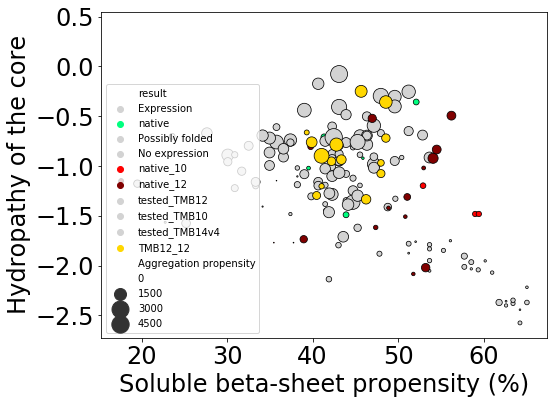

In [86]:
plt.figure(figsize=(8,6))
pl = sns.scatterplot(x=df_12_12_all.beta_sheet,y=df_12_12_all.hydropathy_core,hue=df_12_12_all['result'],palette=["lightgrey",'springgreen','lightgrey','lightgrey','red',"maroon",'lightgrey','lightgrey','lightgrey','gold'],edgecolor='black',alpha=1,s=50,size=df_12_12_all["Aggregation propensity"],sizes=(0, 300))

#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Soluble beta-sheet propensity (%)', size=24)
plt.ylabel('Hydropathy of the core', size=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)


(array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ]),
 <a list of 8 Text yticklabel objects>)

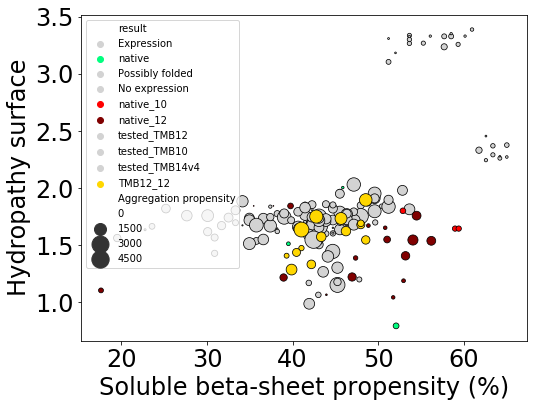

In [87]:
plt.figure(figsize=(8,6))
pl = sns.scatterplot(x=df_12_12_all.beta_sheet,y=df_12_12_all.hydropathy_surface,hue=df_12_12_all['result'],palette=["lightgrey",'springgreen','lightgrey','lightgrey','red',"maroon",'lightgrey','lightgrey','lightgrey','gold'],edgecolor='black',alpha=1,s=50,size=df_12_12_all["Aggregation propensity"],sizes=(0, 300))

#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Soluble beta-sheet propensity (%)', size=24)
plt.ylabel('Hydropathy surface', size=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

(array([-3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ]),
 <a list of 9 Text yticklabel objects>)

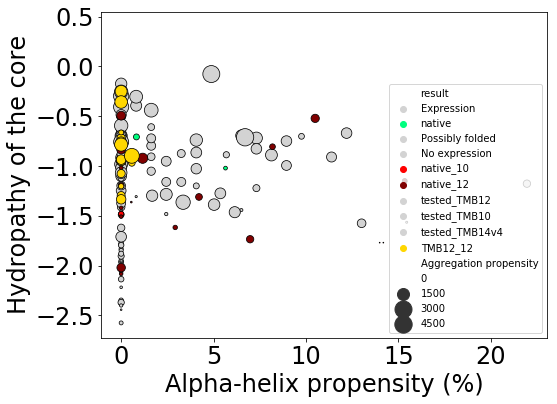

In [99]:
plt.figure(figsize=(8,6))
pl = sns.scatterplot(x=df_12_12_all.helix,y=df_12_12_all.hydropathy_core,hue=df_12_12_all['result'],palette=["lightgrey",'springgreen','lightgrey','lightgrey','red',"maroon",'lightgrey','lightgrey','lightgrey','gold'],edgecolor='black',alpha=1,s=50,size=df_12_12_all["Aggregation propensity"],sizes=(0, 300))

#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Alpha-helix propensity (%)', size=24)
plt.ylabel('Hydropathy of the core', size=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)


In [34]:
pd.options.display.max_colwidth = 200
columns = ['sequence','ss', 'identity','hydropathy','hydropathy_core','hydropathy_surface','ratio_hydropathy','F','aro','beta_sheet','coil','helix',"Aggregation propensity",'result']
native = {'A': 0.09892494045990434, 'C': 0.0007037625203442372, 'D': 0.027770177581332288, 'E': 0.029719275383167428, 'F': 0.07929574855980195, 'G': 0.1453262552782189, 'H': 0.011157715202304692, 'I': 0.05289172587768166, 'K': 0.02000481398009908, 'L': 0.11207876498844926, 'M': 0.01748405604149801, 'N': 0.02587373268683085, 'P': 0.026855803431653235, 'Q': 0.021940748555100798, 'R': 0.037856030027200865, 'S': 0.04138471504904712, 'T': 0.04080177214642398, 'V': 0.09253231337129984, 'W': 0.02589065683561668, 'Y': 0.09150699202402476}
native_core = {'A': 0.07307786630111489, 'C': 0.000560694380689476, 'D': 0.0529505100746824, 'E': 0.06357016644762904, 'F': 0.03465929694164796, 'G': 0.24388319111608575, 'H': 0.014590630220483895, 'I': 0.01795479650462075, 'K': 0.036906266571925035, 'L': 0.033595549658657645, 'M': 0.022868994543972065, 'N': 0.04843456224965258, 'P': 0.010193109432870735, 'Q': 0.04258971634104471, 'R': 0.07494859428154613, 'S': 0.07878122858095064, 'T': 0.06227166114356501, 'V': 0.027519089809615437, 'W': 0.0037320237189443434, 'Y': 0.056912051680301494}
native_surf = {'A': 0.11995082543027749, 'C': 0.000820144522764552, 'D': 0.0072866686445619815, 'E': 0.0021825051749243796, 'F': 0.11560627606644364, 'G': 0.06515289471799646, 'H': 0.00836513311576485, 'I': 0.08131195842327642, 'K': 0.006255946474060585, 'L': 0.17592270521516432, 'M': 0.013103556460385826, 'N': 0.007521117442649561, 'P': 0.040410447379459216, 'Q': 0.005143380359499524, 'R': 0.0076822477075170256, 'S': 0.010963678339659189, 'T': 0.02333660709109572, 'V': 0.14541878523126028, 'W': 0.0439160963166815, 'Y': 0.11964902588655747}
#aggregation = {'84_input_0005_0002_12_0010_0008_0009_0008_0009':3153.62,'28_input_0098_0005_9_0007_0008_0005_0001_0010':1330.49,"49_input_0010_0005_5_0006_0010_0010_0008_0003":3148.84,'57_input_0005_0004_7_0007_0001_0009_0003_0004':3018.41,"27_input_0069_0002_8_0009_0006_0009_0001_0004":3296.32,'84_input_0005_0004_16_0007_0002_0005_0007_0010':2356.25,'41_input_0049_0005_6_0009_0004_0003_0007_0010':1990.33,'98_input_0009_0001_14_0002_0007_0004_0009_0008':2242.38,'64_input_0078_0005_14_0004_0010_0004_0001_0002':1252.26,'84_input_0005_0002_12_0010_0008_0001_0004_0001':1095.57,'84_input_0005_0002_12_0010_0008_0005_0004_0008':2691.11,'101_input_0076_0003_14_0003_0004_0002_0007_0001':2033.49,'39_input_0084_0003_9_0008_0006_0010_0003_0006':1834.96}

df_12_14 = pd.DataFrame(columns=columns)

for file in glob.glob("TMB12_14/*.ss3_simp"):
    name = (file.split('/')[-1]).split('.')[0]
    sequence = ""
    ss = ""
    dround = "TMB12_14"
    aggregation=400
    result = 'TMB12_14'
        
    with open(file, 'r') as in_f:
        lines = in_f.readlines()
        for i in range(0, len(lines)):
            line_seq = lines[1].strip()
            line_ss = lines[2].strip()
#            line_ref = lines[3].strip()
#            line_mem = lines[4].strip()
    sequence = line_seq.strip()
    ss = line_ss.strip()
#    ref_ss = line_ref.strip()
#    mem = line_mem.strip()
    print(file, len(ss))
    
    identity = ss_pred(ss,dround,name)
    distr = aa_distribution(sequence,dround,name)
    distr_surf = aa_distribution_surface(sequence,dround,name)
    distr_core = aa_distribution_core(sequence,dround,name)
#    outcome = results[design_name]
    
    keys = set(native.keys()) | set(distr.keys())
    
    dstr_r = numpy.corrcoef([native.get(x, 0) for x in keys],[distr.get(x, 0) for x in keys])[0, 1]
    dstr_core_r = numpy.corrcoef([native_core.get(x, 0) for x in keys],[distr_core.get(x, 0) for x in keys])[0, 1]
    dstr_surf_r = numpy.corrcoef([native_surf.get(x, 0) for x in keys],[distr_surf.get(x, 0) for x in keys])[0, 1]
    
    hydro = GRAVY(sequence)
    hydro_core = GRAVY_core(sequence,dround,name)
    hydro_surf = GRAVY_surf(sequence,dround,name)
    hydro_diff = hydro_surf-hydro_core
    
    F_freq = sequence.count('F')/len(ss)*100
    aro_freq = sequence.count('F')/len(ss)*100 + sequence.count('Y')/len(ss)*100 + sequence.count('W')/len(ss)*100
    beta_sheet = float(ss.count('E'))/len(ss)*100
    coil = float(ss.count('C'))/len(ss)*100
    helix = float(ss.count('H'))/len(ss)*100
    df_12_14.loc[name] = [sequence,ss,identity,hydro,hydro_core,hydro_surf,hydro_diff,F_freq,aro_freq,beta_sheet,coil,helix,aggregation,result]
#df["beta_sheet"] = df["ss"].str.count('E')/123*100
print(df_12_14)

('TMB12_14/24_input_0022_0002_8_0009_0004_0006_0007_0010.ss3_simp', 179)
('TMB12_14/64_input_0076_0003_17_0005_0009_0005_0009_0005.ss3_simp', 179)
('TMB12_14/20_input_0076_0005_54_0009_0003_0005_0010_0007.ss3_simp', 179)
('TMB12_14/15_input_0083_0005_16_0006_0008_0005_0002_0004.ss3_simp', 179)
('TMB12_14/28_input_0040_0004_27_0004_0005_0006_0007_0002.ss3_simp', 179)
('TMB12_14/57_input_0015_0001_14_0006_0009_0007_0004_0002.ss3_simp', 179)
('TMB12_14/54_input_0059_0004_30_0006_0004_0003_0002_0006.ss3_simp', 179)
('TMB12_14/73_input_0097_0002_21_0009_0005_0003_0007_0002.ss3_simp', 179)
('TMB12_14/19_input_0009_0001_41_0006_0009_0006_0003_0008.ss3_simp', 179)
('TMB12_14/2_input_0058_0004_114_0006_0003_0003_0010_0001.ss3_simp', 179)
('TMB12_14/15_input_0010_0003_14_0002_0001_0010_0004_0005.ss3_simp', 179)
('TMB12_14/36_input_0003_0002_26_0004_0002_0004_0009_0004.ss3_simp', 179)
('TMB12_14/15_input_0028_0005_11_0002_0010_0008_0008_0010.ss3_simp', 179)
('TMB12_14/87_input_0044_0005_26_0006_0

In [35]:
df_12_14_all = pd.concat([df_all,df_12_14])

/Users/anastassiavorobieva/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


(array([-3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ]),
 <a list of 9 Text yticklabel objects>)

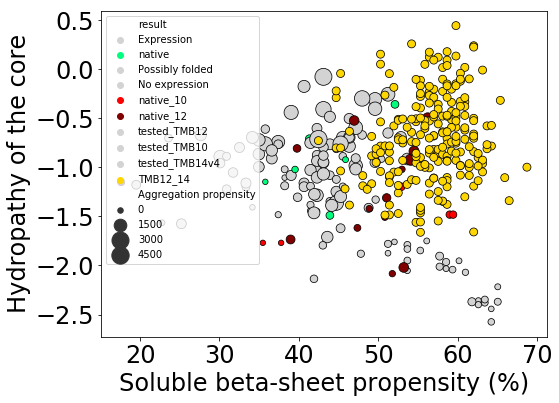

In [36]:
plt.figure(figsize=(8,6))
pl = sns.scatterplot(x=df_12_14_all.beta_sheet,y=df_12_14_all.hydropathy_core,hue=df_12_14_all['result'],palette=["lightgrey",'springgreen','lightgrey','lightgrey','red',"maroon",'lightgrey','lightgrey','lightgrey','gold'],edgecolor='black',alpha=1,s=50,size=df_12_14_all["Aggregation propensity"],sizes=(30, 300))

#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Soluble beta-sheet propensity (%)', size=24)
plt.ylabel('Hydropathy of the core', size=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

(array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ]),
 <a list of 8 Text yticklabel objects>)

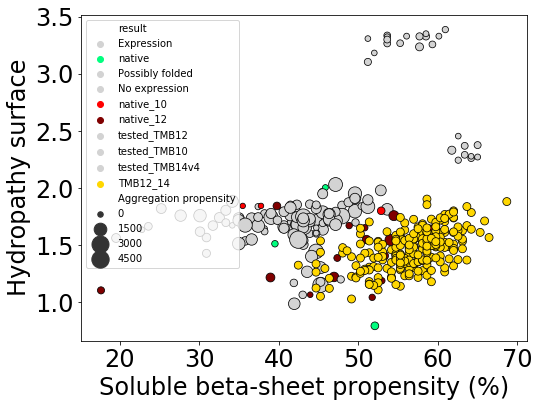

In [37]:
plt.figure(figsize=(8,6))
pl = sns.scatterplot(x=df_12_14_all.beta_sheet,y=df_12_14_all.hydropathy_surface,hue=df_12_14_all['result'],palette=["lightgrey",'springgreen','lightgrey','lightgrey','red',"maroon",'lightgrey','lightgrey','lightgrey','gold'],edgecolor='black',alpha=1,s=50,size=df_12_14_all["Aggregation propensity"],sizes=(30, 300))

#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Soluble beta-sheet propensity (%)', size=24)
plt.ylabel('Hydropathy surface', size=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

(array([-3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ]),
 <a list of 9 Text yticklabel objects>)

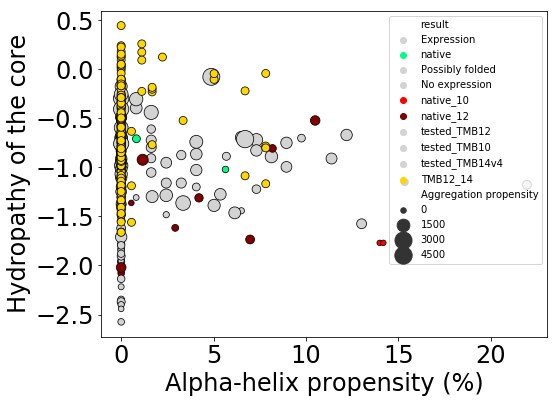

In [100]:
plt.figure(figsize=(8,6))
pl = sns.scatterplot(x=df_12_14_all.helix,y=df_12_14_all.hydropathy_core,hue=df_12_14_all['result'],palette=["lightgrey",'springgreen','lightgrey','lightgrey','red',"maroon",'lightgrey','lightgrey','lightgrey','gold'],edgecolor='black',alpha=1,s=50,size=df_12_14_all["Aggregation propensity"],sizes=(30, 300))

#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Alpha-helix propensity (%)', size=24)
plt.ylabel('Hydropathy of the core', size=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

In [13]:
pd.options.display.max_colwidth = 200
columns = ['sequence','ss', 'identity','hydropathy','hydropathy_core','hydropathy_surface','ratio_hydropathy','F','aro','beta_sheet','coil','helix',"Aggregation propensity",'result']
native = {'A': 0.09892494045990434, 'C': 0.0007037625203442372, 'D': 0.027770177581332288, 'E': 0.029719275383167428, 'F': 0.07929574855980195, 'G': 0.1453262552782189, 'H': 0.011157715202304692, 'I': 0.05289172587768166, 'K': 0.02000481398009908, 'L': 0.11207876498844926, 'M': 0.01748405604149801, 'N': 0.02587373268683085, 'P': 0.026855803431653235, 'Q': 0.021940748555100798, 'R': 0.037856030027200865, 'S': 0.04138471504904712, 'T': 0.04080177214642398, 'V': 0.09253231337129984, 'W': 0.02589065683561668, 'Y': 0.09150699202402476}
native_core = {'A': 0.07307786630111489, 'C': 0.000560694380689476, 'D': 0.0529505100746824, 'E': 0.06357016644762904, 'F': 0.03465929694164796, 'G': 0.24388319111608575, 'H': 0.014590630220483895, 'I': 0.01795479650462075, 'K': 0.036906266571925035, 'L': 0.033595549658657645, 'M': 0.022868994543972065, 'N': 0.04843456224965258, 'P': 0.010193109432870735, 'Q': 0.04258971634104471, 'R': 0.07494859428154613, 'S': 0.07878122858095064, 'T': 0.06227166114356501, 'V': 0.027519089809615437, 'W': 0.0037320237189443434, 'Y': 0.056912051680301494}
native_surf = {'A': 0.11995082543027749, 'C': 0.000820144522764552, 'D': 0.0072866686445619815, 'E': 0.0021825051749243796, 'F': 0.11560627606644364, 'G': 0.06515289471799646, 'H': 0.00836513311576485, 'I': 0.08131195842327642, 'K': 0.006255946474060585, 'L': 0.17592270521516432, 'M': 0.013103556460385826, 'N': 0.007521117442649561, 'P': 0.040410447379459216, 'Q': 0.005143380359499524, 'R': 0.0076822477075170256, 'S': 0.010963678339659189, 'T': 0.02333660709109572, 'V': 0.14541878523126028, 'W': 0.0439160963166815, 'Y': 0.11964902588655747}
#aggregation_list = {'48_input_0076_0005_8_0002_0008_0003_0004_0010':2147.84,'82_input_0023_0005_8_0008_0001_0003_0004_0003':1781.06,"6_input_0023_0003_9_0001_0002_0003_0006_0004":2893.26,'6_input_0073_0001_9_0003_0006_0004_0006_0009':3430.78,"12_input_0082_0001_10_0002_0003_0005_0004_0005":1885.31,'13_input_0015_0003_7_0009_0001_0008_0008_0006':2833.82,'72_input_0005_0003_17_0009_0003_0003_0010_0006':1233.12,'75_input_0094_0002_9_0007_0010_0003_0007_0002':3059.95,'95_input_0051_0002_22_0009_0008_0008_0002_0006':185.35}

agg = pd.read_csv("round3_surf_selection/tango_aggregation.txt", header=0, sep="\s+")
agg_index = pd.read_csv("round3_surf_selection/tango_index.txt", header=None, names=["description", "Sequence"], sep="\s+")
daggregation = pd.merge(agg, agg_index, on="Sequence")
aggregation_list=daggregation[["Aggregation","description"]].set_index('description').to_dict()

df_12_16 = pd.DataFrame(columns=columns)

for file in glob.glob("round3_surf_selection/*_input_*/*.ss3_simp"):
    name = (file.split('/')[-1]).split('.')[0]
    sequence = ""
    ss = ""
    dround = "TMB12_16"
    if name in aggregation_list["Aggregation"]: 
        aggregation=aggregation_list["Aggregation"][name]
    else:
        aggregation = 50.0
    result = 'TMB12_16'
        
    with open(file, 'r') as in_f:
        lines = in_f.readlines()
        for i in range(0, len(lines)):
            line_seq = lines[1].strip()
            line_ss = lines[2].strip()
#            line_ref = lines[3].strip()
#            line_mem = lines[4].strip()
    sequence = line_seq.strip()
    ss = line_ss.strip()
#    ref_ss = line_ref.strip()
#    mem = line_mem.strip()
    print(file, len(ss))
    
    identity = ss_pred(ss,dround,name)
    distr = aa_distribution(sequence,dround,name)
    distr_surf = aa_distribution_surface(sequence,dround,name)
    distr_core = aa_distribution_core(sequence,dround,name)
#    outcome = results[design_name]
    
    keys = set(native.keys()) | set(distr.keys())
    
    dstr_r = numpy.corrcoef([native.get(x, 0) for x in keys],[distr.get(x, 0) for x in keys])[0, 1]
    dstr_core_r = numpy.corrcoef([native_core.get(x, 0) for x in keys],[distr_core.get(x, 0) for x in keys])[0, 1]
    dstr_surf_r = numpy.corrcoef([native_surf.get(x, 0) for x in keys],[distr_surf.get(x, 0) for x in keys])[0, 1]
    
    hydro = GRAVY(sequence)
    hydro_core = GRAVY_core(sequence,dround,name)
    hydro_surf = GRAVY_surf(sequence,dround,name)
    hydro_diff = hydro_surf-hydro_core
    
    F_freq = sequence.count('F')/len(ss)*100
    aro_freq = sequence.count('F')/len(ss)*100 + sequence.count('Y')/len(ss)*100 + sequence.count('W')/len(ss)*100
    beta_sheet = float(ss.count('E'))/len(ss)*100
    coil = float(ss.count('C'))/len(ss)*100
    helix = float(ss.count('H'))/len(ss)*100
    df_12_16.loc[name] = [sequence,ss,identity,hydro,hydro_core,hydro_surf,hydro_diff,F_freq,aro_freq,beta_sheet,coil,helix,aggregation,result]
#df["beta_sheet"] = df["ss"].str.count('E')/123*100
print(df_12_16)

round3_surf_selection/99_input_0047_0003_20_0003_0009_0008_0006/99_input_0047_0003_20_0003_0009_0008_0006.ss3_simp 185
round3_surf_selection/55_input_0071_0004_7_0009_0003_0008_0010/55_input_0071_0004_7_0009_0003_0008_0010.ss3_simp 185
round3_surf_selection/81_input_0049_0002_10_0010_0010_0003_0005/81_input_0049_0002_10_0010_0010_0003_0005.ss3_simp 185
round3_surf_selection/14_input_0021_0001_17_0007_0009_0006_0008/14_input_0021_0001_17_0007_0009_0006_0008.ss3_simp 185
round3_surf_selection/6_input_0091_0003_11_0008_0004_0010_0007/6_input_0091_0003_11_0008_0004_0010_0007.ss3_simp 185
round3_surf_selection/56_input_0045_0004_10_0001_0010_0008_0002/56_input_0045_0004_10_0001_0010_0008_0002.ss3_simp 185
round3_surf_selection/12_input_0082_0003_6_0003_0005_0007_0005/12_input_0082_0003_6_0003_0005_0007_0005.ss3_simp 185
round3_surf_selection/70_input_0005_0001_14_0002_0009_0006_0010/70_input_0005_0001_14_0002_0009_0006_0010.ss3_simp 185
round3_surf_selection/22_input_0063_0001_9_0007_0002_0

In [31]:
df_12_16_all = df_12_16.loc[(df_12_16["beta_sheet"]<50.0)&(df_12_16["Aggregation propensity"]<6000)&(df_12_16["helix"]==0.0)&(df_12_16["beta_sheet"]>35.0)]
df_12_16_all.shape

(134, 14)

(array([-2.2, -2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8, -0.6]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

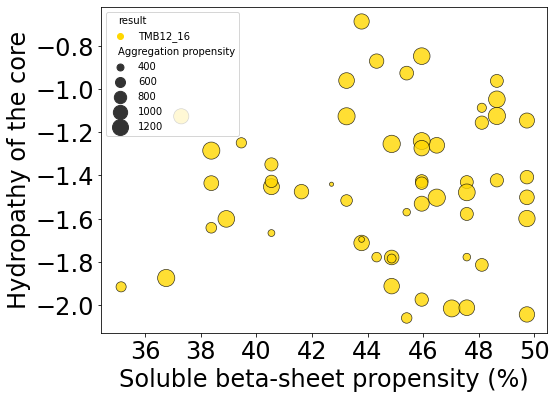

In [18]:
plt.figure(figsize=(8,6))
pl = sns.scatterplot(x=df_12_16_all.beta_sheet,y=df_12_16_all.hydropathy_core,hue=df_12_16_all['result'],palette=['gold'],edgecolor='black',alpha=0.8,s=50,size=df_12_16_all["Aggregation propensity"],sizes=(0, 300))

#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Soluble beta-sheet propensity (%)', size=24)
plt.ylabel('Hydropathy of the core', size=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

(array([0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

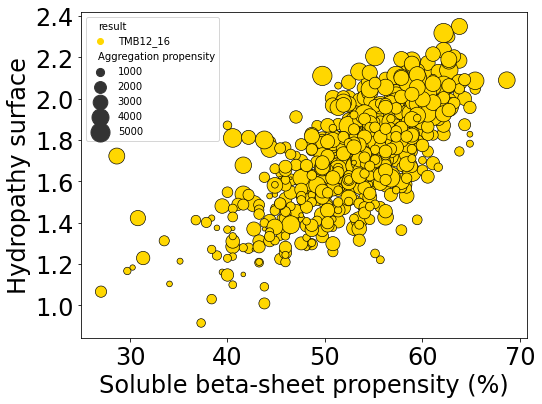

In [19]:
plt.figure(figsize=(8,6))
pl = sns.scatterplot(x=df_12_16.beta_sheet,y=df_12_16.hydropathy_surface,hue=df_12_16['result'],palette=['gold'],edgecolor='black',alpha=1,s=50,size=df_12_16["Aggregation propensity"],sizes=(0, 400))

#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Soluble beta-sheet propensity (%)', size=24)
plt.ylabel('Hydropathy surface', size=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

(array([-2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

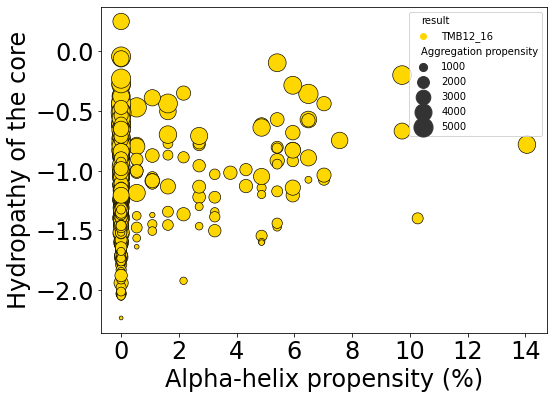

In [20]:
plt.figure(figsize=(8,6))
pl = sns.scatterplot(x=df_12_16.helix,y=df_12_16.hydropathy_core,hue=df_12_16['result'],palette=['gold'],edgecolor='black',alpha=1,s=50,size=df_12_16["Aggregation propensity"],sizes=(0, 400))

#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Alpha-helix propensity (%)', size=24)
plt.ylabel('Hydropathy of the core', size=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

(array([0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8]),
 <a list of 8 Text yticklabel objects>)

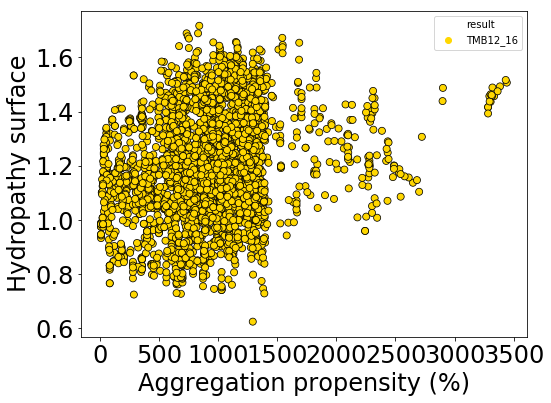

In [26]:
plt.figure(figsize=(8,6))
pl = sns.scatterplot(x=df_12_16["Aggregation propensity"],y=df_12_16.hydropathy_surface,hue=df_12_16['result'],palette=['gold'],edgecolor='black',alpha=1,s=50)

#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Aggregation propensity (%)', size=24)
plt.ylabel('Hydropathy surface', size=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

In [77]:
pd.options.display.max_colwidth = 200
columns = ['sequence','ss', 'identity','hydropathy','hydropathy_core','hydropathy_surface','ratio_hydropathy','F','aro','beta_sheet','coil','helix',"Aggregation propensity",'result']
native = {'A': 0.09892494045990434, 'C': 0.0007037625203442372, 'D': 0.027770177581332288, 'E': 0.029719275383167428, 'F': 0.07929574855980195, 'G': 0.1453262552782189, 'H': 0.011157715202304692, 'I': 0.05289172587768166, 'K': 0.02000481398009908, 'L': 0.11207876498844926, 'M': 0.01748405604149801, 'N': 0.02587373268683085, 'P': 0.026855803431653235, 'Q': 0.021940748555100798, 'R': 0.037856030027200865, 'S': 0.04138471504904712, 'T': 0.04080177214642398, 'V': 0.09253231337129984, 'W': 0.02589065683561668, 'Y': 0.09150699202402476}
native_core = {'A': 0.07307786630111489, 'C': 0.000560694380689476, 'D': 0.0529505100746824, 'E': 0.06357016644762904, 'F': 0.03465929694164796, 'G': 0.24388319111608575, 'H': 0.014590630220483895, 'I': 0.01795479650462075, 'K': 0.036906266571925035, 'L': 0.033595549658657645, 'M': 0.022868994543972065, 'N': 0.04843456224965258, 'P': 0.010193109432870735, 'Q': 0.04258971634104471, 'R': 0.07494859428154613, 'S': 0.07878122858095064, 'T': 0.06227166114356501, 'V': 0.027519089809615437, 'W': 0.0037320237189443434, 'Y': 0.056912051680301494}
native_surf = {'A': 0.11995082543027749, 'C': 0.000820144522764552, 'D': 0.0072866686445619815, 'E': 0.0021825051749243796, 'F': 0.11560627606644364, 'G': 0.06515289471799646, 'H': 0.00836513311576485, 'I': 0.08131195842327642, 'K': 0.006255946474060585, 'L': 0.17592270521516432, 'M': 0.013103556460385826, 'N': 0.007521117442649561, 'P': 0.040410447379459216, 'Q': 0.005143380359499524, 'R': 0.0076822477075170256, 'S': 0.010963678339659189, 'T': 0.02333660709109572, 'V': 0.14541878523126028, 'W': 0.0439160963166815, 'Y': 0.11964902588655747}
#aggregation_list = {'48_input_0076_0005_8_0002_0008_0003_0004_0010':2147.84,'82_input_0023_0005_8_0008_0001_0003_0004_0003':1781.06,"6_input_0023_0003_9_0001_0002_0003_0006_0004":2893.26,'6_input_0073_0001_9_0003_0006_0004_0006_0009':3430.78,"12_input_0082_0001_10_0002_0003_0005_0004_0005":1885.31,'13_input_0015_0003_7_0009_0001_0008_0008_0006':2833.82,'72_input_0005_0003_17_0009_0003_0003_0010_0006':1233.12,'75_input_0094_0002_9_0007_0010_0003_0007_0002':3059.95,'95_input_0051_0002_22_0009_0008_0008_0002_0006':185.35}

agg = pd.read_csv("TMB12_16_B/tango_aggregation.txt", header=0, sep="\s+")
agg_index = pd.read_csv("TMB12_16_B/tango_index.txt", header=None, names=["description", "Sequence"], sep="\s+")
daggregation = pd.merge(agg, agg_index, on="Sequence")
aggregation_list=daggregation[["Aggregation","description"]].set_index('description').to_dict()

df_12_16_B = pd.DataFrame(columns=columns)

for file in glob.glob("TMB12_16_B/*_input_*/*.ss3_simp"):
    name = (file.split('/')[-1]).split('.')[0]
    sequence = ""
    ss = ""
    dround = "TMB12_16"
    if name in aggregation_list["Aggregation"]: 
        aggregation=aggregation_list["Aggregation"][name]
    else:
        aggregation = 150.0
    result = 'TMB12_16'
        
    with open(file, 'r') as in_f:
        lines = in_f.readlines()
        for i in range(0, len(lines)):
            line_seq = lines[1].strip()
            line_ss = lines[2].strip()
#            line_ref = lines[3].strip()
#            line_mem = lines[4].strip()
    sequence = line_seq.strip()
    ss = line_ss.strip()
#    ref_ss = line_ref.strip()
#    mem = line_mem.strip()
    print(file, len(ss))
    
    identity = ss_pred(ss,dround,name)
    distr = aa_distribution(sequence,dround,name)
    distr_surf = aa_distribution_surface(sequence,dround,name)
    distr_core = aa_distribution_core(sequence,dround,name)
#    outcome = results[design_name]
    
    keys = set(native.keys()) | set(distr.keys())
    
    dstr_r = numpy.corrcoef([native.get(x, 0) for x in keys],[distr.get(x, 0) for x in keys])[0, 1]
    dstr_core_r = numpy.corrcoef([native_core.get(x, 0) for x in keys],[distr_core.get(x, 0) for x in keys])[0, 1]
    dstr_surf_r = numpy.corrcoef([native_surf.get(x, 0) for x in keys],[distr_surf.get(x, 0) for x in keys])[0, 1]
    
    hydro = GRAVY(sequence)
    hydro_core = GRAVY_core(sequence,dround,name)
    hydro_surf = GRAVY_surf(sequence,dround,name)
    hydro_diff = hydro_surf-hydro_core
    
    F_freq = sequence.count('F')/len(ss)*100
    aro_freq = sequence.count('F')/len(ss)*100 + sequence.count('Y')/len(ss)*100 + sequence.count('W')/len(ss)*100
    beta_sheet = float(ss.count('E'))/len(ss)*100
    coil = float(ss.count('C'))/len(ss)*100
    helix = float(ss.count('H'))/len(ss)*100
    df_12_16_B.loc[name] = [sequence,ss,identity,hydro,hydro_core,hydro_surf,hydro_diff,F_freq,aro_freq,beta_sheet,coil,helix,aggregation,result]
#df["beta_sheet"] = df["ss"].str.count('E')/123*100
print(df_12_16_B)

('TMB12_16_B/47_input_0088_0001_12_0010_0010_0006_0008_0004/47_input_0088_0001_12_0010_0010_0006_0008_0004.ss3_simp', 185)
('TMB12_16_B/3_input_0076_0003_13_0010_0002_0003_0009/3_input_0076_0003_13_0010_0002_0003_0009.ss3_simp', 185)
('TMB12_16_B/15_input_0071_0005_9_0010_0008_0002_0004_0001/15_input_0071_0005_9_0010_0008_0002_0004_0001.ss3_simp', 185)
('TMB12_16_B/11_input_0076_0004_13_0007_0008_0001_0004/11_input_0076_0004_13_0007_0008_0001_0004.ss3_simp', 185)
('TMB12_16_B/13_input_0039_0004_9_0001_0003_0007_0006_0004/13_input_0039_0004_9_0001_0003_0007_0006_0004.ss3_simp', 185)
('TMB12_16_B/13_input_0039_0004_9_0001_0003_0002_0009_0003/13_input_0039_0004_9_0001_0003_0002_0009_0003.ss3_simp', 185)
('TMB12_16_B/30_input_0043_0005_4_0003_0005_0003_0003/30_input_0043_0005_4_0003_0005_0003_0003.ss3_simp', 185)
('TMB12_16_B/72_input_0067_0004_7_0009_0010_0002_0006_0006/72_input_0067_0004_7_0009_0010_0002_0006_0006.ss3_simp', 185)
('TMB12_16_B/11_input_0076_0004_15_0007_0001_0006_0008_000

In [80]:
df_12_16_B.loc[(df_12_16_B["beta_sheet"]<55.0)&(df_12_16_B["Aggregation propensity"]<1500)]

sequence  \
11_input_0076_0004_13_0007_0008_0001_0004       QSRPGSAELDVGADYNTDNTFSGSFRVDYEITPYLSTSVEFKYNTDNTASVDVDTRGQYDLSPTLSTSPGAQYSWNNSSLNSGRPYLTVTYKLSPHAEFSVTFWYNTDNTLEVVFDFKGEYVITPTFVVKPGFQYFWNNSSLNKTVGYVRFEYWITPDFKGYTEFWYNTDNTFVLRVGARYKLSE   
13_input_0039_0004_9_0001_0003_0007_0006_0004   QSKPGTAAVEFGGRYNTDNTASGFVRFQYTVSPTLDLFGEVEYNTDNTARFKGGFEGKYDLSPHAEVRPGAEYEWNNSSLNKSAPYTKFRYRLSPHAKGKAEFKYNTDNTIEVKAGGEGDYDVTPDLKLQPGGFYQWNNSSLNKVWFYLRVEYKISPHIETYFLVLYNTDNTILFQGGTLYWLSW   
13_input_0039_0004_9_0001_0003_0002_0009_0003   QSKPGTAAVEVGGEYNTDNTAAGFVRFEYTVSPHLDTWAEVKYNTDNTIKVAGGAEGQYDASPHLKVRPGAKYEWNNSSLNKASPYVKFSYDLSPHAKLKLRFEYNTDNTLEVELGAEGEYDITPDFRLQPGASYVWNNSSLNKTVFYLELKYKLSPHAETYAKFDYNTDNTVSVRAGTLYWLSW   
11_input_0076_0004_13_0007_0008_0009_0007_0006  QSRPGSAELDAGTRYNTDNTFALEVQFDYEITPYLSTSVVFKYNTDNTASVDVDTRGKYDISPTIEVAPGAQYSWNNSSLNSGRPYATLTYKISPHASFSVTFFYNTDNTLEVVFDFKAEYQITPHFHVKPGAQYFWNNSSLNKAKGYVTFEYEITPDLKGYVTFEYNTDNTASVKFGGRYKLSE   
15_input_0071_0005_9_0010_0008_0003_0010_0004   QDKPGTLRLDVGVEYNTDNTFKLRVQFDYVISPHLKTSAALEYNTDNTIFVRGGTEGEYWISPTLRVFPGASYEWNNSSLNKASPYTRFEYKLSPHADGFAQFEYNTDNTIKFEFGGDGKYSLSPHAFVEPGAKYVWNNSSLNKLVGYVTFFYQLTPHLWGYTTFRYNTDNTAATEFGAKYVLSE   
78_input_0031_0005_5_0001_0008_0001_0002_0001   KDKSGTIKLDVGVQYNTDNTIVFRVRFDYVLSPEVKGFTEFAYNTDNTFAVVSGALAKYKLSPDAEAEPGAEYHWNNSSLNKFVPYFTLFYWITPTLRGRVDVWYNTDNTLSVRVGAEVDYFISPTAAVTPGGAYRWNNSSLNKTEFYAEFKYRISPDAELYAFVQYNTDNTFSFLAGGVYKISE   
30_input_0043_0002_4_0008_0007_0006_0002_0006   SDKSGTIKADGGADYNTDNTAKVRAEGRYVLSPHLKLFARTEYNTDNTIRLEAGADGEYLITPHLRVRPGGRYVWNNSSLNKGEPYTRFEYQLSPDAAVRVEFWYNTDNTAAVTFGLDGSYSLTPHASVQPGVKYDWNNSSLNRASVYAVFRYQITPHLVGYTEFEYNTDNTFRVSTGASYVISE   
69_input_0090_0004_9_0010_0004_0005_0006_0004   KDDAGTIRLDVGAQYNTDNTAEGKSRVSYWLSPHAKVDFEGRYNTDNTFEVVVDFRGFYDASPDLKFAPGAQYFWNNSSLNKLVPYLEVRYRLSPDLELKVRVEYNTDNTFRVEVGAESSYLITPHFAVTPGGSYEWNNSSLNKSRGYAEFDYTLTPDAKGYVKFWYNTDNTASTQFGAKYRVSS   
84_input_0039_0003_5_0008_0010_0007_0001        QPKPGTAELDAGATYNTDNTIVFFTTLDYVLSPDLVVRVTFKYNTDNTFKVEFDVQGKYDISPTFSVSPGAKYQWNNSSLNKGAPYVTFHYKLSPHAETWATTEYNTDNTIKTAAGTEGTYDISPTFKVTPGGAYEWNNSSLNKGKGYTKFKYVISPTLELYAKVEYNTDNTIVFTAGGRYKISD   
42_input_0021_0002_12_0002_0009_0002_0002_0003  KPSAGSFSVRAGVQYNTDNTIRFLVEFEYWISPTAKLRALFVYNTDNTFTAAAGAEVEYTISPTAFAWPGAMYFWNNSSLNKLVPYVQFEYKLSPDASTKAAVFYNTDNTIEVEAGTEGKYFISPTIELKPGAKYKWNNSSLNKGAVYAQTDYKLTPDLVGYVRFEYNTDNTIEVEVGAQYLFSA   
11_input_0076_0004_13_0001_0009_0001_0006_0004  QSRPGSAELDAGAQYNTDNTAKGFSRVDYEITPYLSVSVQGEYNTDNTFATVVDLRGRYDISPHLALEPGAQYFWNNSSLNRGRPYLSVKYQFSPHAAVVVTVFYNTDNTIEFKVDLKAVYTITPTFEVKPGAQYDWNNSSLNKAKGYVQFDYKITPDASGYTQFWYNTDNTASVVVGGRYKLSE   
11_input_0076_0004_16_0010_0002_0001_0001_0002  QSRPGSAELDVGADYNTDNTFSGFVQFDYEITPYASVTFVFWYNTDNTASVQVDFRGKYDLSPHASASPGAQYEWNNSSLNKGRPYLSVTYQLSPHARVTFTLWYNTDNTILFEVGFEGEYDITPHLKVKPGAKYKWNNSSLNKLDFYTRFEYEITPDAKGYAEVWYNTDNTIVFRFGGRYKLSE   
18_input_0060_0003_6_0005_0008_0005_0002_0008   QQKAGNIEVDAGATYNTDNTASGFAVFRYALSPHAEGFAEFRYNTDNTIKVRAGGDGEYWLSPTAATWPGGSYEWNNSSLNKAAPYTRFEYWITPHLKGFGLTQYNTDNTLQLEGGAEVSYDISPDFKATPGAKYKWNNSSLNKAEVYTKFFYDASPTLQVYTEFWYNTDNTARVTFGVRYKISD   
91_input_0048_0004_8_0006_0007_0003_0002_0003   SKKKGTIWADAGATYNTDNTLVGFATTKYWLSPHAFTDFTVWYNTDNTIVVEVDTQGEYLISPHFRLFPGARYRWNNSSLNKLEPYLRFEYQLSPHARTWAVTWYNTDNTIRVKGGAEGEYDVTPTIKLQPGGEYVWNNSSLNKGKGYVRFWYKLSPTASGYTEFHYNTDNTFAVTVGAKYLITP   
11_input_0076_0004_13_0007_0008_0007_0003_0006  QSRPGSAELDAGVRYNTDNTISFEVQFDYEATPYASVTVVFRYNTDNTFSLEVDVRGKYDISPTVFVAPGAQYFWNNSSLNKARPYATLTYKISPHASFSVTTFYNTDNTIEVVFDFKAEYVITPHFRVKPGAQYFWNNSSLNKAKGYVTFEYEITPDLKGYVTFEYNTDNTASTKFGGRYKLSE   
13_input_0039_0004_9_0001_0003_0005_0009        QSKPGTAAVEAGGEYNTDNTAAGFVRFEYTLSPYLDAFAEVKYNTDNTAFFVAGFEGQYDASPHAEVRPGLKYVWNNSSLNKFFPYVKFRYRLSPHLELKASVEYNTDNTLELEFGAEGKYDITPDFEVQPGASYKWNNSSLNKLVFYAVFRYKLSPHAETYTRFEYNTDNTLRVRAGTLYWLSW   
15_input_0071_0005_8_0008_0002_0003_0009_0001   QKKPGTLEVEVGAKYNTDNTIDGFVRFEYVLSPDARAVVEVWYNTDNTIEVKAGAEGDYRVSPHASFAPGAEYKWNNSSLNKARPYLKFRYQASPTAKGFAETWYNTDNTIEFRAGGDGRYSLSPHAFAEPGARYRWNNSSLNKLEGY

In [86]:
df_12_16_B.loc[df_12_16_B["sequence"]=="QSKPGTLQFEAGATYNTDNTIVGFFSFFYTISPHARAQTTVFYNTDNTAWVTSGGEGQYDISPTLVLFPGAVYTWNNSSLNKFLPYLLFVYKLSPDARAWLSVKYNTDNTIQFDFGLEFSYKLSPHAEVNPGVLYSWNNSSLNKTEFYATFFYVVSPDAVGYVTFRYNTDNTFAVTFGGRYTLSK"]

sequence  \
3_input_0076_0003_13_0010_0002_0003_0009  QSKPGTLQFEAGATYNTDNTIVGFFSFFYTISPHARAQTTVFYNTDNTAWVTSGGEGQYDISPTLVLFPGAVYTWNNSSLNKFLPYLLFVYKLSPDARAWLSVKYNTDNTIQFDFGLEFSYKLSPHAEVNPGVLYSWNNSSLNKTEFYATFFYVVSPDAVGYVTFRYNTDNTFAVTFGGRYTLSK   

                                                                                                                                                                                                                                 ss  \
3_input_0076_0003_13_0010_0002_0003_0009  CCCCCEEEEECCEEECCCCEEEEEEEEEEEECCCCCEEEEEEECCCCCEEEEECCCCEEEECCEEEECCCCEEEECCCCCCCCCCEEEEEEEECCCCCEEEEEEECCCCEEEEEEEEEEEEEECCCCCCCCCEEEEECCCCCCCEEEEEEEEEEECCCCEEEEEEEECCCCEEEEEEEEEEEECC   

                                          identity  hydropathy  \
3_input_0076_0003_13_0010_0002_0003_0009  0.686486   -0.189189   

                                          hydropathy_core  hydropathy_surface  \
3_input_0076_0003_13_0010_0002_0003_0009        -0.855738            1.369444   

                                          ratio_hydropathy  F aro  beta_sheet  \
3_input_0076_0003_13_0010_0002_0003_0009          2.225182  0   0   58.918919   

                                               coil  helix  \
3_input_0076_0003_13_0010_0002_0003_0009  41.081081    0.0   

                                          Aggregation propensity    result  
3_input_0076_0003_13_0010_0002_0003_0009                 3299.32  TMB12_16

In [78]:
df_12_16_all_B = pd.concat([df_all,df_12_16_B])

/Users/anastassiavorobieva/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


(array([-3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5]),
 <a list of 8 Text yticklabel objects>)

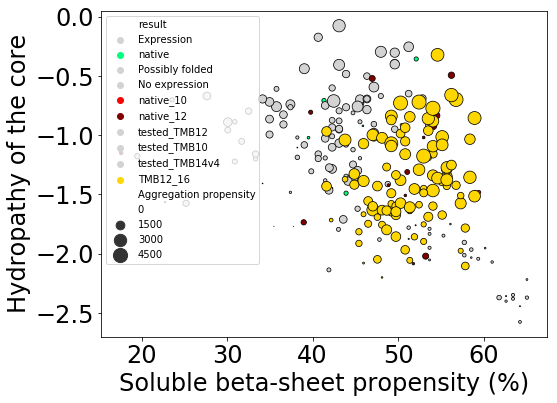

In [71]:
plt.figure(figsize=(8,6))
pl = sns.scatterplot(x=df_12_16_all_B.beta_sheet,y=df_12_16_all_B.hydropathy_core,hue=df_12_16_all_B['result'],palette=["lightgrey",'springgreen','lightgrey','lightgrey','red',"maroon",'lightgrey','lightgrey','lightgrey','gold'],edgecolor='black',alpha=1,s=50,size=df_12_16_all_B["Aggregation propensity"],sizes=(0, 200))

#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Soluble beta-sheet propensity (%)', size=24)
plt.ylabel('Hydropathy of the core', size=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

(array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ]),
 <a list of 8 Text yticklabel objects>)

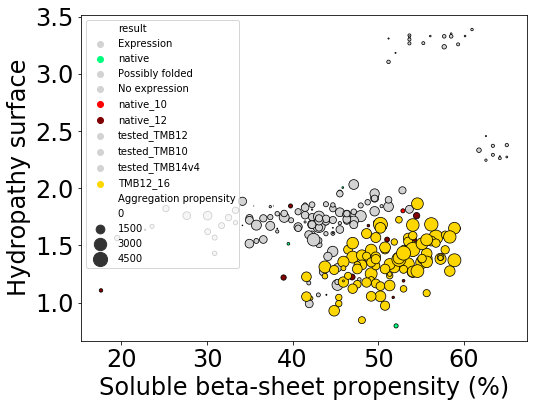

In [74]:
plt.figure(figsize=(8,6))
pl = sns.scatterplot(x=df_12_16_all_B.beta_sheet,y=df_12_16_all_B.hydropathy_surface,hue=df_12_16_all_B['result'],palette=["lightgrey",'springgreen','lightgrey','lightgrey','red',"maroon",'lightgrey','lightgrey','lightgrey','gold'],edgecolor='black',alpha=1,s=50,size=df_12_16_all_B["Aggregation propensity"],sizes=(0, 200))

#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Soluble beta-sheet propensity (%)', size=24)
plt.ylabel('Hydropathy surface', size=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

(array([-3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5]),
 <a list of 8 Text yticklabel objects>)

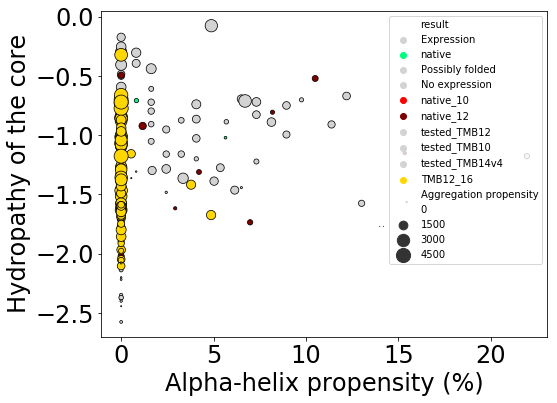

In [76]:
plt.figure(figsize=(8,6))
pl = sns.scatterplot(x=df_12_16_all_B.helix,y=df_12_16_all_B.hydropathy_core,hue=df_12_16_all_B['result'],palette=["lightgrey",'springgreen','lightgrey','lightgrey','red',"maroon",'lightgrey','lightgrey','lightgrey','gold'],edgecolor='black',alpha=1,s=50,size=df_12_16_all_B["Aggregation propensity"],sizes=(0, 200))

#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Alpha-helix propensity (%)', size=24)
plt.ylabel('Hydropathy of the core', size=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

In [102]:
pd.options.display.max_colwidth = 200
columns = ['sequence','ss', 'identity','hydropathy','hydropathy_core','hydropathy_surface','ratio_hydropathy','F','aro','beta_sheet','coil','helix',"Aggregation propensity",'result']
native = {'A': 0.09892494045990434, 'C': 0.0007037625203442372, 'D': 0.027770177581332288, 'E': 0.029719275383167428, 'F': 0.07929574855980195, 'G': 0.1453262552782189, 'H': 0.011157715202304692, 'I': 0.05289172587768166, 'K': 0.02000481398009908, 'L': 0.11207876498844926, 'M': 0.01748405604149801, 'N': 0.02587373268683085, 'P': 0.026855803431653235, 'Q': 0.021940748555100798, 'R': 0.037856030027200865, 'S': 0.04138471504904712, 'T': 0.04080177214642398, 'V': 0.09253231337129984, 'W': 0.02589065683561668, 'Y': 0.09150699202402476}
native_core = {'A': 0.07307786630111489, 'C': 0.000560694380689476, 'D': 0.0529505100746824, 'E': 0.06357016644762904, 'F': 0.03465929694164796, 'G': 0.24388319111608575, 'H': 0.014590630220483895, 'I': 0.01795479650462075, 'K': 0.036906266571925035, 'L': 0.033595549658657645, 'M': 0.022868994543972065, 'N': 0.04843456224965258, 'P': 0.010193109432870735, 'Q': 0.04258971634104471, 'R': 0.07494859428154613, 'S': 0.07878122858095064, 'T': 0.06227166114356501, 'V': 0.027519089809615437, 'W': 0.0037320237189443434, 'Y': 0.056912051680301494}
native_surf = {'A': 0.11995082543027749, 'C': 0.000820144522764552, 'D': 0.0072866686445619815, 'E': 0.0021825051749243796, 'F': 0.11560627606644364, 'G': 0.06515289471799646, 'H': 0.00836513311576485, 'I': 0.08131195842327642, 'K': 0.006255946474060585, 'L': 0.17592270521516432, 'M': 0.013103556460385826, 'N': 0.007521117442649561, 'P': 0.040410447379459216, 'Q': 0.005143380359499524, 'R': 0.0076822477075170256, 'S': 0.010963678339659189, 'T': 0.02333660709109572, 'V': 0.14541878523126028, 'W': 0.0439160963166815, 'Y': 0.11964902588655747}
aggregation_list = {'A_18_input_0087_0005_1_0007_0010_0001_0010_0007':403.851,'A_56_input_0085_0001_1_0008_0008_0009_0002_0005':322.531,"A_107_input_0023_0002_1_0008_0010_0009_0005_0009":696.504,'B_20_input_0008_0005_1_0001_0010_0001_0003_0002':1454.09,"B_3_input_0045_0003_1_0001_0005_0001_0005_0010":590.12,'B_33_input_0090_0003_1_0009_0001_0003_0009_0004':1308.2,'B_70_input_0003_0003_1_0001_0007_0001_0001_0003':1592.42,'B_80_input_0074_0001_1_0009_0009_0002_0001_0009':806.116}

df_12_18 = pd.DataFrame(columns=columns)

for file in glob.glob("TMB12_18/*.ss3_simp"):
    name = (file.split('/')[-1]).split('.')[0]
    sequence = ""
    ss = ""
    dround = "TMB12_18"
    if name in aggregation_list: 
        aggregation=aggregation_list[name]
    else:
        aggregation = 50.0
    result = 'TMB12_18'
        
    with open(file, 'r') as in_f:
        lines = in_f.readlines()
        for i in range(0, len(lines)):
            line_seq = lines[1].strip()
            line_ss = lines[2].strip()
#            line_ref = lines[3].strip()
#            line_mem = lines[4].strip()
    sequence = line_seq.strip()
    ss = line_ss.strip()
#    ref_ss = line_ref.strip()
#    mem = line_mem.strip()
    print(file, len(ss))
    
    identity = ss_pred(ss,dround,name)
    distr = aa_distribution(sequence,dround,name)
    distr_surf = aa_distribution_surface(sequence,dround,name)
    distr_core = aa_distribution_core(sequence,dround,name)
#    outcome = results[design_name]
    
    keys = set(native.keys()) | set(distr.keys())
    
    dstr_r = numpy.corrcoef([native.get(x, 0) for x in keys],[distr.get(x, 0) for x in keys])[0, 1]
    dstr_core_r = numpy.corrcoef([native_core.get(x, 0) for x in keys],[distr_core.get(x, 0) for x in keys])[0, 1]
    dstr_surf_r = numpy.corrcoef([native_surf.get(x, 0) for x in keys],[distr_surf.get(x, 0) for x in keys])[0, 1]
    
    hydro = GRAVY(sequence)
    hydro_core = GRAVY_core(sequence,dround,name)
    hydro_surf = GRAVY_surf(sequence,dround,name)
    hydro_diff = hydro_surf-hydro_core
    
    F_freq = sequence.count('F')/len(ss)*100
    aro_freq = sequence.count('F')/len(ss)*100 + sequence.count('Y')/len(ss)*100 + sequence.count('W')/len(ss)*100
    beta_sheet = float(ss.count('E'))/len(ss)*100
    coil = float(ss.count('C'))/len(ss)*100
    helix = float(ss.count('H'))/len(ss)*100
    df_12_18.loc[name] = [sequence,ss,identity,hydro,hydro_core,hydro_surf,hydro_diff,F_freq,aro_freq,beta_sheet,coil,helix,aggregation,result]
#df["beta_sheet"] = df["ss"].str.count('E')/123*100
print(df_12_18)

('TMB12_18/B_3_input_0045_0003_1_0001_0005_0006_0008_0006.ss3_simp', 179)
('TMB12_18/A_93_input_0088_0003_1_0007_0009_0002_0007_0006.ss3_simp', 179)
('TMB12_18/B_20_input_0008_0005_1_0010_0001_0004_0010_0006.ss3_simp', 179)
('TMB12_18/A_27_input_0059_0005_2_0007_0004_0007_0010_0009.ss3_simp', 179)
('TMB12_18/B_70_input_0003_0001_1_0004_0002_0004_0009_0004.ss3_simp', 179)
('TMB12_18/A_65_input_0060_0004_1_0010_0001_0007_0003_0008.ss3_simp', 179)
('TMB12_18/A_43_input_0037_0003_2_0001_0008_0007_0002_0007.ss3_simp', 179)
('TMB12_18/B_14_input_0053_0003_1_0007_0002_0003_0006_0010.ss3_simp', 179)
('TMB12_18/B_77_input_0042_0005_1_0010_0008_0001_0003_0006.ss3_simp', 179)
('TMB12_18/B_20_input_0008_0005_1_0010_0001_0008_0001_0010.ss3_simp', 179)
('TMB12_18/A_110_input_0054_0005_1_0001_0010_0006_0009_0009.ss3_simp', 179)
('TMB12_18/B_33_input_0103_0004_1_0006_0006_0008_0010_0001.ss3_simp', 179)
('TMB12_18/A_8_input_0038_0005_1_0008_0001_0010_0003_0001.ss3_simp', 179)
('TMB12_18/B_14_input_0053

In [103]:
df_12_18_all = pd.concat([df_all,df_12_18])

/Users/anastassiavorobieva/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


(array([-3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5]),
 <a list of 8 Text yticklabel objects>)

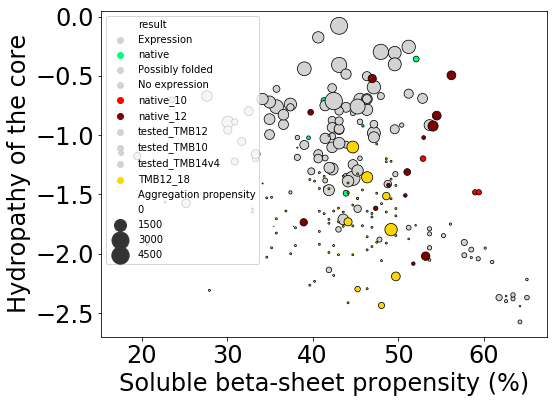

In [104]:
plt.figure(figsize=(8,6))
pl = sns.scatterplot(x=df_12_18_all.beta_sheet,y=df_12_18_all.hydropathy_core,hue=df_12_18_all['result'],palette=["lightgrey",'springgreen','lightgrey','lightgrey','red',"maroon",'lightgrey','lightgrey','lightgrey','gold'],edgecolor='black',alpha=1,s=50,size=df_12_18_all["Aggregation propensity"],sizes=(0, 300))

#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Soluble beta-sheet propensity (%)', size=24)
plt.ylabel('Hydropathy of the core', size=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

(array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ]),
 <a list of 8 Text yticklabel objects>)

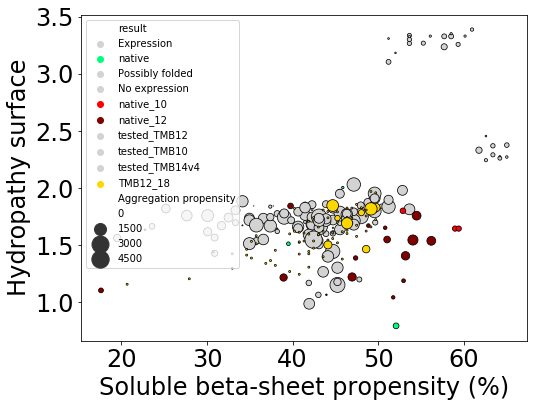

In [105]:
plt.figure(figsize=(8,6))
pl = sns.scatterplot(x=df_12_18_all.beta_sheet,y=df_12_18_all.hydropathy_surface,hue=df_12_18_all['result'],palette=["lightgrey",'springgreen','lightgrey','lightgrey','red',"maroon",'lightgrey','lightgrey','lightgrey','gold'],edgecolor='black',alpha=1,s=50,size=df_12_18_all["Aggregation propensity"],sizes=(0, 300))

#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Soluble beta-sheet propensity (%)', size=24)
plt.ylabel('Hydropathy surface', size=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

(array([-3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5]),
 <a list of 8 Text yticklabel objects>)

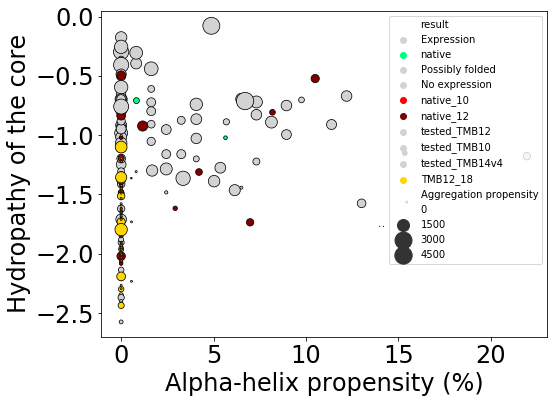

In [106]:
plt.figure(figsize=(8,6))
pl = sns.scatterplot(x=df_12_18_all.helix,y=df_12_18_all.hydropathy_core,hue=df_12_18_all['result'],palette=["lightgrey",'springgreen','lightgrey','lightgrey','red',"maroon",'lightgrey','lightgrey','lightgrey','gold'],edgecolor='black',alpha=1,s=50,size=df_12_18_all["Aggregation propensity"],sizes=(0, 300))

#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Alpha-helix propensity (%)', size=24)
plt.ylabel('Hydropathy of the core', size=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

In [130]:
df_all = pd.concat([df_all,df_des2])
df_all

/Users/anastassiavorobieva/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


AAT per residue (AATr):  \
TMB2_33                                                            0.214   
TMB2_32                                                            0.146   
1p4t                                                               0.135   
TMB2_44                                                            0.262   
TMB2_45                                                            0.258   
TMB0_3                                                             0.218   
TMB0_2                                                             0.213   
TMB2_70                                                            0.167   
TMB2_71                                                            0.253   
TMB2_39                                                            0.143   
TMB2_38                                                            0.139   
TMB2_24                                                            0.205   
TMB2_25                                                            0.172   
TMB2_53                                                            0.237   
TMB2_52                                                            0.176   
TMB2_88                                                            0.219   
TMB2_89                                                            0.170   
TMB2_67                                                            0.153   
TMB2_66                                                            0.201   
TMB2_10                                                            0.243   
TMB2_11                                                            0.250   
TMB2_5                                                             0.212   
TMB2_4                                                             0.186   
TMB2_82                                                            0.148   
OmpT3                                                              0.142   
TMB2_83                                                            0.222   
TMB2_59                                                            0.182   
TMB2_58                                                            0.150   
TMB1_7                                                             0.217   
TMB2_23                                                            0.137   
...                                                                  ...   
64_input_0078_0005_14_0004_0010_0006_0009_0006                       NaN   
64_input_0025_0002_13_0009_0010_0002_0005_0003                       NaN   
23_input_0056_0001_10_0002_0005_0004_0004_0009                       NaN   
71_input_0047_0001_9_0001_0007_0005_0005_0004                        NaN   
95_input_0066_0002_4_0009_0001_0007_0007_0009                        NaN   
78_input_0091_0003_4_0002_0010_0001_0008_0001                        NaN   
100_input_0036_0002_17_0009_0007_0010_0004_0005                      NaN   
95_input_0066_0002_4_0006_0003_0008_0002_0003                        NaN   
78_input_0091_0003_4_0002_0010_0008_0008_0009                        NaN   
4_input_0046_0004_6_0009_0003_0010_0004_0007                         NaN   
6_input_0070_0002_6_0005_0001_0006_0002_0010                         NaN   
98_input_0009_0001_14_0002_0007_0010_0001_0007                       NaN   
100_input_0036_0002_17_0010_0002_0003_0002_0007                      NaN   
78_input_0091_0003_4_0009_0001_0003_0003_0004                        NaN   
72_input_0041_0001_8_0005_0002_0004_0009_0008                        NaN   
78_input_0091_0003_4_0009_0001_0004_0007_0010                        NaN   
91_input_0005_0003_7_0010_0007_0004_0006_0007                        NaN   
39_input_0028_0003_5_0009_0007_0002_0009_0008                        NaN   
33_input_0051_0003_9_0004_0010_0005_0010_0003                        NaN   
98_input_0009_0002_7_0009_0004_0006_0010_0004                        NaN   
67_input_0059_0002_5_0009_0009_0005_0004_0003                        NaN   
5_input_0062_0004_6_0

(array([-3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5]),
 <a list of 8 Text yticklabel objects>)

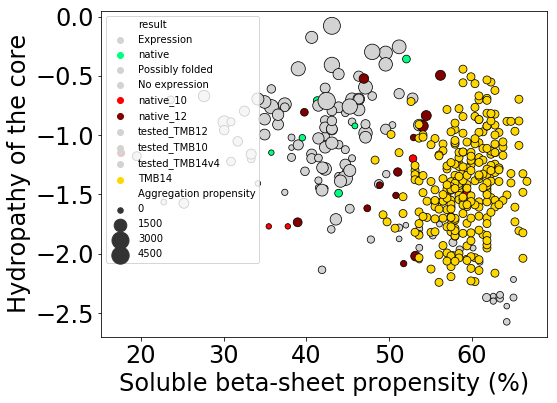

In [139]:
plt.figure(figsize=(8,6))
pl = sns.scatterplot(x=df_all.beta_sheet,y=df_all.hydropathy_core,hue=df_all['result'],palette=["lightgrey",'springgreen','lightgrey','lightgrey','red',"maroon",'lightgrey','lightgrey','lightgrey','gold'],edgecolor='black',alpha=1,s=50,size=df_all["Aggregation propensity"],sizes=(30, 300))

#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Soluble beta-sheet propensity (%)', size=24)
plt.ylabel('Hydropathy of the core', size=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)


(array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ]),
 <a list of 8 Text yticklabel objects>)

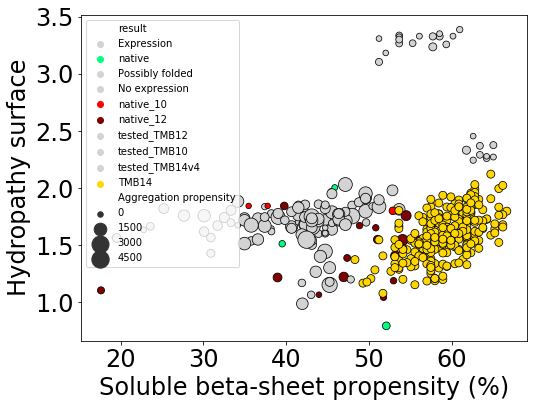

In [140]:
plt.figure(figsize=(8,6))
pl = sns.scatterplot(x=df_all.beta_sheet,y=df_all.hydropathy_surface,hue=df_all['result'],palette=["lightgrey",'springgreen','lightgrey','lightgrey','red',"maroon",'lightgrey','lightgrey','lightgrey','gold'],edgecolor='black',alpha=1,s=50,size=df_all["Aggregation propensity"],sizes=(30, 300))

#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Soluble beta-sheet propensity (%)', size=24)
plt.ylabel('Hydropathy surface', size=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

(array([0., 1., 2., 3., 4., 5., 6.]), <a list of 7 Text yticklabel objects>)

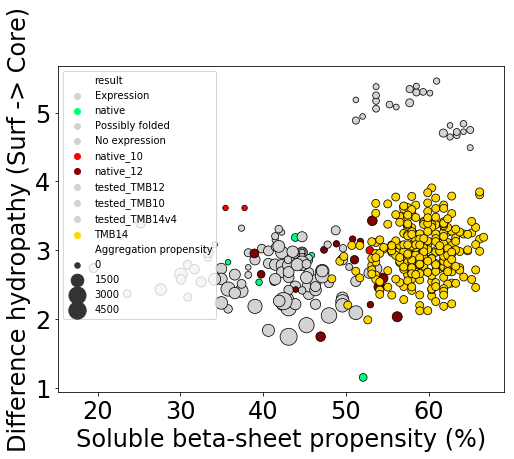

In [141]:
plt.figure(figsize=(8,6))
pl = sns.scatterplot(x=df_all.beta_sheet,y=df_all.ratio_hydropathy,hue=df_all['result'],palette=["lightgrey",'springgreen','lightgrey','lightgrey','red',"maroon",'lightgrey','lightgrey','lightgrey','gold'],edgecolor='black',alpha=1,s=50,size=df_all["Aggregation propensity"],sizes=(30, 300))

#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Soluble beta-sheet propensity (%)', size=24)
plt.ylabel('Difference hydropathy (Surf -> Core)', size=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

In [133]:
df_good_rounds = df_all.loc[~df_all.index.str.contains("TMB0")]
df_good_rounds = df_good_rounds.loc[~df_good_rounds.index.str.contains("TMB1_")]

(array([-2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5]),
 <a list of 7 Text yticklabel objects>)

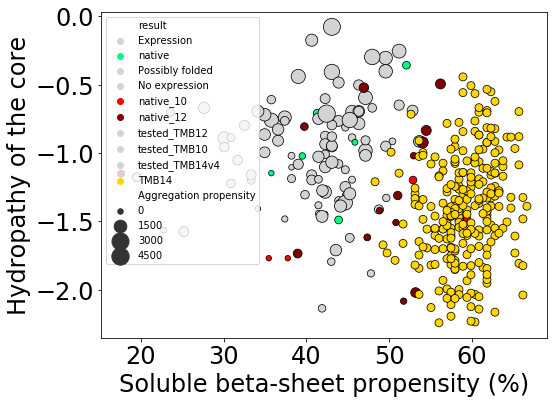

In [142]:
plt.figure(figsize=(8,6))
pl = sns.scatterplot(x=df_good_rounds.beta_sheet,y=df_good_rounds.hydropathy_core,hue=df_good_rounds['result'],palette=["lightgrey","springgreen","lightgrey",'lightgrey','red',"maroon",'lightgrey','lightgrey','lightgrey','gold'],edgecolor='black',alpha=1,s=50,size=df_good_rounds["Aggregation propensity"],sizes=(30, 300))

#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Soluble beta-sheet propensity (%)', size=24)
plt.ylabel('Hydropathy of the core', size=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

(array([0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2]),
 <a list of 9 Text yticklabel objects>)

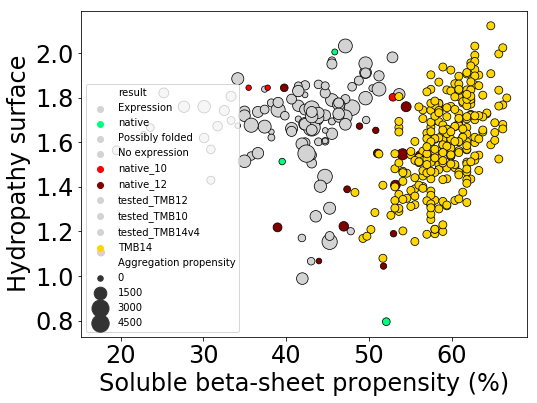

In [143]:
plt.figure(figsize=(8,6))
pl = sns.scatterplot(x=df_good_rounds.beta_sheet,y=df_good_rounds.hydropathy_surface,hue=df_good_rounds['result'],palette=["lightgrey",'springgreen','lightgrey','lightgrey','red',"maroon",'lightgrey','lightgrey','lightgrey','gold'],edgecolor='black',alpha=1,s=50,size=df_good_rounds["Aggregation propensity"],sizes=(30, 300))

#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Soluble beta-sheet propensity (%)', size=24)
plt.ylabel('Hydropathy surface', size=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

(array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5]),
 <a list of 8 Text yticklabel objects>)

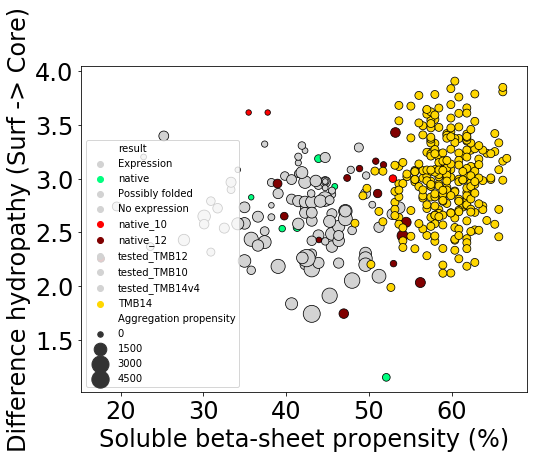

In [144]:
plt.figure(figsize=(8,6))
pl = sns.scatterplot(x=df_good_rounds.beta_sheet,y=df_good_rounds.ratio_hydropathy,hue=df_good_rounds['result'],palette=["lightgrey",'springgreen','lightgrey','lightgrey','red',"maroon",'lightgrey','lightgrey','lightgrey','gold'],edgecolor='black',alpha=1,s=50,size=df_good_rounds["Aggregation propensity"],sizes=(30, 300))

#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Soluble beta-sheet propensity (%)', size=24)
plt.ylabel('Difference hydropathy (Surf -> Core)', size=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

(array([-2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5]),
 <a list of 7 Text yticklabel objects>)

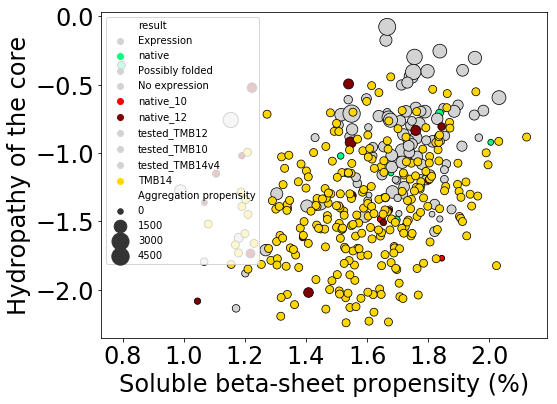

In [145]:
plt.figure(figsize=(8,6))
pl = sns.scatterplot(x=df_good_rounds.hydropathy_surface,y=df_good_rounds.hydropathy_core,hue=df_good_rounds['result'],palette=["lightgrey",'springgreen','lightgrey','lightgrey','red',"maroon",'lightgrey','lightgrey','lightgrey','gold'],edgecolor='black',alpha=1,s=50,size=df_good_rounds["Aggregation propensity"],sizes=(30, 300))

#sns.scatterplot(data=df["ss_profile"])
plt.xlabel('Soluble beta-sheet propensity (%)', size=24)
plt.ylabel('Hydropathy of the core', size=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

In [150]:
df_picked = df_des2.loc[df_des2["beta_sheet"] < 56]
df_picked.shape

(40, 14)

In [151]:
df_picked

sequence  \
84_input_0005_0002_12_0010_0008_0009_0008_0009   QRKKGSVVTGTGTAYNTDNTLWLKTYTLYVITPDLETKGGYEWNNSSKNRFESEVKYDISPYLETGVEVRYNTDNTLLVVFVVVSWYDVSPDFKPYGGFVYFWNNSSLNKFVFQGGFKYRLSPDLEVQFDVKYNTDNTFKVSVLFVYFVTPDLVFFVRYDWNNSSLNHFEFGSTYKASPELFFSAGTQYNTDNTIV...   
28_input_0098_0005_9_0007_0008_0005_0001_0010    KEKPGTLRAGSGVRYNTDNTIEVSVYTEYVVSPDLKLKVVYDWNNSSLNELKFGSKYEFSPYVEGGTGFTYNTDNTFFVKVVTLVWYELSPEIFPYGATEYEWNNSSLNSTTFRGGSKYDISPDLETQVETGYNTDNTFEVSVKVKYRLSPDLEVEFEYKWNNSSLNTFEVGFKYRVSPDFEVEVWVKYNTDNTVE...   
49_input_0010_0005_5_0006_0010_0010_0008_0003    QDKPGTLRTGTGFKYNTDNTLEGETYVLYVVSPDLVLVFGYRWNNSSKNTFVFVVFYKISPYIRAGTRVEYNTDNTFRVTVRVEVQYMITPDLFPYGGSQYDWNNSSLNKTVFFGGFKYRLSPDFEVRVETHYNTDNTVEVKVEFVYLLTPDLWLLVWYEWNNSSLNATFTGLKYDASPDIKTFFGSKYNTDNTIT...   
57_input_0005_0004_7_0007_0001_0009_0003_0004    RKSSGTLEVGGGSEYNTDNTFSLFSYVQYWITPDLVTEVFYWWNNSSLNKTKVGTWYWFSPYFRGGGGTEYNTDNTVKVEFKTEFRYDVSPELFPYTRVEYLWNNSSLNKTRFEFGFKYVITPDLEVDVAVGYNTDNTLEFVVTFKYVLSPDLEVWSTYKWNNSSLNEFEGGSVYLLSPDLWVKVEVKYNTDNTLK...   
27_input_0069_0002_8_0009_0006_0009_0001_0004    SDDQGSLRVGGGVKYNTDNTVVLVSYVVYVVTPDLKFVTWYEWNNSSLNWTEVGTKYDASPYASSGGGTRYNTDNTAKTSSWTTVWYFLSPDIFPYVTVKYEWNNSSLNKTEVEVGVVYRVTPDLWFRVAVGYNTDNTFTLKVEVRYRISPDAETWGRYWWNNSSLNKTEGGSTYRVSPDLWLFVVVRYNTDNTLE...   
84_input_0005_0004_16_0007_0002_0005_0007_0010   SKKQGSVKVGTGTEYNTDNTVRFKSYTLYEVSPDLKFKVGYEWNNSSKNRTRVEVWYDLSPYLKSGVVVEYNTDNTIRVVFFSHGRYDVSPDFFPYGGLVYFWNNSSLNKVVFQGGFKYRFTPDFEVRFDVKYNTDNTLKVQVDFVYFVTPDLVFVVTYVWNNSSLNKSWVGSTYWASPDLVFTAGVEYNTDNTIT...   
41_input_0049_0005_6_0009_0004_0003_0007_0010    QDKPGSLKGGSGVEYNTDNTVKVVGYSTYVLTPDLKLTGFYFWNNSSLNAGELGVWYRFSPYVRGGGGTRYNTDNTFQVVFWSEVWYELSPEVKPYGRLEYKWNNSSLNKVTFWSGTKYDISPDIEVVVEVGYNTDNTIVTRVEFRYRLSPDLVLKVVYVWNNSSLNKFVFGSKYRLSPDFEVEFEVEYNTDNTIR...   
98_input_0009_0001_14_0002_0007_0004_0009_0008   SKKPGTLETGTDFRYNTDNTLEVFFYGLYVLSPDLEVEFGYKWNNSSKNKFVFEVKYRVSPYVWVGTRFEYNTDNTFKVVVRTEFWYTLSPDLHPYGGGQYEWNNSSLNKFKGVGGFKYRLSPDLEVRFEVWYNTDNTIKVKVVFVYFISPDLVLFVEYEWNNSSLNELKVGSKYRLSPDLETEAGVKYNTDNTIF...   
64_input_0078_0005_14_0004_0010_0004_0001_0002   QDRPGSLRVGTGFKYNTDNTLEVETYTEYVITPDLKTKGSYKWNNSSLNWFKGGTKYKLSPYFEVGSGTVYNTDNTLKTKVVVVFQYELSPDLFPYTKVEYEWNNSSLNKTKVEVGFKYRLSPDLEVVVRTGYNTDNTFVTVVTTKYRLTPDLELESTYVWNNSSLNKFTAGTKYRITPDFETETRVTYNTDNTAS...   
84_input_0005_0002_12_0010_0008_0001_0004_0001   QRKKGSIVTGTGSTYNTDNTLELFTYTLYDVTPDLKLEGGYKWNNSSKNWFFSKTEYDISPYLKTGVEFLYNTDNTLEVVFKSVSWYEVSPDFFPYGGTTYHWNNSSLNKVVFQGGFKYRLSPDLEVDVDTKYNTDNTVKTEVTFVYFVTPDLVFKVTYRWNNSSLNQFESGSEYVFSPELKVRAGTKYNTDNTFK...   
84_input_0005_0002_12_0010_0008_0005_0004_0008   QRKKGSVVVGTGFLYNTDNTVWVTTYTLYDATPDLQFEAGYTWNNSSKNHFHSRTQYDISPYLQTGVDVQYNTDNTLRVVFRTVSWYDLSPDLKPYGGGEYHWNNSSLNKVVFQGGFKYRLSPDLEVQFDVKYNTDNTLKVSVVFVYFITPDFVLFVRYDWNNSSLNKGESGFTYWASPELVFSAGTEYNTDNTFL...   
101_input_0076_0003_14_0003_0004_0002_0007_0001  SDRPGTVQVGGGTEYNTDNTIKLVSYTRYKISPDLEVWTEYRWNNSSLNWFRVGFRYRLSPYVEVGVGFEYNTDNTFVVVFVTEFWYTLSPDLHPYTRFVYVWNNSSLNKTTLWVGFKYRLSPDLEVVVETGYNTDNTFEVRVVFVYWVSPDLVLFAEYRWNNSSLNKFRSGGKYRLSPDLETQTDVEYNTDNTIV...   
39_input_0084_0003_9_0008_0006_0010_0003_0006    SSRPGSLEFGGGVTYNTDNTVKVVFYSRYQLTPDLETEVWYEWNNSSLNKTVVGTWYKLSPYLEVGSGTEYNTDNTVVVKTVTVTWYTLSPELFPYTRTEYEWNNSSLNKTRTEVGLVYFISPDLLVVVSTGYNTDNTFKTRVEVKYRLSPDLELEVEYQWNNSSLNKLKVGFVYKLTPDLEVKTEVEYNTDNTVR...   
39_input_0027_0003_7_0002_0005_0007_0003_0004    QSKPGSLATGGGTQYNTDNTLKLHSYVLYWFSPDLEVVVGYTWNNSSKNKTEVEVKYRLSPYLEVGVKFLYNTDNTLRVVVVVTSWYTVTPDFHPYGGGLYFWNNSSLNTTVGQSGFKYRVSPDIETQVDFKYNTDNTFEVEFVVVYRLSPDLFLFVKYKWNNSSLNWLTVGTLYRLSPELWTWVGSTYNTDNTIV...   
78_input_0091_0003_4_0009_0001_0008_0003_0001    STRPGTLKTGVEVEYNTDNTIKVFVYSLYWFSPDIAVTVGYEWNNSSKNTFVVTFWYRLSPYLEVGVTVWYNTDNTVVVVVFFFFQYDLSPDFKPYGGSVYFWNNSSLNKVVGFGGFRYRLTPDLELQVEVWYNTDNTLTVVVTFEYFVTPDLVFKVTYKWNNSSLNELFVGTDYRLSPDLWTSVGSKYNTDNTFK...   
14_input_0005_0005_7_0004_0003_0006_0007_0009    SERPGTIKVGSGSKYNTDNTFVLVSYTEYVLSPDLKLKVRYEWNNSSLNRLQVGTEYLFSPYLKVGSGVDYNTDNTVVVRVTVKVDYDVSPEIRPYTVFHYEWNNSSLNKTKVDFGAKYVITPDLVTDTRTGYNTDNTVTVETKVVYFASPDLVFESKY

In [12]:
pd.options.display.max_colwidth = 200
columns = ['sequence','ss', 'identity','hydropathy','hydropathy_core','hydropathy_surface','ratio_hydropathy','F','aro','beta_sheet','coil','helix',"Aggregation propensity",'result']
native = {'A': 0.09892494045990434, 'C': 0.0007037625203442372, 'D': 0.027770177581332288, 'E': 0.029719275383167428, 'F': 0.07929574855980195, 'G': 0.1453262552782189, 'H': 0.011157715202304692, 'I': 0.05289172587768166, 'K': 0.02000481398009908, 'L': 0.11207876498844926, 'M': 0.01748405604149801, 'N': 0.02587373268683085, 'P': 0.026855803431653235, 'Q': 0.021940748555100798, 'R': 0.037856030027200865, 'S': 0.04138471504904712, 'T': 0.04080177214642398, 'V': 0.09253231337129984, 'W': 0.02589065683561668, 'Y': 0.09150699202402476}
native_core = {'A': 0.07307786630111489, 'C': 0.000560694380689476, 'D': 0.0529505100746824, 'E': 0.06357016644762904, 'F': 0.03465929694164796, 'G': 0.24388319111608575, 'H': 0.014590630220483895, 'I': 0.01795479650462075, 'K': 0.036906266571925035, 'L': 0.033595549658657645, 'M': 0.022868994543972065, 'N': 0.04843456224965258, 'P': 0.010193109432870735, 'Q': 0.04258971634104471, 'R': 0.07494859428154613, 'S': 0.07878122858095064, 'T': 0.06227166114356501, 'V': 0.027519089809615437, 'W': 0.0037320237189443434, 'Y': 0.056912051680301494}
native_surf = {'A': 0.11995082543027749, 'C': 0.000820144522764552, 'D': 0.0072866686445619815, 'E': 0.0021825051749243796, 'F': 0.11560627606644364, 'G': 0.06515289471799646, 'H': 0.00836513311576485, 'I': 0.08131195842327642, 'K': 0.006255946474060585, 'L': 0.17592270521516432, 'M': 0.013103556460385826, 'N': 0.007521117442649561, 'P': 0.040410447379459216, 'Q': 0.005143380359499524, 'R': 0.0076822477075170256, 'S': 0.010963678339659189, 'T': 0.02333660709109572, 'V': 0.14541878523126028, 'W': 0.0439160963166815, 'Y': 0.11964902588655747}
#aggregation_list = {'48_input_0076_0005_8_0002_0008_0003_0004_0010':2147.84,'82_input_0023_0005_8_0008_0001_0003_0004_0003':1781.06,"6_input_0023_0003_9_0001_0002_0003_0006_0004":2893.26,'6_input_0073_0001_9_0003_0006_0004_0006_0009':3430.78,"12_input_0082_0001_10_0002_0003_0005_0004_0005":1885.31,'13_input_0015_0003_7_0009_0001_0008_0008_0006':2833.82,'72_input_0005_0003_17_0009_0003_0003_0010_0006':1233.12,'75_input_0094_0002_9_0007_0010_0003_0007_0002':3059.95,'95_input_0051_0002_22_0009_0008_0008_0002_0006':185.35}

agg = pd.read_csv("tango_aggregation.txt", header=0, sep="\s+")
agg_index = pd.read_csv("tango_index.txt", header=None, names=["description", "Sequence"], sep="\s+")
daggregation = pd.merge(agg, agg_index, on="Sequence")
aggregation_list=daggregation[["Aggregation","description"]].set_index('description').to_dict()

df = pd.DataFrame(columns=columns)

for file in glob.glob("../picked/TMB*/*.ss3_simp"):
    name = (file.split('/')[-1]).split('.')[0]
    sequence = ""
    ss = ""
    dround = "TMB12_14"
    if name in aggregation_list["Aggregation"]: 
        aggregation=aggregation_list["Aggregation"][name]
    else:
        aggregation = 50.0
    result = 'TMB12_14'
        
    with open(file, 'r') as in_f:
        lines = in_f.readlines()
        for i in range(0, len(lines)):
            line_seq = lines[1].strip()
            line_ss = lines[2].strip()
#            line_ref = lines[3].strip()
#            line_mem = lines[4].strip()
    sequence = line_seq.strip()
    ss = line_ss.strip()
#    ref_ss = line_ref.strip()
#    mem = line_mem.strip()
    print(file, len(ss))
    
    identity = ss_pred(ss,dround,name)
    distr = aa_distribution(sequence,dround,name)
    distr_surf = aa_distribution_surface(sequence,dround,name)
    distr_core = aa_distribution_core(sequence,dround,name)
#    outcome = results[design_name]
    
    keys = set(native.keys()) | set(distr.keys())
    
    dstr_r = numpy.corrcoef([native.get(x, 0) for x in keys],[distr.get(x, 0) for x in keys])[0, 1]
    dstr_core_r = numpy.corrcoef([native_core.get(x, 0) for x in keys],[distr_core.get(x, 0) for x in keys])[0, 1]
    dstr_surf_r = numpy.corrcoef([native_surf.get(x, 0) for x in keys],[distr_surf.get(x, 0) for x in keys])[0, 1]
    
    hydro = GRAVY(sequence)
    hydro_core = GRAVY_core(sequence,dround,name)
    hydro_surf = GRAVY_surf(sequence,dround,name)
    hydro_diff = hydro_surf-hydro_core
    
    F_freq = sequence.count('F')/len(ss)*100
    aro_freq = sequence.count('F')/len(ss)*100 + sequence.count('Y')/len(ss)*100 + sequence.count('W')/len(ss)*100
    beta_sheet = float(ss.count('E'))/len(ss)*100
    coil = float(ss.count('C'))/len(ss)*100
    helix = float(ss.count('H'))/len(ss)*100
    df.loc[name] = [sequence,ss,identity,hydro,hydro_core,hydro_surf,hydro_diff,F_freq,aro_freq,beta_sheet,coil,helix,aggregation,result]
#df["beta_sheet"] = df["ss"].str.count('E')/123*100
print(df)

('60_input_0076_0004_13_0008_0001_0004_0006_0002/60_input_0076_0004_13_0008_0001_0004_0006_0002.ss3_simp', 179)
('33_input_0097_0004_12_0003_0003_0002_0004_0009/33_input_0097_0004_12_0003_0003_0002_0004_0009.ss3_simp', 179)
('5_input_0036_0003_10_0001_0007_0006_0007/5_input_0036_0003_10_0001_0007_0006_0007.ss3_simp', 179)
('18_input_0048_0002_7_0002_0004_0004_0007_0008/18_input_0048_0002_7_0002_0004_0004_0007_0008.ss3_simp', 179)
('93_input_0029_0005_19_0002_0007_0010_0006_0007/93_input_0029_0005_19_0002_0007_0010_0006_0007.ss3_simp', 179)
('89_input_0033_0002_5_0007_0002_0002_0009_0007/89_input_0033_0002_5_0007_0002_0002_0009_0007.ss3_simp', 179)
('32_input_0059_0005_7_0009_0010_0009_0008_0003/32_input_0059_0005_7_0009_0010_0009_0008_0003.ss3_simp', 179)
('64_input_0084_0002_11_0002_0006_0007_0010_0005/64_input_0084_0002_11_0002_0006_0007_0010_0005.ss3_simp', 179)
('9_input_0061_0001_11_0005_0005_0004_0008_0003/9_input_0061_0001_11_0005_0005_0004_0008_0003.ss3_simp', 179)
('97_input_0

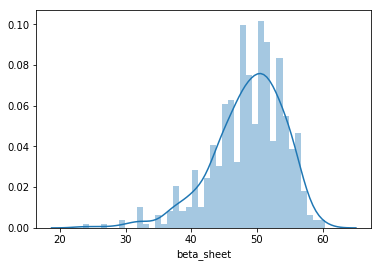

In [14]:
sns.distplot(df_oval["beta_sheet"], bins=40)

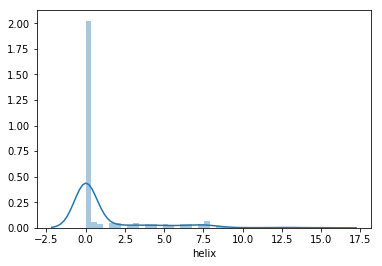

In [16]:
sns.distplot(df_oval["helix"], bins=40)

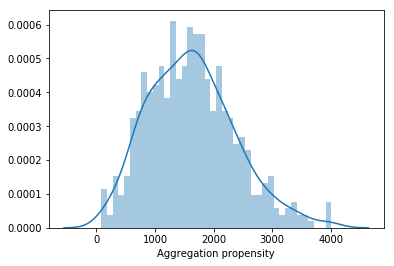

In [18]:
sns.distplot(df_oval["Aggregation propensity"], bins=40)

In [22]:
df_oval_all = df_oval.loc[(df_oval["beta_sheet"]<50.0)&(df_oval["Aggregation propensity"]<1400)&(df_oval["helix"]<2.5)&(df_oval["beta_sheet"]>35.0)]
df_oval_all.shape

(102, 14)

In [23]:
df_oval_all


sequence  \
18_input_0048_0002_7_0002_0004_0004_0007_0008   SDKPGSLGAYLKVVYNTDNTAETGPGLEYVASPHAKTWSEAGWNNSSLFKVRAWAEYKTPDGVEFRGGFEYNTDNTLTFFGQVTVWYSLTPDLHPYTTVRYQWNNSSLNKGNPGGGAQYNLSPDLAVRVETGYNTDNTASVQTDFEYKLSPHAEVVFGAQWNNSSLARTWTVLKYDLSM   
93_input_0029_0005_19_0002_0007_0010_0006_0007  ERRPGSAGGYLRVKYNTDNTAEAGPGGKYVLSPDLETQLDVGWNNSSLVKFSLSTTYWTPDGVQVQAGLDYNTDNTFVFKLSVVFWYTLTPHLHPYTRVDYSWNNSSLNASRPGGGTRYDVTPDFKVQVDTGYNTDNTLVVEFWAQYVLSPDASVRAGVRWNNSSLVEFEVEFWYKLSQ   
89_input_0033_0002_5_0007_0002_0002_0009_0007   QKRPGSFGTYFSAEYNTDNTFKGGPGFKYQLSPHAEVRVEFGWNNSSLAWVTVKTKYESPDGVEVVVGATYNTDNTVKFEVEVVFWYDLTPHLKPYGKTKYEWNNSSLNKTKPGGGTKYQVDPHVEFRTESGYNTDNTAETQVETLYKFTPELAVKTGTKWNNSSLAQTRTEFWYKVSE   
32_input_0059_0005_7_0009_0010_0009_0008_0003   SKKPGTAGTYFRVTYNTDNTAEAGPGGEYTLTPDLDARVEAGWNNSSLFKLLVEFEYKTPDGVEFKVGVLYNTDNTAVLFVEVVFWYTVSPDFHPYGKVEYQWNNSSLNKSAPGGGAKYRLSPDFEVRVEGGYNTDNTFKTTVEFLYKLSPHAAVKVGATWNNSSLAKLDVEVFYKLSE   
64_input_0084_0002_11_0002_0006_0007_0010_0005  QDSQGDAGGYFRVEYNTDNTFWAGPGGKYALSPHLFLDVAAGWNNSSLLKFDFHVKYFSPDGLEVQVGFTYNTDNTLVFFVVVVFWYDLSPHVKPYGRLEYRWNNSSLNKFFPGGGARYKLSPDLEVQADSGYNTDNTASTRFETVYKVSPEAEFKAGGQWNNSSLFKFQSQFDYKASS   
97_input_0044_0003_12_0001_0010_0006_0010_0009  QPRKGSAGGYTRFVYNTDNTFEAGPGGFYTLSPDLDVFVEVGWNNSSLAKTRVELKYDTPDGVEFKFGSEYNTDNTLKLKFVVVFWYQLTPELKPYGKTEYEWNNSSLNKAKPGGGAQYDASPDLRVWTEVGYNTDNTVEVFVLVEYRLSPHLFVRFGAKWNNSSLFEVFVEFWYDASL   
52_input_0094_0001_8_0001_0010_0003_0005_0009   QSAPGSAGGYFRARYNTDNTFDAGPGGVYWASPHLQFESWSGWNNSSLAKAETKTKYRSPDGVEVEVGVEYNTDNTVKLKVVVVFWYFLSPHLKPYGKLEYEWNNSSLNKTKPGGGAQYDASPELAFFVDVGYNTDNTFEVKVEVKYKLSPDFEVKVGAKWNNSSLAWLETEFWYMLSM   
52_input_0043_0003_14_0008_0007_0005_0007       ESRQGSLGTYLRVVYNTDNTLEVGPGLKYEASPHLEFQLDVGWNNSSLLKVRAETFYKSPDGLEVVVGGVYNTDNTASGKTVFVVHYTLSPHVHPYGKVEYEWNNSSLNKAKPGGGAFYDASPHLQFQVETGYNTDNTFEVVVLTTYQFSPELQVTSGFKWNNSSLVVFETVFEYKVSP   
60_input_0076_0004_10_0008_0008_0008_0009_0001  QDKPGTAGGYFRAKYNTDNTVEAGPGGVYVLTPDLKLFVEVGWNNSSLVKLKVFADYKSPDGVDVRVGSEYNTDNTVETQVEVLVWYSVSPEANPYTKVEYRWNNSSLNKFKPGGGTEYTFSPDLKAWVETGYNTDNTLETTVVVKYRLSPDLEVQTGTTWNNSSLVEFVTEVWYKASD   
64_input_0084_0002_11_0004_0010_0006_0004_0005  QSSQGDAGGYLRVEYNTDNTLKVGPGGRYALSPHLWLDVAGGWNNSSLLWGQTVVRYETPDGVEFKVGAQYNTDNTFQVDVEVVFWYDASPELKPYTRFEYKWNNSSLNKFEPGGGFEYLLSPDLRVRFDAGYNTDNTAFSKVETEYRLSPDAKVKGGVQWNNSSLVKFDAQVDYRASS   
66_input_0065_0003_11_0002_0006_0005_0005_0003  QDKPGTAGGYFQAVYNTDNTFSAGPGGRYMLTPHLWTDVKSGWNNSSLAAVEVWFKYDTPDGLTLFGGTQYNTDNTVKAWAEVVFWYDLSPHLRPYGKVKYQWNNSSLNKFRPGGGTEYVLSPDLKVWVEAGYNTDNTLEVRVQFKYWASPHLEFEGGVVWNNSSLVWFESAVEYKLSL   
75_input_0022_0004_8_0007_0005_0010_0001_0005   QSKPGTFGVYVRFKYNTDNTAEAGPGTRYVATPHLEFEVDSGWNNSSLLRVQVWTKYWSPDGLELEGGTEYNTDNTVKTKTATRFWYVATPDLRPYGKVEYEWNNSSLNRSAPGGGAEYDLSPHLSVKVETGYNTDNTAKTRVQVDYDATPDFKVSTGFEWNNSSLFSGFARFEYVLTW   
100_input_0084_0003_13_0007_0008_0007_0007      EDKSGSLGTYLKVQYNTDNTVKAEPGSEYVLSPHLETRVAVGWNNSSLASLKVSTKYKSPDGLELEVGAEYNTDNTFAVVVTLRVQYQASPHVFPYGRTTYKWNNSSLNRSEPGGGTKYRASPDLEVDVEVGYNTDNTLKFVFKVTYVFSPDLAVTAGAEWNNSSLATGETEVRYKLSE   
97_input_0007_0002_10_0002_0007_0001_0008_0006  SSQPGDAGGYFTAEYNTDNTFKGGPGGRYALTPDLELDVSVGWNNSSLVEFRVEVKYDTPDGAEFKTGFSYNTDNTFQVEFEVVFWYLLSPHAFPYGKTKYVWNNSSLNKTSPGGGFAYKLSPHAELKVEGGYNTDNTFRAKVAVDYQATPHLHFRLGAEWNNSSLVKAQFTVFYKLSG   
37_input_0045_0002_11_0010_0010_0002_0002_0010  SKKPGTAGGYLRFKYNTDNTAWAGPGGAYVATPDLRTEVWAGWNNSSLLKFKVETEYKSPDGVDFRVGAEYNTDNTAKVVVVVVFWYTLSPDLHPYTKVKYEWNNSSLNKAEPGGGAAYRLSPHAELKVESGYNTDNTASTRFQVDYQLSPHAELKGGAQWNNSSLVKFDSETWYDLSD   
75_input_0022_0004_8_0007_0005_0006_0005_0002   QSKPGTFGVYFRAKYNTDNTFQAGPGARYVLTPDLETQLDVGWNNSSLVKFWLQTDYWSPDGVEFKGGTLYNTDNTVKVKTATVFWYTATPDLNPYGKFEYEWNNSSLNKASPGGGARYVLSPHLSVQVEVGYNTDNTFKLKVQVDYQLTPDLFLSTGFEWNNSSLASTFAVLEYVFTW   
96_input_0084_0003_24_0001_0001_0006_0005_0001  QPKPGTAGGYLRVDYNTDNTLEVGPGGQYMLTPDLWLEVDTGWNNSSLVKFFVATLYRSPDGVEFKVGAVYNTDNTFVLVVEVWSWYTASPDLHPYGRTRYEWNNSSLNKAEPGGGARYRVSPEVEVQVDVGYNTDNTLKVTVMTQYNLSPHAALKAGATWNNSSLVDGRSQLDYVASE   
52_input_0043_0003_10_0006_0008_0008_0004_0010  EKRPGSFGLYFRA

In [24]:
with open("picked_alphafold.fasta","w") as out_f:
    for index, row in df_oval_all.iterrows():
        out_f.write(">%s\n%s\n"%(index, row['sequence']))

In [13]:
pd.options.display.max_colwidth = 200
columns = ['sequence','ss', 'identity','hydropathy','hydropathy_core','hydropathy_surface','ratio_hydropathy','F','aro','beta_sheet','coil','helix',"Aggregation propensity",'result']
native = {'A': 0.09892494045990434, 'C': 0.0007037625203442372, 'D': 0.027770177581332288, 'E': 0.029719275383167428, 'F': 0.07929574855980195, 'G': 0.1453262552782189, 'H': 0.011157715202304692, 'I': 0.05289172587768166, 'K': 0.02000481398009908, 'L': 0.11207876498844926, 'M': 0.01748405604149801, 'N': 0.02587373268683085, 'P': 0.026855803431653235, 'Q': 0.021940748555100798, 'R': 0.037856030027200865, 'S': 0.04138471504904712, 'T': 0.04080177214642398, 'V': 0.09253231337129984, 'W': 0.02589065683561668, 'Y': 0.09150699202402476}
native_core = {'A': 0.07307786630111489, 'C': 0.000560694380689476, 'D': 0.0529505100746824, 'E': 0.06357016644762904, 'F': 0.03465929694164796, 'G': 0.24388319111608575, 'H': 0.014590630220483895, 'I': 0.01795479650462075, 'K': 0.036906266571925035, 'L': 0.033595549658657645, 'M': 0.022868994543972065, 'N': 0.04843456224965258, 'P': 0.010193109432870735, 'Q': 0.04258971634104471, 'R': 0.07494859428154613, 'S': 0.07878122858095064, 'T': 0.06227166114356501, 'V': 0.027519089809615437, 'W': 0.0037320237189443434, 'Y': 0.056912051680301494}
native_surf = {'A': 0.11995082543027749, 'C': 0.000820144522764552, 'D': 0.0072866686445619815, 'E': 0.0021825051749243796, 'F': 0.11560627606644364, 'G': 0.06515289471799646, 'H': 0.00836513311576485, 'I': 0.08131195842327642, 'K': 0.006255946474060585, 'L': 0.17592270521516432, 'M': 0.013103556460385826, 'N': 0.007521117442649561, 'P': 0.040410447379459216, 'Q': 0.005143380359499524, 'R': 0.0076822477075170256, 'S': 0.010963678339659189, 'T': 0.02333660709109572, 'V': 0.14541878523126028, 'W': 0.0439160963166815, 'Y': 0.11964902588655747}
#aggregation_list = {'48_input_0076_0005_8_0002_0008_0003_0004_0010':2147.84,'82_input_0023_0005_8_0008_0001_0003_0004_0003':1781.06,"6_input_0023_0003_9_0001_0002_0003_0006_0004":2893.26,'6_input_0073_0001_9_0003_0006_0004_0006_0009':3430.78,"12_input_0082_0001_10_0002_0003_0005_0004_0005":1885.31,'13_input_0015_0003_7_0009_0001_0008_0008_0006':2833.82,'72_input_0005_0003_17_0009_0003_0003_0010_0006':1233.12,'75_input_0094_0002_9_0007_0010_0003_0007_0002':3059.95,'95_input_0051_0002_22_0009_0008_0008_0002_0006':185.35}

agg = pd.read_csv("../../picked/tango_aggregation.txt", header=0, sep="\s+")
#agg_index = pd.read_csv("tango_index.txt", header=None, names=["description", "Sequence"], sep="\s+")
#daggregation = pd.merge(agg, agg_index, on="Sequence")
aggregation_list=agg[["Sequence","Aggregation","Conc_Stab_Aggregation"]].set_index('Sequence').to_dict()

df = pd.DataFrame(columns=columns)

for file in glob.glob("../../picked/TMB*/*.ss3_simp"):
    name = (file.split('/')[-1]).split('.')[0]
    sequence = ""
    ss = ""
    dround = "TMB12_14"
    if name in aggregation_list["Aggregation"].keys(): 
        aggregation=aggregation_list["Aggregation"][name]
    else:
        aggregation = 50.0
    result = name[0:-2]
        
    with open(file, 'r') as in_f:
        lines = in_f.readlines()
        for i in range(0, len(lines)):
            line_seq = lines[1].strip()
            line_ss = lines[2].strip()
#            line_ref = lines[3].strip()
#            line_mem = lines[4].strip()
    sequence = line_seq.strip()
    ss = line_ss.strip()
#    ref_ss = line_ref.strip()
#    mem = line_mem.strip()
    print(file, len(ss))
    
    identity = ss_pred(ss,dround,name)
    distr = aa_distribution(sequence,dround,name)
    distr_surf = aa_distribution_surface(sequence,dround,name)
    distr_core = aa_distribution_core(sequence,dround,name)
#    outcome = results[design_name]
    
    keys = set(native.keys()) | set(distr.keys())
    
    dstr_r = numpy.corrcoef([native.get(x, 0) for x in keys],[distr.get(x, 0) for x in keys])[0, 1]
    dstr_core_r = numpy.corrcoef([native_core.get(x, 0) for x in keys],[distr_core.get(x, 0) for x in keys])[0, 1]
    dstr_surf_r = numpy.corrcoef([native_surf.get(x, 0) for x in keys],[distr_surf.get(x, 0) for x in keys])[0, 1]
    
    hydro = GRAVY(sequence)
    hydro_core = GRAVY_core(sequence,dround,name)
    hydro_surf = GRAVY_surf(sequence,dround,name)
    hydro_diff = hydro_surf-hydro_core
    
    F_freq = sequence.count('F')/len(ss)*100
    aro_freq = sequence.count('F')/len(ss)*100 + sequence.count('Y')/len(ss)*100 + sequence.count('W')/len(ss)*100
    beta_sheet = float(ss.count('E'))/len(ss)*100
    coil = float(ss.count('C'))/len(ss)*100
    helix = float(ss.count('H'))/len(ss)*100
    df.loc[name] = [sequence,ss,identity,hydro,hydro_core,hydro_surf,hydro_diff,F_freq,aro_freq,beta_sheet,coil,helix,aggregation,result]
#df["beta_sheet"] = df["ss"].str.count('E')/123*100
print(df)

('../../picked/TMB12_14_oval6/TMB12_14_oval6.ss3_simp', 179)
('../../picked/TMB12_14_rect7/TMB12_14_rect7.ss3_simp', 179)
('../../picked/TMB12_14_rect5/TMB12_14_rect5.ss3_simp', 179)
('../../picked/TMB12_14_oval2/TMB12_14_oval2.ss3_simp', 179)
('../../picked/TMB12_14_rect6/TMB12_14_rect6.ss3_simp', 179)
('../../picked/TMB12_14_oval4/TMB12_14_oval4.ss3_simp', 179)
('../../picked/TMB12sol09_8/TMB12sol09_8.ss3_simp', 179)
('../../picked/TMB12sol09_9/TMB12sol09_9.ss3_simp', 179)
('../../picked/TMB12_14_rect1/TMB12_14_rect1.ss3_simp', 179)
('../../picked/TMB12_14_oval7/TMB12_14_oval7.ss3_simp', 179)
('../../picked/TMB12_14_oval1/TMB12_14_oval1.ss3_simp', 179)
('../../picked/TMB12_14_oval5/TMB12_14_oval5.ss3_simp', 179)
('../../picked/TMB12sol09_4/TMB12sol09_4.ss3_simp', 179)
('../../picked/TMB12_14_oval3/TMB12_14_oval3.ss3_simp', 179)
('../../picked/TMB12sol09_6/TMB12sol09_6.ss3_simp', 179)
('../../picked/TMB12_14_rect2/TMB12_14_rect2.ss3_simp', 179)
('../../picked/TMB12sol09_3/TMB12sol09_3

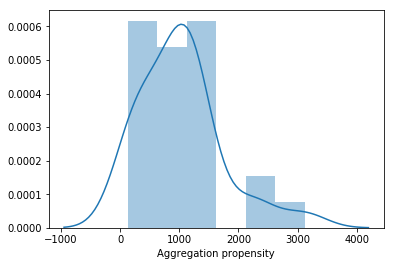

In [14]:
sns.distplot(df["Aggregation propensity"])

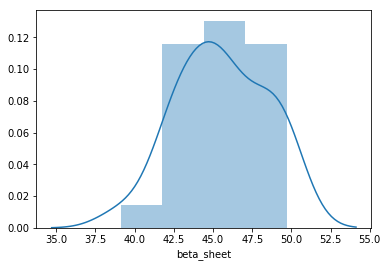

In [15]:
sns.distplot(df["beta_sheet"])

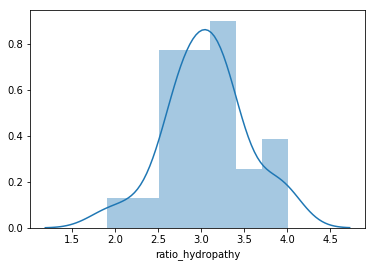

In [16]:
sns.distplot(df["ratio_hydropathy"])

In [17]:
df.groupby("result")["ratio_hydropathy"].mean()

result
TMB12_14_ova    3.229607
TMB12_14_rec    3.275546
TMB12sol09      2.738133
Name: ratio_hydropathy, dtype: float64

In [18]:
df.groupby("result")["ratio_hydropathy"].std()

result
TMB12_14_ova    0.124388
TMB12_14_rec    0.537580
TMB12sol09      0.399701
Name: ratio_hydropathy, dtype: float64

In [34]:
df.groupby("result")["beta_sheet"].mean()

result
TMB12_14_ova    46.288907
TMB12_14_rec    46.927374
TMB12sol09      43.743017
Name: beta_sheet, dtype: float64

In [19]:
df.groupby("result")["beta_sheet"].std()

result
TMB12_14_ova    3.495210
TMB12_14_rec    2.793296
TMB12sol09      1.369697
Name: beta_sheet, dtype: float64

In [35]:
df.groupby("result")["Aggregation propensity"].mean()

result
TMB12_14_ova    1026.345714
TMB12_14_rec     599.547778
TMB12sol09      1403.562000
Name: Aggregation propensity, dtype: float64

In [20]:
df.groupby("result")["Aggregation propensity"].std()

result
TMB12_14_ova    181.664475
TMB12_14_rec    443.564918
TMB12sol09      908.035220
Name: Aggregation propensity, dtype: float64

In [36]:
df.groupby("result")["hydropathy_core"].mean()

result
TMB12_14_ova   -1.785714
TMB12_14_rec   -1.623372
TMB12sol09     -1.424655
Name: hydropathy_core, dtype: float64

In [21]:
df.groupby("result")["hydropathy_core"].std()

result
TMB12_14_ova    0.152888
TMB12_14_rec    0.430501
TMB12sol09      0.439358
Name: hydropathy_core, dtype: float64

In [37]:
df.groupby("result")["hydropathy_surface"].mean()

result
TMB12_14_ova    1.443892
TMB12_14_rec    1.652174
TMB12sol09      1.313478
Name: hydropathy_surface, dtype: float64

In [22]:
df.groupby("result")["hydropathy_surface"].std()

result
TMB12_14_ova    0.123995
TMB12_14_rec    0.168465
TMB12sol09      0.178280
Name: hydropathy_surface, dtype: float64

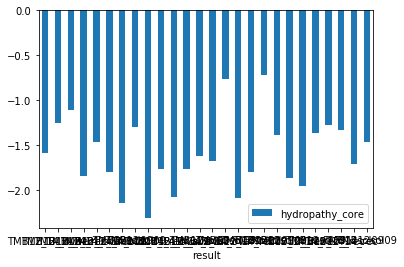

In [38]:
df.plot.bar(x='result', y='hydropathy_core', rot=0)